In [3]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
#from torchvision.datasets import MNIST

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
#import os
#os.chdir("/content/drive/My Drive") 
import ra
#import complexLayers


In [3]:
!python -m pip install -U pip

  Found existing installation: pip 19.2.2
    Uninstalling pip-19.2.2:
      Successfully uninstalled pip-19.2.2


In [8]:
!pip install torch===1.6.0  -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491061 sha256=8e91303f12e7b4909c1a9ee0bf510ce20208ad2b5f1bff6116fb7f38c6ba9b7d
  Stored in directory: c:\users\mx2n19\appdata\local\pip\cache\wheels\6e\9c\ed\4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
Successfully built future
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0
    Uninstalling torch-1.2.0:
      Successfully uninstalled torch-1.2.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\apps\\anaconda3\\envs\\gpu-cuda10\\lib\\site-packages\\~orch\\lib\\c10.dll'
Consider using the `--user` option or check the permissions.



In [1]:
!pip install torch===1.6.0

In [4]:
print(torch.__version__)

1.6.0


In [16]:
!pip install torchaudio -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [21]:
import torchaudio

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\torchaudio\backend\utils.py:66: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [7]:
!python -m pip install -U matplotlib

  Attempting uninstall: pillow
    Found existing installation: Pillow 6.1.0
    Uninstalling Pillow-6.1.0:
      Successfully uninstalled Pillow-6.1.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\apps\\anaconda3\\envs\\gpu-cuda10\\lib\\site-packages\\~il\\_imaging.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  

Dataset initialization

Train data

In [12]:
dataset = ra.read('atomsroa.ra')
train_data = torch.tensor(dataset)

In [13]:
import torch.utils.data as data
train_data = train_data.imag
train_label = torch.tensor(ra.read('paramsroa.ra'))
train_label1 = train_label[0,:]
train_data =  torch.transpose(train_data, 0, 1)
train_dataset = data.TensorDataset(train_data,train_label1)

In [14]:
train_data.shape

torch.Size([108056, 1000])

In [15]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(train_data)

In [16]:
X_embedded.shape

(108056, 2)

<function matplotlib.pyplot.show(*args, **kw)>

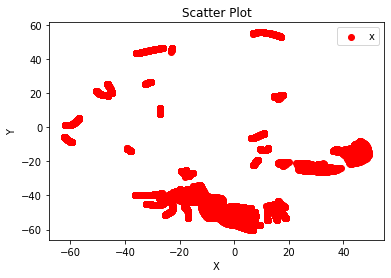

In [17]:
x = X_embedded[:10000,0]
y = X_embedded[:10000,1]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('Scatter Plot')

plt.xlabel('X')

plt.ylabel('Y')

ax1.scatter(x,y,c = 'r',marker = 'o')

plt.legend('x1')
plt.show


In [ ]:
try: 
    import torchbearer
except:
    !pip install torchbearer

     |████████████████████████████████| 143kB 3.5MB/s 


In [10]:
from torchbearer import Trial

In [20]:
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [70000, 30000 ,8056])

In [23]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"
N = 100
val_loss = list()
val_accu = list()
train_loss = list()
train_accu = list()
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)



def loss_batch(model, loss_func, xb, yb, opt=None):
    outputs = model(xb.float())
    yb = yb.float()
    outputs = torch.squeeze(outputs, 1)
    loss = loss_func(outputs, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)
# build the model
model = BaselineModel()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(N):
    model.train()
    running_loss = 0.0
    loss=0
    for data in trainloader:
        # get the inputs
        inputs, labels = data
        
        loss, nums = loss_batch(model, loss_function, inputs.float(), labels.float(), optimiser)
        running_loss += loss
    train_loss.append(loss)

    model.eval()
    with torch.no_grad():
        losses, nums = zip(
                *[loss_batch(model, loss_function, xb, yb) for xb, yb in validloader]
            )
        val_loss1 = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_loss.append(val_loss1)


        #print(epoch, val_loss)

        
        # keep track of the loss this epoch
        #running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

Epoch 0, loss 1321526.56
Epoch 1, loss 1280306.20
Epoch 2, loss 1239564.13
Epoch 3, loss 1198829.83
Epoch 4, loss 1158160.98
Epoch 5, loss 1117281.59
Epoch 6, loss 1076575.15
Epoch 7, loss 1036033.11
Epoch 8, loss 995521.96
Epoch 9, loss 955076.26
Epoch 10, loss 914722.86
Epoch 11, loss 874420.74
Epoch 12, loss 834247.15
Epoch 13, loss 793857.72
Epoch 14, loss 753737.98
Epoch 15, loss 713680.26
Epoch 16, loss 673569.63
Epoch 17, loss 633692.79
Epoch 18, loss 593841.24
Epoch 19, loss 554313.00
Epoch 20, loss 515087.58
Epoch 21, loss 475602.65
Epoch 22, loss 437198.34
Epoch 23, loss 398294.02
Epoch 24, loss 360207.36
Epoch 25, loss 322241.28
Epoch 26, loss 284527.98
Epoch 27, loss 248516.19
Epoch 28, loss 211916.25
Epoch 29, loss 178177.47
Epoch 30, loss 145506.86
Epoch 31, loss 116493.61
Epoch 32, loss 90285.50
Epoch 33, loss 68686.11
Epoch 34, loss 51693.25
Epoch 35, loss 41921.65
Epoch 36, loss 40509.49
Epoch 37, loss 39077.19
Epoch 38, loss 39003.56
Epoch 39, loss 37091.18
Epoch 40, 

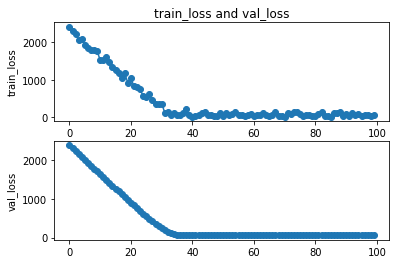

In [29]:
import matplotlib.pyplot as plt

x = range(0, N)
y1 = train_loss
#y2 = train_accu
y3 = val_loss
#y4 = val_accu
plt.subplot(2, 1, 1)
plt.plot(x, y1, 'o-')
plt.title('train_loss and val_loss')
plt.ylabel('train_loss')
#plt.subplot(2, 1, 2)
#plt.plot(x, y2, '.-')
#plt.xlabel('epoches')
#plt.ylabel('train_accu')
plt.subplot(2, 1, 2)
plt.plot(x, y3, 'o-')
plt.ylabel('val_loss')
#plt.subplot(2, 2, 2)
#plt.plot(x, y4, '.-')
#plt.title('val_loss and val_accu')
#lt.ylabel('val_accu')
plt.show()
#plt.savefig("accuracy_loss.jpg")

In [28]:
model.eval()

for data in testloader:
    inputs, lablels = data
    predictions = model(inputs.float())
    

    #print("predicted parameter:", predictions)
    #print("setting parameter:", labels)

predicted parameter: tensor([[3331.6453],
        [2346.0999],
        [3329.3650],
        [2461.2043],
        [1037.9559],
        [2960.6729],
        [3764.2693],
        [2621.1140],
        [2084.8540],
        [2900.4705],
        [3181.0574],
        [3277.7065],
        [3455.3228],
        [3934.8906],
        [2399.5007],
        [2973.4941],
        [2391.5972],
        [3815.3315],
        [2675.9634],
        [1467.8970],
        [3109.3447],
        [3839.2705],
        [3265.3118],
        [2868.3213],
        [2137.4434],
        [3575.5823],
        [3107.8320],
        [3097.3789],
        [1625.6323],
        [3431.2300],
        [1809.2899],
        [2433.2393],
        [4003.0034],
        [2901.6550],
        [3822.1355],
        [ 510.4880],
        [1850.9232],
        [2788.8752],
        [3543.1860],
        [2328.1924],
        [ 799.3888],
        [1203.3137],
        [1387.7384],
        [3525.9700],
        [3150.1890],
        [3535.6934],
        [3279

        [2623.7925]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[20

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[3909.4878],
        [2338.1821],
        [1239.9191],
        [1599.0149],
        [1880.6874],
        [2129.0891],
        [2273.7183],
        [3765.2300],
        [3410.9983],
        [2558.9961],
        [3346.0212],
        [2120.2798],
        [3049.9751],
        [2293.5044],
        [ 943.9522],
        [ 554.7449],
        [3452.9434],
        [3930.3313],
        [2255.0552],
        [2182.2354],
        [1105.6670],
        [1592.2255],
        [2591.3577],
        [2776.7124],
        [2494.0173],
        [2014.3849],
        [3400.3792],
        [3695.5955],
        [2150.4856],
        [2098.4463],
        [3886.7119],
        [3038.4102],
        [1755.5935],
        [1727.3287],
        [2628.9780],
        [ 945.8733],
        [2332.4497],
        [2474.7354],
        [2100.3623],
        [2641.8660],
        [3198.4541],
        [3336.3467],
        [2900.0688],
        [2046.1399],
        [25

        [3886.2576]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[22

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[2232.9585],
        [1793.6812],
        [3696.8198],
        [2702.9570],
        [3917.2866],
        [1723.8494],
        [1406.6279],
        [1471.5475],
        [2192.8347],
        [3768.3560],
        [2408.6956],
        [1986.3156],
        [1854.5017],
        [ 962.7058],
        [3885.9243],
        [2244.0498],
        [1875.3652],
        [2256.9229],
        [3603.7983],
        [3715.1462],
        [3055.7900],
        [ 836.4492],
        [3965.1768],
        [3457.1230],
        [2762.4087],
        [1844.2297],
        [2062.2986],
        [3317.9414],
        [1905.3359],
        [3547.0542],
        [1013.6893],
        [ 637.6705],
        [ 431.3187],
        [ 979.3217],
        [3812.0413],
        [3734.4841],
        [3353.3154],
        [2097.9863],
        [2322.0227],
        [3458.0647],
        [2165.3882],
        [3448.2939],
        [1335.9696],
        [3312.8154],
        [28

        [2534.7041]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[26

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[3430.8306],
        [1962.6597],
        [1969.4094],
        [3355.1821],
        [ 950.5080],
        [2404.5901],
        [2314.6519],
        [2452.9463],
        [3408.0955],
        [3880.4155],
        [1913.8455],
        [1696.4696],
        [3240.1589],
        [2115.4736],
        [3508.7542],
        [3188.3777],
        [2924.9070],
        [1212.8373],
        [2443.7915],
        [2843.1987],
        [1923.4443],
        [1664.5178],
        [3499.8232],
        [3383.9941],
        [2577.9885],
        [ 413.2450],
        [3250.4741],
        [3293.6987],
        [2356.1377],
        [1721.3397],
        [2009.5353],
        [ 648.5272],
        [3899.5083],
        [ 564.0848],
        [2984.7803],
        [2924.3447],
        [1082.4297],
        [1405.6865],
        [2162.5137],
        [2220.9834],
        [1204.4966],
        [3093.2559],
        [2218.8970],
        [3733.4360],
        [18

        [3372.9453]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[20

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[2057.0894],
        [2602.8032],
        [3511.5271],
        [3628.7366],
        [3568.9048],
        [3215.0513],
        [3458.8909],
        [2672.2163],
        [2205.9263],
        [3327.8789],
        [2935.8181],
        [2497.5605],
        [3244.8208],
        [ 963.1489],
        [1820.7500],
        [2540.6406],
        [3438.6353],
        [2988.5562],
        [ 719.8717],
        [2175.5439],
        [1990.7657],
        [2601.1887],
        [ 871.4572],
        [ 353.3549],
        [2243.0247],
        [2992.6384],
        [2561.6196],
        [1985.9045],
        [3331.9600],
        [2900.8213],
        [2097.5220],
        [1203.3394],
        [1541.0385],
        [3837.4368],
        [3589.8999],
        [3628.7805],
        [ 816.1982],
        [3233.6704],
        [1175.6017],
        [3685.3071],
        [3802.2017],
        [3869.7676],
        [ 813.6015],
        [1676.4709],
        [39

        [ 983.3735]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[34

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[3099.9263],
        [2115.9951],
        [2955.1602],
        [2910.2559],
        [2975.6069],
        [ 918.7925],
        [1467.7874],
        [2180.9519],
        [3015.5376],
        [3351.4419],
        [1422.5354],
        [3825.0483],
        [1913.7736],
        [2347.7554],
        [1605.6089],
        [3644.4541],
        [3896.2861],
        [2994.0771],
        [1850.6910],
        [3380.5532],
        [3005.6787],
        [2329.8547],
        [3667.3057],
        [1999.2148],
        [1759.4136],
        [2538.0283],
        [1400.9656],
        [3183.8992],
        [1836.1093],
        [3566.0776],
        [1428.1562],
        [2368.2861],
        [2454.8625],
        [ 281.5391],
        [3876.0996],
        [2605.6934],
        [3843.2605],
        [1690.7300],
        [1846.8347],
        [2758.0471],
        [ 389.5846],
        [3768.2993],
        [3372.4307],
        [3754.3279],
        [26

        [2845.9731]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[13

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[2510.1431],
        [2004.0352],
        [2065.5757],
        [2545.9297],
        [3000.5020],
        [1732.3555],
        [2090.6816],
        [2593.3899],
        [2724.1504],
        [1837.1929],
        [2331.2456],
        [1992.9897],
        [2705.0891],
        [2856.0894],
        [2127.5813],
        [ 859.5396],
        [2390.6335],
        [ 976.7595],
        [3706.2559],
        [3798.0193],
        [2917.8657],
        [1105.0544],
        [2694.4653],
        [ 684.4055],
        [1338.6929],
        [2466.2314],
        [ 607.6248],
        [3621.3621],
        [3116.4229],
        [2582.4844],
        [1908.8796],
        [3600.9368],
        [ 963.9796],
        [3724.0049],
        [2594.4229],
        [1763.4661],
        [2714.3164],
        [3322.6321],
        [ 719.2062],
        [1589.1395],
        [2640.3379],
        [1147.3542],
        [2875.8396],
        [3751.2427],
        [27

        [2557.7085]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[11

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[2173.3630],
        [1617.9210],
        [3059.7666],
        [1185.3008],
        [1644.9631],
        [2390.1890],
        [2164.4077],
        [2967.5264],
        [2017.6279],
        [1730.2457],
        [3683.9214],
        [ 811.9742],
        [ 495.2675],
        [2200.5918],
        [3700.4727],
        [ 433.5321],
        [2659.8354],
        [1684.9775],
        [3901.6812],
        [3583.4082],
        [2276.7021],
        [3551.8462],
        [1472.4749],
        [1305.7045],
        [3499.2144],
        [3872.9966],
        [2922.2964],
        [1277.3425],
        [2056.8274],
        [2343.1333],
        [1768.7998],
        [1911.0846],
        [3048.6230],
        [1283.7699],
        [3786.6919],
        [2399.7378],
        [3607.2305],
        [1988.4863],
        [3445.5391],
        [3932.8872],
        [2210.4771],
        [2782.5283],
        [3897.6609],
        [3667.9565],
        [ 4

        [2796.9014]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[26

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[1508.2324],
        [2273.3223],
        [1981.2996],
        [3397.2542],
        [3086.8149],
        [3281.5806],
        [3690.9871],
        [3362.8838],
        [2903.3481],
        [3829.5806],
        [3566.7578],
        [3624.8169],
        [1049.8848],
        [1453.2343],
        [3230.4927],
        [2838.9412],
        [2567.8350],
        [3870.8945],
        [3313.1890],
        [3801.6824],
        [ 937.8671],
        [2983.7939],
        [1989.9635],
        [ 387.4478],
        [3517.3723],
        [2716.7798],
        [1628.2667],
        [2613.7183],
        [1968.9685],
        [2335.4905],
        [2903.8145],
        [2925.5635],
        [3653.9902],
        [1358.9761],
        [3680.9519],
        [2942.8584],
        [ 908.4120],
        [2427.7993],
        [1242.2795],
        [3829.6541],
        [3837.1860],
        [3777.3555],
        [3188.7070],
        [2257.2910],
        [35

        [1449.1079]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[35

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[3470.2522],
        [3270.4048],
        [2088.5635],
        [ 507.9701],
        [1997.9883],
        [1432.9216],
        [3558.2427],
        [3497.8169],
        [1148.8530],
        [3289.7397],
        [3380.6016],
        [1830.2831],
        [2864.3677],
        [2960.8142],
        [3177.4792],
        [2090.9011],
        [ 919.9542],
        [1289.8064],
        [3290.8169],
        [3651.7168],
        [2212.1357],
        [3751.8252],
        [2461.9961],
        [1638.4034],
        [2872.1343],
        [3792.6509],
        [3400.9434],
        [2231.6165],
        [2753.5137],
        [ 392.0992],
        [1039.2935],
        [1685.8348],
        [1592.2260],
        [2470.2759],
        [3628.1787],
        [2547.3037],
        [2693.8035],
        [1393.3719],
        [3799.1895],
        [2508.7529],
        [1497.4585],
        [3509.4043],
        [1412.6968],
        [ 731.7175],
        [31

        [3515.1062]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[18

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[2611.9932],
        [1852.5640],
        [1772.0671],
        [2808.7527],
        [1576.1185],
        [2209.1924],
        [ 928.9802],
        [3528.5991],
        [2008.3857],
        [3034.3413],
        [1346.8901],
        [1321.5510],
        [3017.8540],
        [1876.0068],
        [2565.0264],
        [3223.8677],
        [2224.8726],
        [2354.4614],
        [2169.6577],
        [3787.4255],
        [2195.2729],
        [2241.5005],
        [2145.4233],
        [1194.2312],
        [2650.5376],
        [3264.7866],
        [3080.2021],
        [3099.2612],
        [ 555.4595],
        [3870.1980],
        [3487.8245],
        [3180.1089],
        [ 671.1999],
        [1205.6906],
        [3255.5752],
        [3392.8374],
        [3725.1343],
        [1366.1079],
        [ 520.0078],
        [ 968.5618],
        [2483.5615],
        [3577.7288],
        [3286.0027],
        [3326.6829],
        [37

        [3367.9561]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[28

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[3239.7686],
        [3411.1997],
        [2906.3735],
        [1001.4321],
        [2372.5083],
        [ 867.2684],
        [2782.3945],
        [2960.2705],
        [2733.0151],
        [2412.8237],
        [1940.1272],
        [2963.7197],
        [3541.5398],
        [2498.7607],
        [3085.1646],
        [3102.7910],
        [1113.1193],
        [3649.0798],
        [3741.9243],
        [3545.9956],
        [3185.8555],
        [2950.0193],
        [1803.3994],
        [1712.6447],
        [3747.9832],
        [2740.0237],
        [2044.7811],
        [3368.2305],
        [1838.1721],
        [2223.9280],
        [1812.3746],
        [2068.2109],
        [3492.4380],
        [3747.6987],
        [2705.7383],
        [3143.6646],
        [2053.7070],
        [2762.6711],
        [2058.9578],
        [3101.1838],
        [2269.9546],
        [1759.4474],
        [3653.4214],
        [2213.6880],
        [13

        [3400.0171]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[ 5

        3520., 1890.], dtype=torch.float64)
predicted parameter: tensor([[2184.8755],
        [1086.3191],
        [3820.4612],
        [ 388.7588],
        [3748.0132],
        [ 609.8906],
        [2970.6067],
        [3504.7920],
        [2168.3735],
        [1774.9786],
        [2051.1768],
        [3762.3599],
        [1274.2173],
        [2918.7312],
        [2262.2871],
        [2252.7717],
        [2561.7695],
        [ 976.5052],
        [3641.1514],
        [ 623.1868],
        [2885.9084],
        [2754.9702],
        [1924.1899],
        [3321.1050],
        [3250.4094],
        [1322.1635],
        [2678.3813],
        [3136.4888],
        [1814.2896],
        [2821.6558],
        [2888.9458],
        [2939.3252],
        [2293.7583],
        [1479.8424],
        [1647.9543],
        [3474.6584],
        [1668.2892],
        [ 753.0594],
        [2253.2273],
        [3463.7329],
        [3563.2144],
        [1117.9348],
        [3176.7207],
        [3747.1572],
        [13

        [2302.0020]], grad_fn=<AddmmBackward>)
setting parameter: tensor([2730., 2920., 2150., 1330., 1750.,  880., 2760., 2820., 3610., 3080.,
        2460., 2670., 1250., 3060., 3150.,  250., 1790., 1990., 3470., 2060.,
        2850., 2140., 1300., 1400., 1540., 3810., 3240., 1930., 3130., 2030.,
        2570., 3350., 2180., 2710., 2610., 2160., 3390., 2320., 1880., 2860.,
         270., 2990., 3290., 2830., 1540., 2370., 3760., 1790., 2020., 3170.,
         500., 2950., 1890., 2220., 2030., 1120., 2470., 1680., 3000., 2210.,
        3050.,  730., 2550., 3540., 3690., 2920., 2140., 2170., 3310., 3610.,
        3030., 2940., 2910., 1830., 1800., 2020., 2430., 1140., 2560., 3760.,
        1040., 1910., 2710., 3900., 2710., 3750.,  800., 2720., 3380., 3120.,
        2950., 2660., 1780., 1180., 1820., 3120., 2620., 1290., 3930., 2860.,
        2460., 2320., 3450., 1690., 3700.,  990., 1820., 2980., 2120., 2450.,
        3520., 1890.], dtype=torch.float64)


In [38]:
model.eval()
test_loss = list()
for data in testloader:
    losses, nums = zip(
                *[loss_batch(model, loss_function, xb, yb) for xb, yb in testloader])
    test_loss1 = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    test_loss.append(test_loss1)

In [44]:
model.eval()
predict = list()
for data in testloader:
    inputs = test_dataset[:-1,i]
    lablels = label1[0,i]
    predictions = model(inputs.float())
    predict.append(predictions)

    print("predicted parameter:", predictions)
    print("setting parameter:", lablels)

TypeError: list indices must be integers or slices, not tuple

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\torch\nn\modules\loss.py:813: UserWarning: Using a target size (torch.Size([8056])) that is different to the input size (torch.Size([8056, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


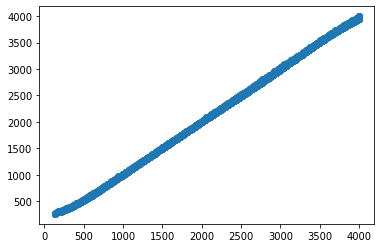

In [81]:
import matplotlib.pyplot as plt
# 如果在脚本中使用ion()命令开启了交互模式，没有使用ioff()关闭的话，则图像会一闪而过，并不会常留。要想防止这种情况，需要在plt.show()之前加上ioff()命令。

predict = list()
la = list()

plt.ion() 
plt.show()
testloader = DataLoader(test_dataset, batch_size=8056, shuffle=False)
for data in testloader:
    inputs, labels = data
    prediction = model(inputs.float())
    #predict.append(prediction)
    loss = loss_function(prediction, labels)
    la.append(labels)
    predict.append(prediction)
    plt.scatter(labels.data.numpy(), prediction.data.numpy()) # 画散点图
    #plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size':20,'color':'red'}) # 显示损失数值
    plt.pause(0.1)

# 如果在脚本中使用ion()命令开启了交互模式，没有使用ioff()关闭的话，则图像会一闪而过，并不会常留。要想防止这种情况，需要在plt.show()之前加上ioff()命令。
plt.ioff() 
plt.show()

Text(0, 0.5, 'test_loss')

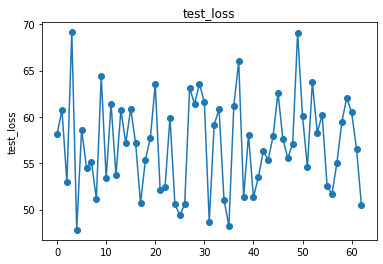

In [40]:
x = range(0, 63)
y3 = test_loss
plt.plot(x, y3, 'o-')
plt.title('test_loss')
plt.ylabel('test_loss')

In [79]:
la = np.array(la)
predict = np.array(predict)
plt.scatter(np.array(la), np.array(predict)) # 画散点图
plt.show

AttributeError: 'list' object has no attribute 'dsize'

In [ ]:
## Saving models

Being able to train a model is fine, but in practice once we've trained the model we probably want to save the result so we can reuse it at a later time. PyTorch makes saving the model easy using the torch.save(state, filepath) function. This will save the weights of the model so they can be loaded into a new instance at a later point.

Run the following code to save the weights for use in the next part of the lab.

#save the trained model weights
torch.save(model.state_dict(), "./BaselineModel.weights")


device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(1000, 512, 256).to(device)
model.load_state_dict(torch.load('BaselineModel.weights'))

In [22]:
def _batch_norm(x):
  eps_ = torch.finfo(torch.float32).eps
  y = (x - torch.mean(x)) / (torch.std(x) + eps_)
  return y


# define baseline model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)


    def forward(self, x):
        #print(x)
        out = self.fc1(x)
        #print(out)
        #raise error
        out = _batch_norm(out)
        #out = self.bn(512)
        out = torch.sigmoid(out)
        out = self.fc2(out)
        #out = self.bn(256)
        out = _batch_norm(out)
        out = torch.sigmoid(out)
        out = self.fc3(out)
        return out

In [32]:
class Complexcard(nn.Module):
    def __init__(self):
        super(Complexcard, self).__init__()
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.bn1 = torchaudio.transforms.ComplexNorm(512)
        self.bn2 = torchaudio.transforms.ComplexNorm(256)   
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = F.sigmoid(out)
        out = self.fc2(out)
        out = self.bn2(x)
        out = F.sigmoid(out)
        out = self.fc3(out)
        return out

In [72]:
def plot_grad_flow(named_parameters):
    '''Plots the gradients flowing through different layers in the net during training.
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in Trainer class after loss.backwards() as 
    "plot_grad_flow(self.model.named_parameters())" to visualize the gradient flow'''
    ave_grads = []
    max_grads= []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
            max_grads.append(p.grad.abs().max())
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(left=0, right=len(ave_grads))
    plt.ylim(bottom = -0.001, top=0.02) # zoom in on the lower gradient regions
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    plt.legend([Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="b", lw=4),
                Line2D([0], [0], color="k", lw=4)], ['max-gradient', 'mean-gradient', 'zero-gradient'])

In [76]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
#testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)


# build the model
#model = BaselineModel()
model = Complexcard()


# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(100):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.Tensor(labels.float()))
        loss.backward()
        #plot_grad_flow(model.named_parameters())
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


RuntimeError: size mismatch, m1: [1 x 128], m2: [512 x 256] at ..\aten\src\TH/generic/THTensorMath.cpp:41

In [40]:
from google.colab import files
files.download('BaselineModel.weights')

ModuleNotFoundError: No module named 'google.colab'

In [45]:
model.eval()

BaselineModel(
  (fc1): Linear(in_features=1000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

In [49]:
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)
for data in testloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs.float())
        print(outputs)
        print(labels)


tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1180., 2980., 3500., 2170., 1340., 2580., 2670., 3330.,  850., 1540.,
        1870., 4000., 2640., 2700., 2410., 3980., 3440., 1460., 3230., 3030.,
        1330., 3600., 1800., 2460., 3320., 1500., 2820., 3010., 2820., 1570.,
        1780., 2860., 2710., 2300., 2770., 2690., 1560., 2500., 4000., 1930.,
        3200., 3490., 1730., 2160., 1330., 1650., 2490., 3430., 3230., 3390.,
        1430., 1320., 2320.,  640., 2300., 2670., 1610., 3610., 1580., 1980.,
        3040., 3910.,  990., 3380., 2960., 1410., 1940., 1380., 2760., 1090.,
        3220., 1690., 1730.,  650., 1380., 2650., 2410., 1690., 3760., 3030.,
        2960., 3980.,  840., 1950., 3820., 3660., 3220., 1160., 1340., 2850.,
        3940., 3600., 2710., 2260.,  990., 2880.,  660., 2170., 1320., 2850.,
        1180., 1710., 2240., 2970., 1300., 3660., 2230., 1590., 1020., 2780.,
        3720., 2010., 1810., 3590., 1200., 3130., 2520., 1900., 2440., 1560.,
        3420.,  5

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2600., 1820., 3340.,  980., 1420., 2700., 2460., 3270., 2030., 1350.,
        3190., 1350., 1900., 2790., 3520., 2300., 2020., 2910., 2330., 2780.,
        2190., 1220., 3170., 2390., 1130., 1670., 1510., 2520., 1910., 1980.,
        1000., 3970., 3350., 2440., 1690., 3540., 1490., 2870., 1270., 2380.,
        1360., 2000., 3800., 1250., 2300., 1940.,  780., 2550., 2940., 1930.,
        3010., 2940., 1900., 2780., 2200., 3160., 1830., 3820., 1500., 1170.,
        3660., 3530.,  940., 1650.,  910., 2080., 2780., 1400., 1420., 1910.,
         640., 2860., 1410., 1650., 3410., 2690., 1520., 2790., 1320.,  570.,
         760., 2680., 2380., 2740., 3300., 3860., 1060., 1940., 3180., 2460.,
        3090., 2210., 1980., 1880., 2510., 2560., 3380., 2990., 3870., 1290.,
        2300., 1050., 2640., 2710., 2260., 3180., 1770., 3270., 3340., 3450.,
        1820., 3990., 3510., 1800., 1980., 3050., 2420., 3700., 2130., 1930.,
        4000.,  8

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 630., 1620., 1850., 2210., 1720., 1970., 1610., 3770., 3010., 2620.,
        1930., 3200., 2940., 1830., 3390., 1380., 3110., 3010., 2820., 1680.,
        3500., 2020.,  730., 2470., 3620., 3710., 3620., 3930., 3680., 3570.,
        3040., 1890., 2660., 3130., 3010., 1560., 2730., 2750., 1710., 3760.,
        3370., 3390., 2010., 3300., 2330., 2710., 3530., 3150., 3690., 3000.,
        3090., 3460., 1510., 3050., 3960., 2010., 3270., 3380., 2400., 2350.,
        1780., 3330., 2120., 3090., 2710., 2510., 3040., 1870., 3270., 3740.,
        2670., 1870., 2170., 3220., 3690., 2050., 3760., 3030., 3890., 1910.,
        1040., 2640., 3840., 3810., 1440., 1100., 2470., 3520., 2770., 2390.,
        1770., 1020., 3480., 3710., 3970., 3930., 2190., 2250., 3970., 3470.,
        1670., 2830.,  610., 2710., 2100.,  560., 3340., 3870., 2030., 2010.,
        3250., 2780., 3040., 2660., 1980., 3050., 1220., 2270., 2110., 3430.,
        1740., 14

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 350., 1500.,  580., 2750., 3340., 2860.,  510., 3930., 3170., 1840.,
        1680., 1190., 2620., 2590., 3390., 2660.,  430., 1460., 1330., 2710.,
        1890., 1490., 2930., 3810., 3840.,  860., 3490., 3060., 2090., 2240.,
        1320., 3130., 3360., 3200.,  890., 2860., 3920., 3820., 2780., 3420.,
        2020., 3050., 1420., 1570., 1790., 3490., 2550., 2640., 3130., 1540.,
        3970., 3970., 3460., 2540., 1210., 2510.,  740., 3560., 2880., 1620.,
        2840., 2420., 1710., 2840., 1640., 1300.,  570., 1260., 3510., 1260.,
        2330., 2460., 2410., 1660., 1810., 2410., 3350., 2360., 3060., 3590.,
        2050., 2310., 3630., 1340., 3400., 3280., 2660., 3630., 1740., 2900.,
        2970., 3910., 2890.,  820., 1710., 2370., 3380., 3420., 2030., 3190.,
        1530., 3180., 1150., 1530., 3680.,  630.,  100., 2820., 3070., 1420.,
        3740., 3240., 3440., 2000., 2200., 2190., 1890., 3900., 3160., 1650.,
        1990., 23

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3490., 1580., 4000., 2560., 2330., 3810., 2690., 1210., 1880., 1060.,
        2140., 2890., 2700., 3230., 2430., 3230., 3900., 2620., 3230., 3670.,
        3130., 1420., 3950., 2370., 3250., 3900., 2450., 2960., 1200., 3910.,
        3610., 3530., 3520., 1640., 1970., 3740., 2730., 1370., 3710., 1840.,
        2530., 1100., 3830., 2860., 3130., 1940., 2450., 2690., 1540., 2740.,
        3110., 2360., 2590., 2310., 2340., 2000.,  780., 2340., 3980., 2980.,
        4000., 3910.,  530., 1170., 2330., 2300.,  780., 1350., 2350.,  300.,
        3790., 1690., 1810., 2940., 1970., 1530., 1790., 1610., 2130., 3740.,
        2910., 3970., 2370., 1870., 3550., 3520., 2470., 2130., 2200., 2720.,
        2250., 3350., 3750., 2540., 2200., 3810., 2150., 2870., 1240., 2910.,
        2090., 3290., 3280., 3120.,  270., 2620., 1910.,  180., 3760., 3890.,
        3930., 3330., 3240., 2400., 2670., 3000., 1750., 1380., 1580., 2590.,
        1820., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2390., 3590., 2980., 3980., 3900., 3050., 3780., 3630., 3300., 3680.,
         710., 3840., 1490., 2390., 2730., 1910., 2770., 3270., 2910., 3450.,
        2920.,  970., 2220.,  860., 1770., 3180., 3200., 2420., 2910., 3430.,
        3740., 3160., 2300., 1900., 3370., 2400., 3570., 2670., 2870., 3470.,
        3560., 3130., 2440., 1820., 1920., 1790., 3470.,  460., 3160.,  440.,
        3720., 3850., 1860., 3400., 3370., 2790., 1730., 1990., 1440., 3900.,
        1730., 2070., 1340., 2190.,  990., 3150., 3130., 1690., 1220., 3840.,
        3640., 3020., 1650., 3400., 2430., 1340., 2190., 3090., 1980., 2160.,
         650.,  920., 1930., 1040., 3410., 1780., 3920., 3310., 1190., 2880.,
        2120., 2250., 2290., 2370., 1650.,  360., 1940., 2300., 2960., 3630.,
        2750., 2490., 2420., 3210., 2890., 2700., 2650., 3030., 3380., 1660.,
        2550., 2230., 1330.,  600., 3590., 2220., 1120., 2930., 3950., 1990.,
        2790., 14

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2530., 2960., 2660., 2050., 2130., 3590., 1870., 1850.,  960., 1900.,
        1400., 1180., 2890., 1670., 2430., 1890., 2960., 2130., 3430., 3500.,
        2410., 1600., 2730., 1650.,  670., 2530., 2530.,  780., 3000., 3510.,
        2560., 2130., 3170., 3350., 3350., 3370., 2840., 1500., 1970., 2840.,
        2550., 1590., 1890., 3120., 1670., 1760., 1320., 2880., 1290., 1460.,
        3120., 2460., 3810., 1650., 1380., 2870., 2820., 3600., 1070., 2570.,
         650., 1050., 1910.,  760., 3380., 2890., 3300., 2900., 2760., 1310.,
        3270., 2890., 1650.,  270., 2280., 1500., 2130., 3670., 1450., 3070.,
        2790., 2880., 1300., 3650., 2680., 1310.,  560., 2750., 1590., 1340.,
        2680., 3460., 2040., 3840., 3660., 3670., 3930., 2160., 3430., 3980.,
        2340., 1800., 2860.,  880., 2620., 1800., 3010., 2780., 2300., 2190.,
        3790.,  650., 3610., 2510., 3620., 1990., 3240., 3830., 3470., 2090.,
        1440., 13

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3960., 1210., 2640., 3870., 1010., 2550., 2630.,  880., 2480., 1350.,
        1310., 2900., 2250., 3100., 3060., 3800., 2520., 1500.,  410., 1100.,
        2160., 3020., 1720., 3340., 3940., 3420., 3760., 2110.,  700., 3960.,
        3610., 3020., 3420., 3000., 1550., 1340., 2330., 1530., 3440., 1000.,
        3800., 2230., 3760., 3570., 1420., 3950., 3900., 2080., 1760., 1560.,
        2670., 2030., 2080., 1140., 3320., 3560., 2390., 3430., 1980., 3020.,
        3620., 3840., 2090., 2980., 2110., 2440., 1740., 3210., 1370., 3560.,
        2410., 1120., 3220., 3130., 2900., 3640., 3450., 3010., 2520.,  540.,
        2740.,  600., 3790., 2620., 3260., 2050., 1500., 2600., 2800.,  350.,
         990., 2050., 2400., 2180.,  630., 1710., 2360., 1950., 3180., 1670.,
        1220., 3020., 1730., 2990., 2310., 2810., 3350., 3950., 1690., 3790.,
        2200., 2330., 1790., 3020.,  880., 3410., 2080., 3410., 1970., 1460.,
        2590., 39

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3650., 2550.,  740., 2430., 2170., 1290., 2900., 2970., 2760., 2430.,
        1030., 1820., 3910., 2270.,  640., 2980., 3260., 1360., 1050., 1900.,
        3170., 3270., 3410., 2310., 2450., 2090., 2140.,  260., 2610., 2400.,
        2980., 2340., 1260., 2650., 3350., 1640., 3580., 2150., 3250., 3020.,
        2390., 1880., 1420., 3150., 2810., 3620., 2700.,  960., 2450., 3870.,
        3600., 3780., 1830., 2910., 1260., 2950., 2420., 3920., 3770., 2870.,
        2110., 3240., 2510., 2960., 3870., 2550.,  250., 3380., 3050., 2530.,
        2940., 3470.,  780., 2850., 3490., 3500., 3840., 2290., 1400., 2590.,
         850., 2240., 2250., 2940., 2980., 1130., 2940., 1820., 3850., 2450.,
        2540., 1760., 3970., 3010., 2350., 2360., 2270., 1390., 2970., 1760.,
        3290., 3820., 2180., 1270., 1460.,  950., 1990., 3120., 2280., 2050.,
        1450., 1210., 2330., 2970., 2800., 1200., 2490., 3040., 2810., 2560.,
        2270., 38

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2190., 2530., 3810., 2950.,  920., 1830., 3050., 3000., 2210., 2370.,
        2730., 1290., 3890., 2380., 2800., 2770., 1430., 1230.,  700., 3510.,
        2050., 1480., 2060., 2850., 1480., 1740., 1670., 3850., 2490., 1870.,
        3930., 1010.,  980., 3560., 1920., 1230., 3710.,  800., 3240., 1970.,
        3740., 2620., 3770., 3470., 2880., 2410., 3060., 2180., 1700., 3740.,
        2770., 2400., 3770., 1290., 2390., 2900., 1900., 1600., 2840., 3460.,
        3260., 1340., 3180., 3410., 2090., 1450., 2560., 1980., 1480., 3050.,
        3950., 1110., 2650., 1810., 2560.,  490.,  540., 2110.,  760., 2690.,
        2200., 2390., 3760., 2370., 2610.,  640., 2450., 2510., 2420., 2450.,
        2560., 3090., 2450., 3470., 1850., 2350., 3990., 2890., 3420., 2930.,
        2470., 3530., 3330., 1480.,  290., 1090., 1630., 3560., 3840., 3850.,
        2760., 3890., 3580., 1340., 1750., 1270., 3600., 2760., 1780., 2420.,
        3920., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2390., 1430., 2230., 2270., 3440., 1450., 3530., 3660., 1790., 3770.,
        2990., 2560., 2180., 3870., 2580., 3750., 1140., 2460., 1530., 3050.,
        2960., 1110., 2080., 2060., 2450., 2490., 3070., 3700., 2960., 2640.,
        3480., 2720., 3390., 2160., 3420., 2300., 3120., 1550., 1200., 4000.,
        3990., 2670., 2220.,  910., 2180., 2950., 3190.,  950., 3970., 1610.,
        3370., 2200., 3440., 1690., 3530., 3040., 3860.,  920., 2430., 2810.,
         850., 2220., 1100., 3420., 1030., 2750., 2810., 1630., 2210., 1610.,
        2430., 3550., 3670., 2910., 1120., 2270., 3850., 3790., 3000., 2700.,
        2750.,  260., 3940., 1810., 3210., 3240., 3430., 2410., 3040., 3900.,
        2010., 3800., 1960., 3650., 3110., 2530., 3730., 2690.,  460., 1070.,
        3470., 1390., 4000., 3280., 2930., 1480., 2300., 3470., 3980., 2450.,
        1870., 2240., 2520., 1530.,  540., 2670., 2210., 1560., 2510., 3380.,
        2780., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1750., 3500., 1510., 2100.,  820., 1490., 2740., 3330., 1390., 2620.,
        1270., 3590., 3290., 1850., 2040., 3480., 2340., 2820., 2500., 1850.,
        1330., 3750.,  530., 1100., 3200., 1540., 1190., 3730., 2200., 3120.,
        2590.,  860.,  800., 3580., 3570., 2120., 3800., 3360., 2700., 2070.,
        2460., 2580., 3830., 3470., 1350., 3220., 2100., 2300., 3950., 1820.,
        1250., 3830., 3440., 2730., 3110., 2790., 1500., 3100., 3930.,  620.,
        3480., 1350., 2990., 3550., 2390., 2120., 3070., 2310., 2300., 2750.,
        2460., 3780., 1540., 2940., 1690., 3760., 3680., 1900., 1610., 3460.,
        3790., 3780., 1830., 3450., 2780., 3600., 3280., 1640., 1210.,  840.,
        2300., 1970., 3320., 2720., 2150., 2340., 1150.,  580., 2590., 3460.,
        3520.,  750., 3230., 3630., 2060., 2880., 2160., 3070.,  520.,  990.,
        2360., 2260., 2090., 3570., 3430., 2970.,  130., 2930., 3920., 1950.,
        1600., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2940., 1930., 2500., 2590., 2250., 1280., 1540., 1520., 1870.,  320.,
        3700., 1230.,  810., 3990., 2140., 4000., 2220., 1770., 1820., 1360.,
        3520.,  830., 3960., 3370., 3170., 1430., 2310., 1640., 2630.,  640.,
         900., 1060., 2080., 2250., 3310., 2240., 3800.,  430., 1390., 2610.,
        2120., 3030., 1020.,  930., 1860., 1700., 1150., 3650., 2430., 3300.,
        3210., 1720., 3370., 3900., 1090., 2710., 2920., 2050., 2680., 2150.,
        2230., 2430., 3320., 1490., 3630., 1150., 3710., 2120., 2450., 2920.,
        1770., 3760., 3050., 1730., 3320., 2770., 3650., 1350., 2910., 2140.,
        2890., 1820., 2810., 2320., 2930., 1860., 3700., 3240., 1820., 2990.,
         990., 3560., 2020., 2230., 3830., 3930.,  970., 2280., 2510., 1380.,
        2500., 1640., 3240., 2460., 1000., 2350., 2910., 1490., 3160.,  480.,
        3850., 1600., 2900., 2860., 1270.,  260., 3230., 2410., 1960., 1960.,
         430., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3080., 2370.,  330., 3910., 2910., 2840., 3260., 1070., 2460., 1000.,
        2980.,  900., 3700., 1240., 1910.,  930., 3210., 2830.,  970., 1390.,
        3650., 3400., 2750., 3710., 3700., 3970.,  820., 1130., 1550., 1340.,
        2360., 2950., 1890., 2940., 3350., 3400., 1650., 3150., 1770., 1850.,
        2910., 2930., 1770., 3600., 2650., 2540., 3230., 1220., 1460.,  890.,
        3790., 1780., 3700., 1100., 1940., 1550., 2960., 3190.,  660., 1630.,
        1910.,  870., 1690., 3650.,  670., 2810., 2900., 3090., 2400., 2200.,
        1750., 1950., 3650., 1920., 3720., 2550., 1020., 3060., 2160., 2470.,
        3960., 2820., 2910., 2130., 3600., 3560., 2520., 3750.,  520., 3330.,
        3670., 2970., 2500., 3970., 2510., 3000., 2830., 1940., 2940., 1590.,
        3070., 2490., 3420., 3110., 3660., 2320., 3420., 3870., 2670., 2310.,
        3030., 1710.,  980.,  770., 3740., 2090.,  980., 3060., 2900., 3480.,
         580., 14

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1200., 3260., 2830., 1420., 2610., 3190., 2210.,  740., 1120., 3110.,
        3340., 1370., 3890., 3010., 3060., 1260., 2740., 2350., 1810., 3010.,
        2980., 2330., 3120., 2100.,  210., 2230., 3650., 2660., 2630., 3940.,
        2970., 2590., 2350.,  970., 2160., 3390., 2210.,  870., 2760., 1860.,
        1220., 3680., 3450., 2970., 2810., 3660., 3900., 3840., 2480., 3830.,
        2760., 2100.,  990., 1900., 2720.,  960., 2570., 2790., 2380., 2950.,
        1640., 1430., 2900., 3470., 1400., 1710., 2030., 2110., 3780.,  810.,
        2410., 1800., 1510.,  950., 3940., 2860., 2420., 2200., 3500.,  640.,
        2790., 2670., 3750., 3740., 1640., 3230., 2900., 2100., 2390., 2820.,
        1950., 1700., 2170., 3740., 3500., 2890., 3850., 2750., 2540., 2730.,
        1320., 2710., 1840., 3390., 1570., 3330., 3580., 1470., 3140.,  360.,
        2380., 2140.,  630., 2460., 1910., 1040., 1730., 3550., 1010., 3560.,
        1790., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1750., 3970., 1880., 1860., 1590., 3570., 3040., 3160., 1570., 2630.,
        3600., 3320., 3530., 1390., 3360., 3940., 3950., 1260.,  600., 2430.,
        1510., 3010., 2510., 3860., 2750.,  700., 1940., 1400., 1500., 1430.,
        2510., 2200., 3960., 1970., 3170., 2860.,  780., 1150., 1590., 2650.,
        2080., 2460., 3310., 2920., 2280., 3690., 2310., 3980., 2310., 3020.,
        2260., 2200., 2670., 2430., 3070., 2490., 2250., 3630., 2400., 3770.,
        1620., 3130.,  480., 3120., 3690., 2610., 1420.,  140.,  990., 3390.,
        2130., 2860., 3230., 2830., 1680., 2880., 1410., 3480., 1850., 3160.,
        3970., 2710., 3190., 2230., 4000., 2710., 2990., 1250., 2220., 2400.,
        2770.,  780., 2500., 3740., 1490., 2510., 3120., 2210.,  910., 2720.,
         310., 3790.,  880., 3180.,  800.,  820., 3910., 1660., 1200., 1730.,
        2150., 1440., 2950., 1940., 1860., 1560., 3930., 3180., 2600., 2740.,
        1860., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2270., 2930.,  860., 2320., 1390.,  520., 1550., 1200., 1430., 2200.,
        3930., 3470., 3530.,  880., 2450., 3910., 3950., 2970., 3670., 2270.,
        1710., 3030., 1510., 1340., 1980., 2400., 2570., 1350., 1820., 1620.,
        2660., 3630., 3480., 2860., 1800., 2860., 1700., 2520., 2120., 2970.,
        1600., 3460., 1360., 3460., 2950., 2900., 3350., 1780., 2910., 3940.,
        3770.,  810.,  840., 2420.,  910., 2470., 1660.,  270., 3980., 1750.,
        3690., 2730., 2350., 1050., 1440., 3140., 2070., 2910., 2900., 1940.,
         410., 3790., 2920., 3780.,  890., 1570., 1200., 2180., 2830., 2850.,
         780.,  670., 2970., 1910., 2790., 1050., 2240., 2370., 2720., 1960.,
        1610., 1400., 2200., 2790., 2880., 1680., 1620., 3820., 3080., 3850.,
        1970., 2970., 2110., 2230., 2110., 2710., 3690., 2680., 2720., 2980.,
        2760., 2760., 2450., 1930.,  890., 2930., 2350., 3010., 2620.,  800.,
        2730., 24

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1140., 3670., 3320., 3220., 3250., 2020., 1400., 2940., 2410., 3170.,
        2500., 3650., 2010., 3530., 1700., 1460., 2480., 1670., 3140., 3190.,
        3700., 3190., 3250., 2460., 1300., 1860., 2060., 3870., 3920., 3140.,
        2350., 1990., 2280., 3700., 2090., 3630., 3610., 3860., 3000., 2900.,
        1870., 2970.,  800., 3050., 3120., 2310., 2470., 1050., 1090., 3060.,
        2990., 2140., 3800., 3790.,  840., 2240., 2940., 2310., 2020., 2500.,
        1670., 3140., 2550., 2950.,  360., 2540., 1880., 2460., 2820., 1210.,
        3810., 3730., 2610., 2230., 1820., 2780.,  860., 2680., 2450., 3890.,
        3080., 2780., 3150., 2000., 2800., 3610., 2030., 3780., 3620., 3150.,
        1810., 1220., 2940., 2340., 2120.,  770., 2700., 2810., 3480., 3330.,
         620., 2910., 1750., 2350., 3400., 2360., 3600., 3140., 2300., 3660.,
        1840., 2130., 1870., 3950., 1080., 2150., 2760.,  780., 2450., 3050.,
        3180., 36

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1950., 3120., 3700., 2600., 2960., 2010., 3890., 1680., 2660., 2240.,
        2530., 3090., 3120.,  930., 2730., 3780., 2200., 3790., 3400.,  710.,
        1970., 3460., 2290., 3940., 1850., 2010., 2000.,  790., 2830.,  780.,
        3060., 2380., 2500., 2470., 1390., 1280., 2450., 2370., 1820.,  320.,
        3490., 1070., 1270., 2250., 2020., 2730., 1890., 1920., 2790., 1560.,
        3810., 3640., 1250., 2370., 1410., 3870., 1170., 3340., 2450., 3540.,
        1860., 3590., 2080., 2620., 2760., 3800., 3230., 1210., 1400., 1150.,
        1090., 1560., 1630., 2510., 3770., 2880., 3720., 1820., 3730., 3740.,
        1700., 1140., 2380., 2170., 2060., 2240., 2620., 3500., 1830.,  790.,
        2480., 2070., 2510., 3810., 2990., 1270., 3970., 1980., 3610., 3360.,
        2530., 1930., 2680., 1860., 1020., 3350., 2410., 3540., 1040., 2490.,
        2450., 2470., 3900., 3760.,  970., 2700., 1930.,  370., 1160., 3910.,
        1720., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1660., 1920., 2770., 3080.,  920., 3620., 3200., 2140., 3310., 1640.,
        3770., 1840., 2070., 2570., 2440., 2760., 2010., 2440., 1860., 2420.,
         990.,  630.,  680., 3080.,  490., 2350., 2980., 3440., 2900., 1300.,
        1370., 2570., 2290.,  580., 3360., 2710., 1580., 3210., 2750., 1390.,
        3470., 1920., 1100., 3120., 2540., 3130.,  630., 3070., 2020., 1450.,
        2580., 3960., 1720., 1210.,  570., 1310., 1450.,  900.,  710., 2650.,
        3600., 3300., 3040., 3580., 2140., 1740., 1920.,  230., 1220., 2210.,
        1890., 2430., 2830., 2350., 3350.,  440., 2640., 1800., 3660., 3670.,
        3050.,  450., 1450., 1530., 3380., 3370., 1310., 2750.,  280., 1560.,
        3230., 3700., 3960., 2860., 1650., 1820., 3280., 3500., 1670., 2480.,
        2860., 3200., 3360., 2870., 2980., 2690., 2010., 1740., 2560.,  380.,
        3410., 2000., 3860., 2410., 1310.,  630., 1230., 3390., 2600., 3480.,
        1840., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3430., 2950., 2080., 1200., 1780., 1920., 3620., 2430., 3300., 3810.,
        2860., 3900., 2160., 2000., 3180., 3870., 1810., 1590., 1820.,  950.,
        2340., 2610., 3490., 2790., 1920., 2580., 3520., 1610., 1740., 3670.,
        1260., 2840., 1750., 1960., 3690., 3910., 2130., 2580., 1930., 2100.,
        2950., 2960., 3100., 3940., 2090., 3980., 2690., 3830., 3950., 2460.,
        3480., 2410., 1570., 2700., 2700., 1690., 3310., 1560., 1980., 3590.,
        1190., 3900., 3930., 3110.,  890., 4000., 2230., 1750.,  930., 2570.,
        2120.,  430., 3690.,  820., 1660., 3460., 2040., 1610., 2670., 2290.,
        3940., 2840., 2830., 1790., 2980., 1620., 3490., 2770., 2000., 2330.,
         470., 2020., 3520., 3000., 3630., 2690., 3820., 1040., 1900., 1700.,
        2630., 2170., 3580., 3430., 2490., 3580., 3960.,  820., 2790., 1820.,
        1840., 2810., 2510., 3950., 2660., 1750., 3650., 1430., 2280., 1540.,
        3170., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3300., 2250., 2540., 2610., 1450., 3200., 1910., 2900., 3920., 1110.,
        3220., 3560., 2610., 1940., 1960., 1350.,  780., 1350.,  390., 1560.,
        3250., 2200.,  860., 3860., 3200., 2150., 1370., 1530., 1710., 2580.,
        3650., 2400., 2040., 1280., 2090., 1520., 3260., 1630., 2430., 2890.,
        1860., 1450., 1840., 1810., 2070., 1810., 1540., 3160., 2810., 3880.,
         970., 3590., 2760., 1870., 1870., 3790., 3470., 3180., 3620., 1890.,
        3990., 2330., 3370., 2080., 2560., 1050., 2190., 2200., 2850., 3750.,
        1610., 3230., 3230., 3090., 1810., 3330., 3990., 1510., 1560., 3190.,
        3970., 2390., 3390., 3080., 2710., 3720., 1780., 1880., 2470., 2950.,
        1140., 3540., 3010., 2440., 2840., 1930., 3720., 1390., 3610., 1330.,
        2670., 1260., 3490., 2800., 1910., 1440., 2640., 1930.,  850., 3860.,
         630., 2290., 1470., 1380., 3480., 3400., 2280., 3190., 3680., 2040.,
        1980., 34

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3000., 3040., 3190., 2170., 1250., 3150., 2520., 1640., 2130., 3940.,
        3880., 2990., 2340., 3340., 2230., 2920., 2370., 1430., 3320., 1840.,
        3270., 2230., 3700., 1020., 2290., 2100., 3940., 2790., 1500., 2730.,
        1710.,  470., 3720., 2240., 3960., 3870., 2670., 1770.,  680., 2000.,
        1950.,  800., 3730., 3770., 3020., 1510., 1760., 3500., 2540., 3000.,
        2720., 3610.,  730., 2230., 1080., 2300., 3430., 2350., 3840.,  880.,
        2990., 2000., 3180.,  910., 3030., 3850., 1450., 1640., 3630., 2820.,
        3190., 3660.,  570., 1560., 3300., 2530., 1890., 1230.,  770., 3400.,
        2710., 3650., 3310., 3600., 2890., 3810., 3890., 2960., 2970.,  100.,
        2630., 2820., 1170., 2730., 2100., 3650., 2380., 2720., 1590., 3480.,
        3920., 2360., 2070., 3420., 3480., 3660., 2950., 3980., 2150., 1810.,
        1080.,  240., 1630., 1140., 1800., 3470., 2510., 2180., 1070., 3730.,
        3290.,  3

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1140., 2050., 2280., 2170., 1470., 3630., 1200., 2350., 3390., 3900.,
        1190., 2320., 3150., 1840., 3480., 3350., 2430., 1460., 2630., 2870.,
        3480.,  900., 2230., 1430., 2420., 1280., 3200., 3100., 3720., 2880.,
        3850.,  930., 3110., 2090., 3110., 3330., 2940., 1490., 2390., 3470.,
        2320., 3450., 1630., 2870., 1960., 3680., 3610., 2270., 2510., 3690.,
        3400., 2710., 1800., 2270., 1760., 3880., 2590.,  650., 2200., 2180.,
        1820., 3440., 2340., 1360., 2010., 3810., 1370., 3950., 2540., 3770.,
        2800., 1260., 2800., 1160., 1880., 3630., 2310.,  220., 3890.,  790.,
        3080., 3680.,  510., 2190., 2690., 1610., 1680., 3470., 2760., 2690.,
        1680., 2550., 2140., 1610., 3080., 2370., 3200., 2740., 2440., 1780.,
        1840., 3810., 3270.,  720., 3680., 3340., 3170., 3860., 2900., 3690.,
        2580.,  670., 2320., 1060.,  290., 3470., 1680., 2450., 1390., 3130.,
        2550., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3190., 3510., 2160.,  810., 1580., 2990., 2450., 2030., 1110., 2820.,
        2390., 2460., 2480., 2990., 3610., 1160., 3530., 1950., 2200., 1530.,
        3990., 3920., 3120., 2420., 1570., 3960., 2530., 1470., 3070., 3130.,
         410., 2260., 3140., 2980., 2270., 2820., 3640., 1210., 1790., 3520.,
        1490., 2230., 3940., 3030., 2320., 3250., 3490., 3150., 1960., 3410.,
        3310., 3070., 2790.,  660., 3080., 3440.,  670., 1380., 2540., 1970.,
        1220., 3760., 2250., 3650., 3340., 2230., 1270., 3140., 2050., 2770.,
        3860., 1170., 1030., 2070., 3230., 2630., 3560., 2400., 3550., 1180.,
        1840., 2290., 1570., 3560., 3490., 1180., 2340., 2560., 1150., 2310.,
        1850., 3150., 2070., 2780., 1780., 3550., 3440.,  820., 1410., 3450.,
        2490., 3780., 3470., 3860., 3640.,  650., 1400., 1810., 2300., 3530.,
         290., 2310., 2830., 3690., 3310., 3110., 3600., 3160., 3350., 2170.,
         530., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2420., 3240.,  560., 2160., 1380., 3610., 3350., 3060., 3590., 1800.,
        2200., 1210., 2800.,  680., 3200., 3150.,  230., 3200., 3300., 3790.,
        3530., 1710., 2090., 3710., 2840., 2860., 2020., 2080., 1750.,  850.,
        3460., 1740., 1810., 3030., 2460., 3620., 2490., 2170., 1890., 3980.,
        1100.,  150., 2160., 3650., 3180., 2710.,  630., 2400., 3810., 3400.,
        1550., 1570.,  810., 2030., 2150., 2820., 3710., 2030., 3050., 3420.,
        3770., 3010., 3740., 3060., 2400., 2310., 2360., 2530., 1560., 1580.,
        2010., 2970., 3140., 1350., 1540., 3070., 1900., 2860., 1400., 2290.,
        3280.,  890., 2920., 3690., 2500., 2610., 3030., 2140., 2070., 3610.,
        3040., 3530., 2570., 1400., 3510., 2590., 1640., 2070., 3120., 1530.,
        3960., 1930., 3560.,  960., 3180., 1330., 2230., 1870., 2200., 2440.,
         430., 3720., 3880., 2040., 1710., 2130., 1220., 2390., 1720., 3920.,
        2840., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2140., 2450., 3920., 2630., 1910., 3400., 2060., 3350., 3470.,  910.,
        2460., 1870., 3100., 3620., 3160., 3210., 2610., 3490., 1630., 2900.,
        3680., 1630., 3400., 1230., 3910., 1580., 3030., 1370., 2890., 1800.,
        1710., 3290., 2740., 2100., 3910., 2150., 2030., 2390., 3790., 3800.,
        2780., 2140., 2300., 2660.,  710.,  910., 3050., 3990., 3930., 3000.,
        2600., 1560., 3110., 1850., 3150., 1610., 2550.,  800., 1880., 3650.,
        3880., 3320., 3720.,  480., 2740., 2370., 1410., 2200.,  570., 3710.,
        3910., 3320., 1270., 2200., 2490., 1780., 1260., 2400., 2330., 3970.,
        2060., 2670., 2550., 2230., 1810., 3170., 2530., 3370., 2130., 1850.,
        2580., 2240., 3130., 2830., 2370., 2510., 1030., 2500., 2550., 3780.,
        3310., 2920., 1010., 3390.,  710., 1610., 3810., 3140., 3500., 2490.,
        3230., 2250., 2930., 2230.,  860., 3710., 2420., 1990., 3330., 1120.,
        2980., 35

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2300., 2730., 2010., 3280., 2150., 3300.,  690., 2270., 2590., 1450.,
        2170., 1490., 2470., 2230., 3460., 2740., 3880.,  610., 1570., 2120.,
        3340., 3140., 3630., 3500., 3110., 3210., 2190., 3570., 2970., 1420.,
        1870.,  550., 3390., 2220., 3620., 2710., 2040., 2660., 3040., 1190.,
        2500., 3800., 1600., 1370., 3790., 2590., 1810., 1950., 2670., 3150.,
        3400., 2280., 3750., 2760., 1500., 1670., 3650., 2830., 1700., 1080.,
         880., 2360.,  420., 3040., 3690., 2710., 1260., 1560., 2550., 1940.,
        3820., 2940., 1280., 3290., 3570., 2530., 2840., 2330., 1470., 3990.,
        2900., 3130., 3160., 2110., 2190., 1140., 1090., 2770., 2600., 3920.,
        1260., 3440., 2810., 3230., 1320., 3780., 2940., 1890., 3070., 1020.,
        1070., 1750., 3560., 4000., 1920., 2810., 2340.,  640., 3920., 1750.,
        3240., 2600., 1170., 2170., 2540., 3780., 1370., 3170., 3860., 3550.,
        3850., 33

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2480., 2970., 3570., 3560., 3480.,  690., 2180.,  450., 2860., 2680.,
        3290., 3090., 2080., 3530., 2690., 2980., 3490.,  950., 3150., 3920.,
        3710., 2600., 1220., 2810., 3530.,  430., 1160., 2620., 2150., 1610.,
        3060., 2640., 2150., 3380., 3060., 3690., 1970., 3820., 3840., 3970.,
        2670., 1610., 2740., 1500., 1530., 2720., 1860., 3170., 2140., 3480.,
        3320., 2240.,  920., 1240., 3750., 3260., 2670., 2740., 1480., 1460.,
        3870., 2340., 2670., 2760., 1980., 1310., 2530., 3630., 3470.,  850.,
        2180., 2850., 2810., 2440., 1500., 2230., 3610., 2690., 1410.,  850.,
        2940., 2850., 2440., 1170., 2190., 2520., 3150., 3650., 2130., 2900.,
         950., 2850., 3540., 1500., 3150., 2170., 2030., 1950., 3810., 2430.,
        3210.,  540., 2830., 2650., 3460., 1870., 1600.,  420., 3570., 3430.,
        3040., 1140., 3000., 2820., 3990., 1940., 2770., 3580., 3380., 3240.,
        1970., 23

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3040., 1890., 2910., 1200., 3700.,  940., 1810., 1480., 3480., 1970.,
        2510., 2640., 3940., 2210., 2180., 1130., 1820., 3590., 2300., 3060.,
        1620., 2550., 3770.,  800., 3130., 1620., 1660., 3890., 3260., 3900.,
        3030., 3010., 3320., 3610., 3960., 1660., 1410., 3820., 3000., 1670.,
        2580.,  830., 2460., 2420., 2450., 1610., 3750., 3370., 1170., 3630.,
        1390., 2190., 1890., 1240., 3360., 3830., 3990., 3790., 3230., 1720.,
         420., 1610., 2720., 1460., 2690., 3310., 2810., 3180., 1170., 1510.,
         210., 2790., 2270., 2910., 1920., 2770., 2240., 3070., 2280., 3210.,
        2650., 3560., 3700., 3060., 3940., 2010., 2690., 1800., 1680., 3490.,
        2240., 1710., 2050., 2950., 3020., 3510., 1570., 2650., 1040., 3390.,
        3730., 3430., 3460., 2460., 3610., 2620., 2110., 3260., 3410., 3310.,
        1280., 1430., 3480., 3850., 1030., 3330., 1690., 2800., 3990., 2080.,
        1410., 12

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3680., 3530., 3860., 1550., 2490.,  380., 1920., 3480., 2220., 3370.,
        2670.,  580., 3180., 2370., 1900., 2470., 2030., 3340., 3980., 3900.,
        2570.,  550., 2010., 3540., 3350., 1940., 3830., 2840., 3150., 3840.,
        2160.,  670., 1180., 2930., 2880., 2210., 2880., 2600., 3290., 2260.,
        2330., 1880.,  590., 2720., 2410., 1470., 3420., 3980., 3740.,  410.,
         600., 3620., 1710., 3630., 2590., 1900., 3760., 1720., 2030., 1880.,
        3660., 1990., 2950., 2310., 3310., 3170., 3420., 3790., 1120., 2350.,
        2970., 1280., 1050., 3380., 3360., 2290., 2980., 2510., 1840., 3280.,
        2630., 3550.,  430., 2270., 3860., 2310., 1800., 3020., 2610., 3910.,
        1100., 3010., 3470., 2380., 2560., 2480., 2530., 2330., 2120.,  320.,
        3520., 1870., 3520., 2020.,  730., 2750., 2130., 2680., 1060., 2290.,
        2340., 3620., 2810., 2640., 2700., 2070., 1290., 2810.,  850., 2430.,
        1810., 12

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3330.,  770., 1210., 1650., 3230., 2770., 1040., 3200., 2880., 3910.,
        2890., 2410., 3950., 3890., 1630., 3520., 1600., 2020., 3680., 3050.,
        3760., 1480., 3310., 3550., 1690.,  720., 3620., 1710., 3870., 3970.,
        2430., 2490.,  790., 3290., 2460., 3500., 3040., 2530., 3540., 1340.,
        3410., 2420., 2070., 3710., 3040.,  320., 2650., 3980., 3460., 3330.,
        2230., 1420., 1580., 1660., 2660., 2980., 3240., 3090., 1900., 3160.,
        3900., 2920., 1870., 3580., 2000., 2800.,  870., 2960., 3770.,  730.,
         450., 3480., 2130., 1010., 1090., 3720., 1190., 1890.,  630., 3950.,
        3660.,  450., 2250., 2880., 1540., 1640., 2520., 2880., 1410., 1980.,
        3290., 2060., 3010.,  830., 2240., 2760., 1890., 1930., 1560., 1310.,
        2400., 3220., 1440., 2970., 2020., 3800., 3730., 1900., 2200., 2050.,
        1000., 3710.,  540., 2040., 3180., 2130., 3410.,  670., 2940.,  200.,
        2500., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2680., 1950., 2450.,  900., 3350., 2860., 2320., 2080., 1650., 3940.,
        1750., 3170., 1870., 1700., 1790.,  910., 3940., 2820., 1320., 3720.,
        3160., 1060.,  850., 2690., 3220., 1960., 3770., 2900., 1340.,  630.,
        3290., 1530., 3280., 2170., 1590., 3010., 2880., 3890., 2740., 3140.,
        2040., 3420., 3430.,  400., 2130.,  750.,  970., 2300., 1880.,  950.,
        1600., 3840., 1670.,  220., 1890., 3200., 1910., 2160., 1480., 3920.,
        1790., 2380., 3730., 1800., 3610., 3420., 1680., 1220., 3650., 2800.,
        3890., 1430., 3790.,  400., 3300., 2310., 2800., 2040., 1840., 3350.,
        3510., 2950., 2360., 2740., 1550.,  840., 1810., 2260., 2080., 2450.,
        3670., 3810., 2010., 3480., 2620., 2040., 3070., 1840., 3960., 3340.,
        2540., 3710., 1940., 3550., 2220., 1460., 1240., 3340., 2140., 3610.,
        3410., 3400., 1830., 2090., 2270., 3740., 1970., 3460., 2940., 3590.,
         520., 18

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3820., 3740., 2390., 1330., 2800., 2910., 2460., 1200., 2740., 2330.,
        3010., 3200., 3290., 1850., 2880., 3450., 2810., 1810., 2990.,  990.,
        1290., 3820., 1310., 1530., 1180., 2940., 3830.,  560., 3220., 3940.,
        3860., 2570., 3200., 2130., 2570., 2450.,  940., 2800., 2890., 3150.,
        4000., 2900., 2150., 3980., 1230.,  510., 3770., 1860., 3280., 3080.,
        3010., 3400., 1390., 3660.,  860., 2610., 2010., 2050., 2490., 3850.,
        2740., 2070., 1810., 2230., 2700., 3740., 2100., 2700., 3380., 2430.,
         900., 1550., 2020., 2240., 1550., 3110., 2800., 3260., 2500., 2470.,
        3210., 2510., 2490.,  170., 1140., 2460.,  720., 2310., 3870., 1910.,
         590., 3990., 2220., 1300., 2200., 3210., 1790., 3350., 1730., 1780.,
        2650.,  880., 3850., 3480., 3250., 1590., 2150., 3540., 3030., 1320.,
        3160., 1780., 1970.,  700., 3170., 1680., 2670., 2350., 1000., 1160.,
        3570., 31

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1800., 3380., 1980., 3710., 3990., 2790., 3330., 2530., 2690., 1250.,
        3330., 2110., 3120., 1480., 1150., 3090., 3890., 2660., 1390., 2040.,
        3900., 2400., 3090., 2840.,  790., 2160., 2590., 1260., 3180., 1580.,
        1080., 1370., 3530., 2960., 3700., 2610., 2380., 1060., 2580., 3400.,
        1940., 3750., 2190., 2860., 1570., 3300., 2530., 1830., 3400., 3380.,
        2460., 1990., 1730., 1860., 1870., 1830., 3450., 3030., 3220., 1880.,
         940., 3180., 1980., 1940., 2770., 2940., 3190., 3390., 1780., 3260.,
        1680., 2590., 2250., 3390., 2140.,  870., 3630., 2750., 2530., 2060.,
        2190., 1650., 2110., 3120., 1830., 3940., 1730., 1240., 3520., 1740.,
        2590., 1990., 1860., 1080., 2270., 1830., 2020., 2520.,  720.,  450.,
         730., 3310.,  810., 3090., 3560., 2540., 1860., 2850., 1770., 1170.,
        1300., 3720., 3510., 3270., 2710., 2680., 3530., 1720., 3940., 2230.,
        2220., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3710., 2580., 1770., 3750., 1020., 1500., 2990., 3760., 3310., 2650.,
        1290., 2760., 2950., 3670., 2710.,  290., 3100., 1240., 3510., 1460.,
         560., 3830., 1380., 3030., 1290., 2080., 1440., 2230.,  360., 3700.,
        3820.,  500., 2390., 1890., 2790., 1640., 1010.,  840.,  740., 1770.,
        3310., 1970., 2340., 2960., 3020., 3070., 3620., 3620., 3630., 4000.,
        2500., 1120., 3900., 3360., 3790., 2660., 1280., 2210., 2550.,  950.,
        2550., 2070., 1310., 3750., 3560., 2830., 2070., 3340., 2380., 1890.,
        3120., 1280., 1560., 1960., 3570., 2420., 1620., 2190., 3860., 2570.,
        3570., 2420., 2540., 3800., 3340., 1550., 3320., 1030., 2920., 2030.,
        1910., 2770., 2140., 3740., 1810., 2290., 3560., 3410., 2770.,  440.,
        1750., 2270., 2000., 1920., 2170., 2140.,  570., 2090.,  910., 2650.,
        2780., 2600., 2370.,  540., 2130., 2030., 2940., 2070., 1710., 1670.,
        2490., 25

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3800., 1410., 3670., 1260., 1850., 3470., 2470., 3070., 2070., 2630.,
        1750., 3020., 2230., 1230., 2080., 2710., 3110., 2490., 1230., 1350.,
        2520., 1560., 2150., 1190., 1030., 3040., 2600., 2120., 3480., 3940.,
        1150., 2680., 3320., 3960., 1050., 3510., 3080.,  420.,  920., 2480.,
        3240., 3770., 3320., 2230., 3770., 2500.,  190.,  860., 2340., 2570.,
        2580., 2170., 3870., 2500., 2770., 2200., 2340., 3250., 3060., 1980.,
        2390., 1280., 3490., 2580., 1110., 1420., 3710., 2700., 1690., 1730.,
        1300., 2990., 3570., 3750., 2700., 3710., 2540., 1210., 3260., 2810.,
        1790., 2650., 3190., 2020., 2850., 1570., 3330., 3250., 2370., 1870.,
        2700., 3730., 1910., 2330., 1640., 1100., 3650., 3940., 2310., 2730.,
        1960., 2540., 3050., 1100., 1770., 2980., 2530., 3790., 2230., 1380.,
        1630., 3700., 1690., 2630., 3730., 3110.,  840.,  630., 3200., 2740.,
        1090., 26

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3390., 1000., 2180., 2910., 3980., 1740., 2760., 2190., 2680., 3540.,
        1740., 2580., 2760., 2830., 1870., 2640., 2810., 2040., 3080.,  710.,
        2690., 3360., 3210., 2270., 3530., 3300., 3400., 2220., 3020., 1320.,
        2920., 2970., 3320.,  740., 2740., 3010., 3050., 2230., 2800., 3910.,
        3430., 3700., 1210., 1980., 2800., 1820., 2680., 3300., 3210., 2450.,
        1120., 3040.,  940., 2790., 2020., 3530., 2890., 3860., 3010., 4000.,
        2700., 3900., 3810., 2360., 1720., 3120., 1820., 1870., 2480., 1800.,
        1170., 3400., 1720., 1140., 1590., 3630., 3450., 3570., 2540., 3830.,
        2200., 1350., 3810., 2900., 3740., 3720., 2620., 1370., 3140., 3550.,
        3970., 1150., 3440., 2540., 1480., 2530., 1160., 1930.,  350., 2060.,
        1670., 2010., 3580., 2320., 2140., 2540., 1200., 1670., 3990., 2000.,
        2380., 1410., 3840.,  470., 3330., 2140., 3860., 3450., 3130., 3910.,
        2600., 12

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1380., 1820., 1180., 3180., 3850.,  820.,  670., 3370., 1690., 3780.,
        1840., 1900., 3730., 1120., 3290., 2870., 1520., 2670., 3600., 1960.,
        3170., 2990., 2540., 1570., 2800., 2340., 3820., 3710., 3340., 1700.,
        2100., 3160., 2710., 3660., 2850., 1240., 2850., 1500., 3940., 2820.,
        2580., 4000., 2240., 2040., 1500., 2340., 2740., 3280., 2940., 1190.,
        1130., 3890., 3170., 1000., 3890., 2590., 2950., 1920., 3410., 1840.,
        1440., 2340., 2610., 1800., 3610., 2330., 1240., 1270., 3430., 2660.,
        1300., 3570., 3540., 3730., 3780., 3270., 1990., 3060., 1820., 1990.,
        2680., 1340., 2330., 2930., 2710., 2580., 3060., 3940., 1190., 2870.,
        2780., 2780., 1460., 1300., 3310., 1870., 3040., 2510., 3440., 2120.,
        1810., 3390., 3610., 1760., 3120., 2640., 1610., 1730., 2100., 3210.,
        2660., 1740., 1850., 1670., 3690., 2160.,  410., 2690., 1680., 3560.,
        3230., 29

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2080.,  190., 1350., 2340., 2710., 1270., 3740., 2540., 2020.,  240.,
         710., 2990., 2880., 2950., 3480., 2640., 2090., 2410., 3430., 3790.,
        2360., 3840., 3450., 2050., 2130., 3700., 1760., 2850., 1360., 3380.,
        3920., 3930., 2060., 2380., 2220., 2500., 3150., 1440., 3750., 2710.,
        3860., 3250., 1930., 2110., 2490., 2170., 3230., 3200., 2330., 3550.,
        2820., 2190., 2210.,  710., 3260., 1950., 1400.,  520., 1760., 2210.,
        3710., 2350., 1800., 2570., 2900., 2900., 2800., 1040., 3460., 3510.,
        1540., 3630., 3680., 3370., 3840., 2730., 1760., 3680., 1140., 2400.,
        3880., 3960., 2740., 2050., 3780., 2720., 3980., 1090., 2320.,  480.,
        2450., 3080., 1310., 3370., 3440., 3640., 3130., 3720., 2180., 2620.,
        2700.,  720.,  730., 3850., 2880., 2090., 3450., 3970., 1710., 2900.,
        3720., 2060.,  720., 3540.,  710., 2380., 1100., 3660., 1270., 1070.,
        1400., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2560.,  420., 2260., 1760., 1840., 3430.,  450., 2430., 2680., 3240.,
         620., 3940., 3910., 1390., 2520., 3920., 1740., 1900., 2790., 3670.,
         380., 3120., 1610., 3570.,  830., 2800., 2370., 1830., 1260., 2510.,
        4000., 2030., 2560., 1220., 2450., 2770., 2660., 3560., 2950., 1070.,
        2330., 2810., 3870., 3080., 3150., 2040., 2530., 1940.,  600., 2000.,
        1190., 2850., 2290., 3970., 2140., 2970., 2500., 2690., 2320., 2370.,
        3130., 1820., 1310., 2920., 2610., 2470.,  160., 2660., 3540., 1590.,
        2690., 3880., 3960., 2650., 3370.,  590., 2140., 1240., 3570., 1620.,
        3180., 3590., 3890., 3280.,  940., 2830., 3120., 3400., 2860., 2650.,
        3550., 3680., 3060., 2630., 2790., 1510., 2090., 1700., 2460., 2970.,
        3140., 2570.,  910., 1760., 2920., 2240., 1280., 1670., 2470., 2440.,
         740., 3290., 3560., 3590., 2130., 3060.,  290., 2180., 3160., 2680.,
        1940., 25

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1790., 1650., 3680., 3490., 2320., 1730., 3350., 3710., 2410., 3360.,
        1660., 3060., 3200., 2770., 3410., 2040., 2660., 3550., 2090., 2560.,
        2330., 1080., 2910., 2280., 3890., 2570., 2860., 3440., 1340., 3580.,
        1840., 1250., 1530., 1540., 1710.,  820., 1580., 1760., 2560., 2310.,
        1380., 3260., 3900., 3780., 2290., 1900., 1960., 1230., 2160., 3560.,
        2950.,  370., 3980., 2320.,  770., 1830., 3770., 2010.,  300.,  400.,
        1030., 3720., 1460., 3930., 3860., 3500., 3620., 2860.,  860., 3250.,
        3800., 2930., 1970., 3870., 3140., 3420., 1690., 1160.,  870.,  990.,
        1990.,  780., 1110., 3750., 1800., 3780., 1790., 1850., 2430., 2960.,
        2750., 2470., 3340., 2770., 3040., 2150., 3610., 2430.,  570., 3380.,
        3500., 3670., 1570., 2120., 2380., 3960., 2470.,  830., 3330., 1180.,
        3700., 2730., 1780., 1510., 1700., 3250., 2440., 1890., 2370., 3670.,
        3930., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3070., 1380., 1710., 1090., 1020., 3000., 1590., 3870., 3410., 3380.,
        3910., 2720., 3520., 1740., 2080., 3480.,  150., 3980., 2550., 2000.,
        1750., 3910., 1200., 2590., 3630., 3890., 2040., 1030., 2870., 2190.,
        1010., 1040., 1400., 1230., 2240., 2930., 3890., 1590., 2590., 3480.,
        2800., 3120., 2390., 2920., 3080., 2090., 2530., 2750., 3260., 2320.,
        2540., 2590., 2850., 2670., 2570., 3260., 3430., 2080.,  750., 3230.,
        1510., 1070., 2560.,  710., 2600., 3640., 3760., 3470., 2610., 3800.,
        3180., 2790., 2040., 3360., 3180., 1410., 1810.,  220., 1710., 2510.,
        1100.,  310., 1910., 1520., 2810., 2830., 1450., 3400., 1800., 1920.,
        3010., 3350., 3490., 2350.,  610., 1390.,  800., 1630.,  310., 3470.,
         850., 2720., 3760.,  830., 3930., 2960., 1450., 2820., 3420., 3940.,
        3240., 1280., 3180., 2410., 3980., 1440., 2400., 2990., 3610., 1030.,
        3340., 26

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2040., 2840., 3990., 2990., 3690., 1560., 3560., 3740., 3230.,  100.,
        2070., 2330., 3560., 1250., 3770., 2520., 3030., 3990., 2110., 2290.,
        1950., 2460., 2640., 3480., 1430., 2030., 2060., 2840., 1650., 2750.,
        2410.,  860., 1320., 1260., 2470., 3530., 3300., 2770., 2420., 3850.,
        3110., 3320., 2330., 3540., 1810., 3110., 2600., 1880.,  990., 3690.,
        1930., 2400.,  410., 2840., 3450., 1280., 3440.,  650., 3570., 3270.,
        3050., 1540., 3160., 1780., 2400., 3950., 2190., 1720., 3440., 2770.,
        1530., 2620.,  370., 3580., 2730., 1680., 2640., 2050., 1160., 2760.,
        3580., 3030., 3580., 2020.,  180., 2540., 1810., 3480., 2820., 2950.,
        3940., 3440., 3210., 1880.,  860., 1590., 1430., 2930., 1870., 3170.,
        3480., 3900., 3810., 4000., 2300.,  500., 3910., 1360., 1260., 3440.,
         370., 2680., 3210., 2810., 3590., 1360., 2690., 3940., 1360., 2990.,
        3540., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1820., 2780., 3580., 2090., 3650.,  220., 2920., 3190., 2810., 1450.,
        1540., 3050., 3490., 3900., 2200., 2350., 1910., 2930.,  150., 1980.,
        1370., 3900., 1100., 3280., 2890., 1610., 3750., 2220., 3200., 1970.,
        2330., 1570., 3230., 1470.,  980.,  230., 2130.,  650., 2300., 3410.,
        1130., 2240., 1500., 2630., 1130., 1470., 2470., 1790., 1490., 3860.,
        1660., 3640., 3780., 2100., 1820., 1940., 1720., 3960., 2410., 3960.,
        1650., 1850., 1270., 1740., 2250., 2580., 2790., 2840., 2110., 2610.,
        3160., 1150., 3850., 2340., 1810., 1100., 1750., 3740., 2160., 3410.,
        3150., 1010., 3950., 1390., 3410., 1320., 2890., 1710., 1540., 3980.,
        2940., 1300., 2360., 3950., 2200., 1640., 3110., 1320., 2480., 2500.,
        3100., 3080., 1130., 3810.,  330., 1360., 3910., 1460., 2880.,  890.,
        2090., 3450., 2430., 1250., 1270.,  930., 3640., 3220., 2560., 1180.,
        2710., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3700., 1160., 1610., 2210., 2280., 3440., 2590., 1830., 2690., 3180.,
        1330., 3150., 3660., 3380.,  560., 3320., 3900., 3850.,  370., 1460.,
        3930.,  650., 3020., 1830., 1880., 2250., 3370.,  450., 1890., 3970.,
        3490., 1340., 2540., 3190., 1480., 3150., 2130., 1980., 2710., 1480.,
        1720., 2670.,  730., 1390., 2340., 2710., 3050., 3410., 3630., 3990.,
        3430., 3880., 2780., 3360., 1120., 3140., 3870., 3740., 2980., 2660.,
        2560., 3850., 3250., 2050., 3650., 1450., 1180., 3320., 3720., 2550.,
         720., 3110., 1730., 2590.,  620., 2290., 3670., 2910., 2610., 3830.,
        1800., 1900., 3930., 1690., 2330., 1830.,  710., 2830., 2390., 2930.,
        3680., 3190., 2920., 2150., 3440., 2710., 3470., 2570., 3940., 1580.,
        1290., 3780.,  920., 1920., 3330., 2100., 2920., 3670., 1520., 2880.,
        1020., 3290., 3970., 1770., 2100., 2400., 3620., 2890., 1690., 2150.,
        2670., 14

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 950., 1620., 3890., 3240., 3570., 3230., 2740., 2270., 3510., 2990.,
        2300., 2270.,  460., 2250., 3820., 3460., 3160., 1940., 2610., 2510.,
        1130., 1220., 2670., 3070., 2310., 2210., 3930., 1230., 3960., 1570.,
        3460., 3490., 3470., 3970., 1400., 2520., 2400., 1390., 3430., 2690.,
        2360., 3110., 2630., 2650., 1840., 1300.,  990., 3090.,  940., 2800.,
        3800.,  990., 1320., 2420., 3180., 1340., 2280., 3280., 3530., 2350.,
        3840., 1110., 1420., 1440., 1540., 3590., 2420., 3270.,  930., 3040.,
         580., 2750., 2930., 1530.,  660., 1600., 2800., 3580., 1910., 3380.,
        3400., 2620., 3700., 1680., 1890., 3930., 2340., 3530., 3950., 3460.,
        3550., 2160., 3190., 1160., 2400., 1160., 3140., 2320., 3350., 1620.,
        2570., 2400., 2630., 2460.,  560., 2190., 2630., 2190., 1300., 3520.,
        3510., 3370., 3940., 2460., 3930., 2660., 2740., 1070., 1990., 4000.,
        2220., 34

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3820., 2380., 3410., 3130., 2060., 3640., 2990., 2720., 2680., 2940.,
        2760., 1990.,  800., 3420., 2530.,  390., 3370., 2130., 2940., 3110.,
        2690., 1070., 1830.,  950., 2740., 3770., 2990., 1060., 1880., 3650.,
        2240., 2750., 3800., 3730., 2010., 1170., 3100., 2160., 3790., 3650.,
        3830., 2070., 3380.,  730., 1610., 3770., 1030., 2940., 3390., 2930.,
        3340., 2630., 2930.,  890.,  920., 1860., 2660., 1780., 3780., 2800.,
        3520., 3230., 2430., 1570., 2530., 1750., 3160., 2440., 1480., 3470.,
        2750., 2610., 2090., 3670., 2050., 2030., 2820., 1870., 2390., 2890.,
        2980., 3330., 3610., 1470., 2470., 3420., 3140., 3370., 1340., 3760.,
        1850., 2140., 2570.,  870., 3090.,  680., 2420., 2170., 3310., 1660.,
        2910., 3690., 1840., 1720., 1680., 1140., 1880., 3410., 1990., 2570.,
        2490., 3260., 2730., 3040., 1970., 1980., 2480., 3450., 2350., 1600.,
        2720., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2070.,  710., 2280., 3120., 1820., 2580., 3840., 3430.,  440., 3130.,
        2780., 2330., 2180., 2920., 1790., 2380., 3340., 1730., 1580., 3750.,
        3750., 1910., 1530.,  910., 2080., 3850., 3530., 2070., 3790., 1950.,
        3820., 3060., 2770., 3690., 1810., 1930., 2690., 2750., 1050., 1810.,
        2600., 3490., 2390., 3610., 1620., 2930., 3880., 1770., 3650., 3460.,
        1720., 3390., 3770., 2210., 3270.,  700., 4000., 2720., 3810., 1040.,
        1390., 2440.,  320., 1710., 2460., 3270., 2300., 1950., 3590., 1580.,
        2120., 1520., 3690., 2590., 1690., 3520., 3010.,  810., 3040., 2820.,
        3290., 2640., 3100., 3200., 3480., 1880., 2130., 1410., 3810., 2280.,
        1820., 1740., 2490., 2260., 1780., 3280., 3490., 2120., 2490., 2720.,
        3530., 3920., 1550., 3210., 2660., 3400., 1230., 2770., 1930., 3460.,
        3160.,  290., 2540.,  490., 3600., 2430., 2940., 2540., 2550., 3230.,
        2960., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1750., 2040., 3170., 1980., 2580., 2080., 1840., 2140., 2100., 2030.,
        2610., 1850., 1610., 3610., 2580., 3160., 3440., 2540., 2430., 3240.,
        2860.,  770., 1650., 3900., 3590., 2710., 3880., 3070., 1440., 3430.,
        2540., 3970., 1730., 2830., 2940., 3200., 3850., 1800., 1720., 1560.,
        1970., 1100., 2440.,  180., 1890.,  880., 3940., 1640., 1480., 3900.,
        3250., 2650., 2610., 1360., 1310., 1530., 3410., 1930.,  980., 3460.,
        1470., 2270., 2240.,  920., 3520., 3640., 3630., 2640., 3020., 3800.,
        3670., 2330., 1880., 2880., 3680., 3310., 2320., 3710., 1760.,  730.,
         730., 3080., 1010., 3290., 3600., 2420., 2050., 1540., 1820., 3650.,
        1340., 2600., 3430., 2870., 2570., 2690., 2210., 1010., 1710., 1920.,
        3520., 1070., 2590., 3300., 1840., 2980., 1720., 2540.,  930., 3330.,
        3830., 3330., 3920., 3040., 3410., 1080., 3030., 2980., 2870., 2960.,
        1800., 27

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3380.,  880.,  700., 3500., 2150., 1590., 2100., 4000., 3670., 2080.,
        1370., 3820., 2180., 2350., 2420., 3180., 2360., 2450., 3680., 1330.,
        1980., 1640., 1290., 3980., 2360., 3450., 3550., 3530., 3620., 1140.,
        2790., 1440., 2030., 3540.,  310.,  690., 3460., 2600., 2070., 3420.,
        1600., 3660.,  910., 2650., 2270., 1480., 3300., 3540., 3690., 2190.,
        3110., 2020., 3310., 3030., 2590., 2590.,  800., 2560., 2210., 3090.,
        3810., 1400., 1140., 1140., 1170., 3410., 1710., 1940., 3690.,  550.,
        1570., 3200., 1480., 3160.,  470., 3340., 3210., 3930., 1660., 3810.,
        1400., 2710., 1890., 3670., 3270., 2240., 1880., 3560., 3950., 3050.,
        2030., 2290., 1320.,  600., 2650., 3270., 2360., 1320., 2660., 1460.,
        2880., 1070., 2540., 1390., 3990.,  760., 3040., 2280., 2910., 1230.,
        1730.,  500.,  940., 1970., 3920., 2190., 1380., 1930., 2990., 3180.,
        3560., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2070., 2940.,  970., 3540., 2300., 3120., 3810., 2260., 2970., 2270.,
        3700., 2470., 2070., 2510., 3330., 2330., 2640., 3230.,  550.,  730.,
        2010., 3900., 3610., 1770., 2100., 3110., 1090.,  720., 3940., 2020.,
         910., 3800., 2960., 2120., 1900., 2720., 3810.,  410., 1420., 2470.,
        1610., 3590., 2510., 2650., 1650., 3000.,  930., 2910., 2820., 2630.,
        2030., 1290., 2570., 1130., 2980., 2380., 1880., 3080., 1630., 1410.,
        3300., 1980., 3360., 2260., 2430., 2460., 2370., 1800., 2220., 2380.,
        3870.,  940., 2440., 3890., 3190.,  590., 3060., 2180., 1650., 2540.,
        1490., 3100., 2420., 2340., 2660.,  860., 2630., 2940., 2630., 3440.,
        2970.,  880., 3590., 1740., 2040., 2280., 2900.,  520., 1600., 1600.,
        2740., 2780., 3840., 3610., 3660., 1790., 3220., 2180., 3080., 2900.,
        2880., 2120., 2450., 3600.,  650.,  700., 3420., 2800., 3080., 1690.,
        2590., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3800., 2220., 3000., 2030., 2400., 2090.,  590., 1360., 3070., 3530.,
        1290., 3760., 1030., 3010., 1500., 2370., 3350., 2270., 1950., 2780.,
        2460., 2110., 1250., 3130., 2450., 3730., 2980., 3280., 1610., 3550.,
        3930.,  880., 1440., 1240., 3410., 1790., 3730., 2280., 2170., 2470.,
         730., 3050., 2960., 2890., 1490., 1930., 3270., 2760., 3360., 2040.,
        3760., 1910., 1570.,  680., 2790., 3700., 3990., 3810.,  810., 3630.,
        2220., 3090., 2020., 3150., 2210., 3710., 1070., 3670., 3610., 2800.,
        3290., 3610., 3190., 2320., 3480., 2340., 3120., 3310., 2610., 2720.,
        1170., 1170., 1630., 1880., 2160., 1210., 1440., 2270., 2570., 2690.,
        3910., 2930., 1520., 2060., 3090., 3720., 3740., 3590., 3890., 3810.,
         830., 1630., 2830., 2870., 2200., 2980., 2450., 2160., 3910., 2320.,
        1840., 2280., 1380., 2610., 2080., 3630., 1890., 2210., 1440., 2610.,
        3910., 18

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3470., 1080., 2220., 1870., 3290., 1800., 3180., 1870., 3050., 3400.,
        1340., 3760., 3710., 2740., 3800., 2460., 2710., 1760., 3310., 1560.,
        2530.,  980., 3780.,  860., 2090., 3290., 1820., 3250., 3530., 3200.,
        2680., 3460., 1340., 1700., 3690., 2900., 1930., 3990., 2100., 2090.,
        3840., 2000., 2680., 2240., 2780., 3020., 2250.,  420., 3160., 2230.,
        3910.,  970., 2540., 3750., 2750., 3560., 1940., 1910., 1710., 2000.,
        3920., 1960., 3640., 3320.,  880., 3440., 1660., 2110.,  790., 3640.,
        2770., 1810., 1420., 2740., 2000., 3370., 2700., 2830., 3490., 2480.,
        1860., 1850., 2540., 2570., 1310., 2700., 1280., 4000., 2580., 3260.,
        1650., 3020., 3770., 3280., 3990., 3340., 1070., 1180.,  530., 3980.,
         660.,  890., 1170., 2910., 1120., 2960., 1900., 2570., 2400., 2520.,
         400., 2800., 1330., 3440., 2260., 2600., 3580., 2140., 1910., 3770.,
        1140.,  4

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2750., 3130., 3900., 3720., 3530., 3880., 3350., 2670., 2290., 2660.,
         890., 2440., 1200., 2070., 3710.,  690., 2590., 1650.,  860., 3740.,
         410., 3920., 2000., 1390., 1530., 1900., 1130., 3050.,  830.,  610.,
        2930., 1330.,  920., 3510., 3670., 1010., 3270.,  280., 3530., 3890.,
        3080., 4000., 2050., 2830., 1220., 2580., 3560., 3950., 3010., 2330.,
        2120., 1590., 3600., 3020., 1490., 2710., 2630., 1020., 3710., 1120.,
        2750., 1070., 2530., 1010., 1450., 2340., 2840., 2770., 2640., 3900.,
        3270., 1680.,  460., 2530., 3500., 3090.,  410., 2120., 1490., 2250.,
        3810., 1420., 1500., 2540., 1710., 3120., 1000., 1440., 3220., 2630.,
        1830.,  820., 3990., 3760., 2740., 2530., 2580., 3700., 2190., 2940.,
        2430., 2790., 2110., 3660., 2720., 3430., 3570.,  740., 2810., 2410.,
        2020., 3890., 3010., 1850., 2290., 2770., 2270., 1810., 2660.,  330.,
        3840., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 810., 1310., 3340., 3750., 2310., 2120., 3130., 3020., 2590., 3400.,
         430., 2130., 3670., 1900., 2240., 1980., 1620.,  930., 3490., 1170.,
        2950., 3350., 3960., 2550., 3480., 3530., 2190., 3870., 2100., 3920.,
        2910., 3870., 2670., 2980.,  570.,  900., 3350., 2910.,  960., 2990.,
        2190., 1570., 3400., 3030., 3890., 2000., 2570., 2190., 2530., 3540.,
        2830., 2870., 3330., 2740., 1670., 2950., 1240.,  670.,  900., 3420.,
        3280., 1270., 2180., 3580., 3430., 2220., 2000., 3000., 2800., 2230.,
        1380.,  790., 2150., 3250., 3630., 3470., 3110., 3190., 3830., 1930.,
        3810., 3080., 2980., 1420., 2140.,  160., 1330., 3570., 1620., 2340.,
        2110., 3540., 1340., 3260.,  500., 3820., 2040., 3870., 2040., 3990.,
        3320., 1470., 2570., 3110., 3770., 3680., 1350., 2490., 1180., 1810.,
        2110., 1690., 3290.,  780., 1560., 3500., 2550., 1800., 3790., 1310.,
        3550., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1560., 3590.,  700., 1150., 3260., 3020., 3150., 3640., 2860., 3330.,
        3060., 2950., 1920., 2100.,  890., 2430., 3000., 2580., 1910.,  970.,
        2070., 2500., 3660., 2880., 2470., 2290., 1880.,  780., 3320., 3190.,
        3100.,  340., 3450., 3180., 3870., 3890., 2860., 1580., 3780., 1800.,
        2330., 1270., 3400., 2530., 1570., 2400., 2790., 3830., 2070., 1440.,
        3650., 2180., 3780., 1110., 1390., 3690., 2610., 3960., 1830., 1180.,
        3200.,  910., 3920., 1400., 1920., 2820.,  200., 3030., 2770., 3900.,
        2040., 2320., 3330., 1140., 3700., 1330., 2200., 2410.,  790., 2590.,
        2420., 2880., 2530., 1830., 3770., 3820., 2250., 3100., 1610.,  520.,
        3730., 2680., 3550.,  960., 3710.,  930., 2550., 2310., 3850., 3970.,
        3400., 3810., 2450., 1910., 1000., 3240., 1830., 2800., 1600., 1990.,
        3790., 1580., 3610., 1540., 2200., 2260., 2980., 1100., 3200., 3040.,
        1510., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3290., 1430., 3970., 2690., 3020., 2030., 1540., 3120., 1390., 2860.,
        2970., 3140., 3600., 2340., 3800., 2740., 1240., 3300., 2900., 1780.,
         760., 3190., 1930., 3410., 3050., 3230., 2630., 2770., 1950., 2120.,
        1560., 1500., 2020., 3210., 2410., 3010., 3460., 1620., 3590., 2830.,
        1270., 1430., 1510., 3010., 3420., 2100., 1120., 3670., 2790., 3460.,
        1380., 3390., 2330., 2930., 3490.,  790., 1800., 2000., 1930., 2990.,
        3610.,  960., 2940., 2020., 1710., 1910., 2580., 3090., 2680., 3290.,
        2630., 2800., 3820.,  490., 3680., 2970., 3660., 3040., 3940., 2000.,
        1240., 2680., 2400., 3100., 3320., 2150., 1650.,  860., 2800., 1480.,
        3420., 2110., 2370., 2960., 1730., 2590., 1860., 3520., 2660., 2790.,
        2690., 2010., 3920., 2450., 3450., 1540., 2440., 3440., 1470., 3310.,
        2240., 2260., 2280., 3300., 2060., 1620., 2890., 1290., 3560., 1620.,
        3250., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2090., 3260., 2690.,  660., 1820., 1230., 3550., 2560., 2010., 3610.,
        1490., 1530., 2940., 2970., 1470., 4000., 3880., 2850., 1390., 3090.,
        1190., 3510., 3970., 2200., 3890., 3610., 3910., 2440., 2480., 1040.,
        1850., 3060., 2750., 3850., 1900., 1900., 2410., 3510., 3120.,  310.,
        2210., 2250., 2510., 1550., 2340., 2910., 2500., 3190., 3910., 1440.,
        2260., 1720., 3030., 3040., 3940., 2950.,  880., 3300., 2550., 3050.,
        2280., 3950., 3750., 1770., 1070., 1690., 2890., 3970.,  820., 3180.,
        3120., 1440., 2110., 3940., 1540., 2280.,  340., 3840., 2400., 1530.,
        2210., 3510., 3920.,  600., 1850., 1670., 2170., 1540., 3440., 3140.,
        2650., 3640., 1170., 2670., 3430., 2330., 3610., 3150., 3110., 1950.,
        2380., 3610., 2450., 3730., 2690., 2830., 1480., 2840., 3680., 2720.,
        3180., 2270., 1210.,  590., 2320., 2740., 3490., 2110.,  930., 1940.,
        2340., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2630., 3650., 2640.,  980., 2170., 1500., 2140., 2870., 2120., 2020.,
        3080.,  620., 2080., 1340., 3790., 1720., 3080., 1800., 1430., 3540.,
        3710., 2630., 2070., 3430., 3780.,  920., 2750., 1370., 1780.,  710.,
        2550., 1160.,  630., 3010., 3320., 3760., 1890., 3200., 1830., 2690.,
        1970.,  570., 2410., 3080., 1630., 1870., 3570.,  610., 1890., 1730.,
        3500., 2620., 3120., 2190., 1400., 3020., 2440., 2170., 2180., 3770.,
        2520., 2060., 3460., 3250., 3090., 2300., 3240., 3520., 2330., 2840.,
        3960., 3090., 3860., 3360., 1610., 3750., 3860.,  710., 2250., 1600.,
        1080., 2500., 2200., 2680., 3560., 1730., 3440., 2960., 2430., 2250.,
        2290., 2660., 3400., 2910., 1870., 3230., 3440., 3320., 3510., 2770.,
         680.,  430., 3510., 3300., 3720.,  540., 1570., 1500.,  730., 3580.,
        1480., 3960., 2490., 3420., 1400., 1660., 2650., 1230., 1460., 2560.,
        1270., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1370., 2740., 3400., 1330., 1650., 3620.,  760., 3440., 3030., 3910.,
        2210.,  170., 3880., 2200., 2110., 1350.,  580., 2910., 2560., 3380.,
        1320., 1600., 3940., 1680., 2230., 2880., 3590., 1170.,  340., 3010.,
        1590., 1860., 3440., 3070.,  870., 3280.,  930.,  630., 3830., 1980.,
         910., 1310., 3980., 1890., 3830., 2220., 1100., 3320., 3980., 3190.,
        1840., 2620., 1020., 3010., 3290., 2840., 2700., 2530., 3600., 3580.,
         270., 2860., 2090.,  600., 3030., 3560., 2620., 3720., 1520., 2740.,
        3370., 2950., 1760., 1180.,  120.,  540., 3890., 1840., 3560., 2480.,
        3690., 2830., 1310., 2270.,  360., 3530., 2580., 3360., 2070., 3590.,
        1240., 1290., 3720., 3870.,  640., 2680., 3880., 3990., 2710., 1100.,
        1890., 3840., 2400., 1640., 3220., 1390., 2890., 2610., 1440., 2200.,
        2940., 1790.,  970., 1320., 2850.,  680., 2200., 1370., 1090., 1080.,
        3050., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2300., 3680., 3010., 3700., 1190., 2100., 1980., 2450., 3880., 3770.,
        1490.,  460., 2500., 1900., 3510., 2080., 2370., 2260.,  380.,  940.,
        2970., 3000., 2260., 1670., 3060., 2670., 3820., 2270., 3610., 2120.,
        1890.,  970., 3740., 1870., 3650., 2420., 2790.,  530., 2340., 1310.,
        2550., 2020., 1220., 2180., 3020.,  950., 2150., 2090., 3990., 1530.,
        3010., 1340., 1140., 1390.,  460., 2660., 3360., 2470., 2200., 3890.,
        2530., 2360., 2750., 2630., 3120., 1700., 1690.,  760., 3860.,  460.,
        3890.,  690., 2670., 3980., 1800., 3520., 2640., 3180., 1280., 3180.,
        3450., 2970., 1450., 2390., 3660., 2120., 2040., 1940., 3540., 1460.,
        2370., 1900., 1370., 3440., 2740.,  860., 2400., 2060.,  410., 3030.,
        3390., 3540.,  750., 3610., 3040., 1980., 2490., 1120., 3910., 4000.,
        1540., 2600., 3230., 1430., 3300., 3140., 2530., 3900., 2920., 2920.,
        1720., 23

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3880., 3860., 2710., 3710., 2630., 3600., 3400., 1540.,  700., 2610.,
        1540., 1290., 3300., 1720., 2160., 3740.,  540., 3580., 2330., 2510.,
        3120., 2480., 2080., 1110., 3300., 3300., 2360., 1860., 3080., 2740.,
        1430., 3830., 3980., 3040., 2440., 3730., 3250., 1040., 3010., 1240.,
        2350., 1580., 2500., 1700., 3890., 2130., 2510., 2140., 3240., 2100.,
        2430., 2790., 3940., 3750., 3240., 2840., 3280., 1560., 1360., 2520.,
        3390., 1950., 2640., 1440., 2660., 3700., 3770., 3200., 1470., 2520.,
        3180., 3320., 3150., 2150., 2120., 3320., 3440., 3140., 3900., 3810.,
        3660., 2850., 3390., 3010., 1890., 2920., 1990., 3820.,  550., 2030.,
        3570., 1410., 1120., 3390., 1250., 3700., 1310., 2600., 2090., 3890.,
        3980., 3830., 2180., 3810., 2950., 2180., 3910., 3670., 2350., 3700.,
        3540.,  950.,  860., 2500.,  680., 3410., 3560., 3710., 2040., 3020.,
        3080.,  5

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 920., 2080.,  510., 2920., 1780., 3020., 3670., 2010., 3770., 1530.,
         910., 2440., 3530., 3380., 3250., 3030., 1900., 2850., 3490., 1110.,
        2970., 2370., 3270., 3710., 3780., 3680., 3120.,  900., 1590., 3100.,
         330., 3360., 1940., 1300., 2040., 1680., 3400., 2420., 2340., 2440.,
        1660.,  590., 3660., 3370., 1740., 2220., 3160., 1140., 1990., 1690.,
        2260., 3260., 3260.,  480., 1700., 3430., 1110., 3960., 3340., 1610.,
        3310., 3890., 2530., 2240., 3070., 2310., 2680., 1620., 3510., 2560.,
        2100., 1550., 2280., 1530.,  710., 1930., 2340., 3610., 3680., 2970.,
        3010., 2670., 3550., 1730., 3090., 2530.,  950., 3310., 3420., 1130.,
        2880., 3250., 1740., 3930., 1720., 1540., 3750., 3260., 1080.,  590.,
         340., 2390., 2230., 3620., 1220., 2780., 2540., 1120., 2240., 3110.,
        2500., 2680., 1970., 1520., 1750., 2180., 3680., 3450., 2660., 3280.,
        3370., 14

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2840., 3560., 3750., 3720., 3410., 3180., 1900., 2480., 2430., 3950.,
        3230., 3800., 3620., 2220.,  650., 3770., 3530., 3420., 2270., 2220.,
        3540., 3700.,  790., 2240., 1380., 3470., 1850., 3670., 2260., 3190.,
         780., 2600., 1320., 3450., 1810., 2960., 3560., 2280., 2440., 2520.,
         910., 3680., 2570., 2710., 3650., 3730., 1680., 2980., 2730., 2670.,
        3610., 3010., 3730., 1940., 3180., 3790., 1240., 3900.,  960., 3280.,
        1620., 1730., 1250., 1380., 1910., 2740., 3370., 1890., 2950., 1990.,
        2920., 2130.,  910., 2380., 3300.,  970., 3080., 3130., 3160., 2580.,
        2380.,  400., 1380., 3540., 1050., 3570.,  830., 2450., 2970., 2280.,
        2190., 2960., 1470., 1470., 2480., 3310., 1670., 3860., 3590., 3850.,
        3230.,  530., 1940., 2620., 2560., 3770., 2100., 2240., 1380., 2730.,
        2760., 3140., 3240., 3400., 2560., 3990., 1170., 2830.,  890.,  400.,
        3370., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1000., 1570., 1780., 3820., 2530., 3560., 3620., 1740., 1380., 3190.,
        3900.,  710., 2420., 2570., 3060., 1320., 2210., 3830., 2130., 1690.,
         790., 2560., 3890., 3220., 4000., 3570., 3790., 3390., 3490., 2330.,
         730., 3280., 1510., 3480., 2960., 2600., 1250., 2660., 2220., 3910.,
        2740., 1860., 1670., 3420., 3260., 2050., 1490., 1270., 2590., 3530.,
        2120., 2540., 1820., 2640., 2990., 2930., 1540., 1100., 2380., 1790.,
        3800., 2820., 1380., 2640., 2550.,  530., 1620., 3420., 3620., 2270.,
         930., 2690., 2060., 2290., 1740.,  670., 3470., 1490., 2970.,  880.,
        3440., 1700., 3640., 1670., 2100., 1740., 2050., 3550., 2990., 3090.,
        1340., 1980., 2080., 3100., 2780., 2000., 1200., 1010., 3820., 3970.,
        2100., 1080., 3830., 2510.,  930., 2010., 3710., 3810.,  220., 3110.,
        3520.,  960., 2000., 1180.,  500., 3730., 2060., 2250., 1450.,  860.,
        2360., 38

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3560., 2050., 2610., 2830., 3920., 3540., 2230.,  660., 2990., 3630.,
        1790., 3410., 3760., 2500., 3690., 1650., 3740., 3350., 3050., 3650.,
        2300., 3150., 3860., 2480., 2040., 3120., 2250., 2130.,  650., 3790.,
        1480., 3230., 2670., 1810., 1090., 1900., 3040., 2270.,  920.,  840.,
        1420., 3550., 3780., 2900., 3270., 1430.,  940.,  210., 3170., 3010.,
        2120., 2300., 2240., 2520., 2120., 3330., 1580., 1950., 2070., 2600.,
        2550., 3720., 1970., 3650., 2080., 1030., 1600., 2390.,  910., 1770.,
        3320., 1790., 3500., 2920., 3930., 2430., 2750., 1160., 3320.,  650.,
        1570., 1980.,  880., 2360., 2350., 2610., 3570., 2210., 1430.,  480.,
        1350., 2000., 2650., 1730., 3980., 3280., 3850., 2470., 3380., 1170.,
        2950., 2040., 3380., 2930., 2530., 2030., 3430., 2800., 3340., 3180.,
        2110., 2570., 2680., 1050.,  230., 3590., 2680.,  970., 1490., 1440.,
        3120., 39

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1010., 2210., 2540., 1380., 2140., 1790., 2060., 1120., 3380., 1600.,
        1990., 3380., 2600., 2800., 2940., 3140., 3820.,  630., 1430., 1130.,
        3190.,  410.,  800., 3690., 1070., 3090., 3510., 3350., 1080., 1660.,
        3370., 3020., 1300., 3620., 2840., 3220.,  730.,  430., 1620., 3130.,
        3230., 1170., 2950., 1290., 3310., 2040., 3820., 1110., 2310., 3460.,
        2220., 2350., 1990.,  690., 1140., 2830., 1000., 2820., 3280., 1840.,
        1640., 2380., 2550., 2690., 3140., 2300., 2910., 1390., 1660., 2670.,
        1160., 1280., 3160., 3140., 1420., 3780.,  970., 1450.,  460., 3380.,
         490., 3640., 3920., 2490., 3240.,  610., 2770., 2460., 2410., 2160.,
        2780., 2950., 3820., 3910., 2390., 2360., 1430., 3800., 2370., 2720.,
        3390., 3280., 3210., 3100., 1930., 2880., 2620., 2250., 2440., 2840.,
        2490., 3810., 1350., 2260., 3280., 1920., 2330., 2800., 3660., 1020.,
        4000., 33

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 380., 1540., 1670.,  990., 1630., 2710., 3060., 1520., 1240., 1920.,
        1750., 1750., 1740., 2450., 1660., 2240., 3700., 1160., 1410., 1860.,
        3390., 1930., 2000., 3560., 1400., 3490., 1290., 1260., 2440., 3400.,
        2430., 3190., 2000., 2090., 3440., 1490., 2570., 1830., 3130., 3540.,
        1780., 1510., 1540., 3400., 2930., 1510., 1840., 2270., 3760.,  860.,
        2100., 2670., 1060., 3100., 3260., 1870., 1620., 3960., 3710., 2300.,
        2420., 3850., 2470., 2930., 1890., 1300., 1770., 2840., 3250., 2290.,
        3140., 2480., 3950., 1400., 3750., 1000., 3680., 2060.,  850., 2660.,
         490., 1700., 3100., 3790.,  740., 2200., 2780., 1680., 3620., 3220.,
        3080.,  880., 1800., 1880., 2710., 2390., 2370., 2980., 3400., 2620.,
        2860., 3980., 1890., 1520., 1890., 2320., 2360., 1880., 2740., 1790.,
        3680., 3900., 3230., 3700., 3430., 2490., 2940., 1110.,  450., 3900.,
        2370., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1550., 2670., 1400., 2880., 3370., 3970., 3100., 1690., 1090., 1700.,
        3390., 2840.,  790., 3740., 2910., 1770., 2630., 2310., 3370., 1670.,
         700., 3080., 2490., 2910., 2730., 3810., 3560.,  530., 3430., 3260.,
        1200., 2550., 3170., 3570., 2230.,  570., 3620., 2140., 2400.,  820.,
        1410., 2560., 2050., 2970., 1770., 3920., 1470., 1630., 1840., 2160.,
         680., 2140., 2890., 2260., 3170., 1940., 3230., 2380., 1910., 3620.,
        3020., 3710., 3530., 1300., 3450., 2270., 2040., 3840., 1400., 1280.,
        3050., 1700., 2650., 2930., 2430., 2940., 2890., 2340.,  450., 2620.,
        2470., 1580., 2510., 2400., 2850.,  510., 3660., 1750., 3880.,  880.,
         970., 1980., 3000., 1050., 2470.,  580., 3290., 2910., 1190., 3190.,
        3330., 1720., 2000., 3710., 3800., 3080., 2340., 1170.,  930., 3460.,
        3320., 3880., 2470., 2530., 3280., 2160., 3340., 2560., 3500., 1470.,
        1850., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2110., 2750., 3030., 1590., 2870.,  910., 1920., 2120., 2630., 2020.,
        1710., 3690., 3260., 2520., 2480., 3610., 1250., 1150., 2360., 1970.,
        2510., 1130., 3430., 3400., 1520., 1340., 2310., 2050., 3040., 2740.,
        1930., 2730., 2150.,  740., 1760., 1180., 1790., 3620.,  940., 2070.,
        3690., 2890., 3140., 2710., 2440., 2300., 2980., 3110., 2630., 1370.,
        3880., 1590., 2720., 3940.,  860., 3270., 3750., 3160., 1610., 3650.,
        1700., 2570., 1330., 3630., 2760., 2530., 3650., 2300., 3570., 1450.,
        2630.,  970., 2720., 2240., 1460., 3640., 2240., 2650., 1500., 3960.,
        1650., 2910., 2340., 3630., 3750., 2890., 2050., 3570., 3870., 1430.,
        3170., 1930., 3060., 1430., 1030., 2490., 2700.,  350., 3630., 3410.,
        3490., 3950., 3230., 3110., 2410., 1930., 3420., 1930.,  750., 1740.,
        2650., 3560., 2370., 1960., 3600., 1940., 3120., 3460., 2070., 1610.,
        3120., 38

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2720., 2660., 2650., 2260.,  970., 3430., 2520., 2510., 2470., 3480.,
        2770., 2790., 1090., 3940., 2370., 2730., 1230., 3040., 3250., 2890.,
        1600., 3570., 2100., 2510., 3970., 3960., 2550.,  970., 2910., 3100.,
        1450., 3480., 1800., 2880.,  780., 2510., 3300., 2420., 1870., 2170.,
        2620., 1000., 3070., 2450., 3740., 1820., 1930., 3670., 3700., 1020.,
        3730., 1900., 2190., 2290., 1900., 2390., 1970.,  730., 2490., 1520.,
        2460., 2680., 3100., 1650., 1470., 3760.,  800.,  970., 3410., 2470.,
        2360., 3370., 2990., 2570., 2190., 3330.,  870., 3000., 2210., 1970.,
        3020., 1070., 3910., 3860., 2470.,  940., 3130.,  990., 1860., 2510.,
        3970., 2740., 2620., 2010., 3130., 3230., 1280., 3230., 3450., 2350.,
         720., 2740., 3270., 3550., 3690., 3540.,  910., 3530., 2770., 1920.,
        3890., 2050., 2450., 3000., 1380., 2270., 2490., 1110., 2240., 3090.,
        2070., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2810., 1390., 3060., 2920., 1280., 3240., 3060.,  950., 1940., 1260.,
        2170., 3050., 1010., 3170., 3080., 3430., 2830., 3870., 2830., 3350.,
        3360., 1090., 2570., 3540., 2150., 1700., 1800., 3860., 3270., 3880.,
        2480., 3510., 2080., 1240., 2070., 2050., 3410., 2730.,  880., 1410.,
        1910., 2390., 3130., 2260., 3410., 1550., 1650., 1660.,  250., 1290.,
        2250., 3110., 3650., 2900., 3030., 3940., 3570., 2310., 3280., 2490.,
        3890., 2520., 2210., 3920., 2880., 2860., 2120., 3990.,  880., 1930.,
        3480., 1710., 1820., 2000., 2870., 2450., 3830., 1860.,  670., 3830.,
        3710., 1650., 2610., 3210., 2090., 3830., 2510., 2920., 3170., 1630.,
        2110., 1590., 1350., 3680., 2220., 2870., 3740., 1240., 1910., 2080.,
        3660., 1330., 1900., 3400., 2980.,  640., 2640., 2170., 2260.,  280.,
        1910.,  640., 2640., 3350., 2440., 3700.,  960., 2600., 3520., 1830.,
        1530., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3600., 1290., 2240., 2330., 3900., 3640., 1530., 2590., 1010., 3930.,
        2670., 3180., 2780., 2080., 1970., 1390.,  260., 2550., 3620., 1150.,
        3990., 2180., 2520., 3240., 1050., 2170., 3790., 3930., 3720., 3770.,
        3030., 3850.,  720., 3880., 1610., 3370., 2500., 2630., 2040., 3260.,
         200., 3840., 1690., 3640., 2840., 3110., 1670., 2210.,  660., 3170.,
        3490., 1790., 2020.,  750., 3540., 3190., 3920., 1420., 2330., 2080.,
        1410., 2130., 3690., 2910., 1040., 3780., 3180., 2280., 3320., 1520.,
        2180., 1080., 3570., 1480., 1300., 2490., 3450., 2080., 3040., 1750.,
         630., 1520.,  620., 3660., 1900., 3060., 2570., 2420., 2610., 1450.,
        3320., 2460., 1150.,  720., 3890.,  330., 2210., 1290., 2290., 3250.,
        1700., 1980., 1400., 1660., 2430., 3320., 1660., 1170., 3140., 2990.,
        3020., 2620., 2290., 2180., 1740., 3250.,  470., 1520., 2970., 1640.,
        3710., 26

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1470., 1130., 2870., 2520., 1200., 2720., 2750., 1730.,  980., 3750.,
        2720., 1870., 3930., 2910., 2410., 3820., 2360., 2260., 2040., 1050.,
        3410.,  780., 2290., 3290., 1470., 2290., 3210., 2360., 1470., 1950.,
        2390., 3150., 2540., 3530., 3590., 1760., 3950., 1600., 1200., 3510.,
        2330., 3270., 3030., 2310., 1870., 3380.,  980., 3210., 2560., 2270.,
        2330., 2620., 1460., 2800., 2370., 2810., 3030., 1950., 1650., 3190.,
        3520., 2440., 2900., 3520., 3810., 1750., 2850.,  870.,  910.,  890.,
        2160., 2920., 1840., 2900., 3910., 2160., 1820., 2640., 2830., 3380.,
        3420., 3720.,  650., 2020., 4000., 3200., 3750., 1050.,  910., 2850.,
        3760., 1130., 3820., 3720., 2940., 3590., 1000., 2360., 2820., 3630.,
        3630., 3610., 3180., 2190., 2920., 3240., 1250., 2940., 2550., 3750.,
        2510., 1680., 3680., 2250., 1280.,  900., 1930., 3060., 3430., 2010.,
        2560., 35

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2770., 2090., 1780., 2140., 3730., 1880., 2330., 1330., 2200., 3220.,
        2890., 3750., 2940., 2930.,  590., 1630., 2420., 2730., 3430., 1470.,
         950., 3520., 1170., 3100., 1500., 3760., 2050., 3090., 1640., 1700.,
        1700., 2100., 2380., 1790., 2230., 1510., 2160., 3500., 1930., 3490.,
        2770., 2930.,  780., 1310., 2010., 3850., 2280., 2360.,  800., 2070.,
        1790., 2380., 1900., 3750., 2310., 3570., 1550., 2380., 3570., 2060.,
        1890.,  800., 4000., 2250., 2780., 2990., 1760., 2880., 1370., 3790.,
        1920., 2140.,  870., 2930., 3550., 2420., 1110., 2000., 2680., 1480.,
        2790., 1380., 2780., 2960., 3360., 2290., 1220., 1040.,  550., 3630.,
        3050.,  590., 1570., 1090., 1330., 1510.,  710.,  860., 1090., 2600.,
        3520., 2730., 2700.,  940., 3010., 3890., 2140., 3360., 3400., 2220.,
        1770., 2830., 2710., 1460., 2570., 2160., 3690.,  980., 1010., 2890.,
        1860., 30

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1210., 3920., 3470., 2700., 1220., 3750., 3450., 1630.,  800., 2160.,
        3920., 2570., 2530., 1610., 3320., 2780., 3940., 1280., 2540., 3540.,
        1190.,  210., 2490., 3190., 2090., 1400., 2920., 2060.,  790.,  480.,
        3740., 3910., 1490., 3700., 3070.,  710.,  490., 3450., 3310., 3570.,
        1380., 3200., 3800., 1850., 3540., 2410., 1750., 3860., 2680., 2930.,
        2290., 2130., 2010., 2640., 2050., 2820., 1560., 3810., 3670., 3430.,
        2300.,  810., 3540., 1800.,  940.,  790., 3320., 2190., 2760., 3400.,
        2750., 1370., 3120., 3150., 2670., 3830., 3600., 3400.,  370., 1570.,
        2090., 3130., 2570., 2350.,  590., 2470., 1740., 2610., 3240., 2030.,
        3040., 2220., 3150., 3260., 3990., 2950., 1290., 3870., 3890., 1680.,
        2280., 3320., 1860., 2170., 3400., 3580., 2360., 1960., 2070.,  750.,
        3900., 1760., 3280., 2180., 3210., 1700., 2740., 2710., 3260., 2990.,
        2570., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 900., 3330., 2170., 2280., 2260.,  560., 3040., 1930., 1480., 1090.,
        3090., 2370., 2750., 3730., 1290., 2210., 2080., 3450., 2820., 3730.,
        3370., 2880.,  710., 2180., 1740., 1670., 2810., 2280., 1930., 1090.,
        3080., 2130., 3570., 2630., 3500., 2700., 3400., 1950.,  600., 2540.,
        1170., 1610., 2920., 3010., 3770., 2660., 2250., 2380., 2940., 3510.,
        3120., 2220., 3920., 3830., 2660., 3000., 3470., 1780., 3980., 1480.,
        3030., 2180., 1690., 3340., 2830., 1580.,  680., 3740., 2080., 2390.,
        1570., 1760., 3800., 2870., 1320., 2710., 2720., 3080., 2210., 1900.,
        2460., 2930., 2970., 2300., 3460., 1280., 2150.,  290., 2850., 2200.,
        3110.,  800., 1870., 1940., 1680., 2740., 3990., 1270., 3540., 2720.,
        2420., 3650., 3160., 1110., 2280., 1840., 2270., 1790., 2630., 2140.,
        2470., 3580., 3640.,  890., 3890., 2520., 3370., 1130., 1500., 3520.,
        2360., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2250., 3520., 1150., 1530.,  860., 2330., 3250., 3020., 2270.,  940.,
        2060., 1770.,  810., 3100., 1210.,  890., 3650., 1760., 3610., 3550.,
        3310., 3850., 2810.,  720., 2620., 3210., 1030., 2850., 3210., 3270.,
        1840., 2950., 3750., 2850., 2500.,  370., 2120., 2180., 2400., 2640.,
        3590., 3510., 3770., 3310., 3730., 2720., 3970., 2390., 2840., 2360.,
        3230., 2800., 3830., 1760., 3390., 3970., 3290., 3830., 3550., 2540.,
        3740., 1570., 3090., 2590., 1950.,  860., 2150., 3780., 2360., 3680.,
        2400., 2490., 1120., 3650., 3040., 1660., 3370., 2490., 1720.,  570.,
        3590., 1630., 3120., 2130., 2560., 4000., 1950., 3130., 2620., 1480.,
        3870., 3200., 2500., 3710., 3070., 3200., 3160., 1940.,  980., 2730.,
        1880., 3970., 1290., 1760., 2140., 2960., 3820., 1820., 2540., 3930.,
        3440., 2600., 2240., 1510., 2980., 1920., 1190., 3700.,  910., 2420.,
        3280., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2960., 3290., 1980., 3920., 3150., 3720.,  640., 1540., 1480., 3740.,
        2260., 1220., 1100., 1530., 3050., 3990., 3670., 1510., 1610., 1620.,
        3010., 2940., 1860., 3550., 1640., 1650., 1320., 3470.,  630., 1840.,
        3380.,  370., 3300.,  790., 3850., 3860.,  630., 1800., 3220., 3810.,
        3270., 2870., 2120., 2640., 3100., 1390., 1690.,  930., 3990., 1120.,
        2220., 3530., 2290., 3170., 4000., 2680., 3340., 4000., 2410., 1070.,
        3250., 3510., 1640., 1580.,  890., 3640., 2690., 2620., 3720., 1900.,
        2200., 2330., 4000., 3750., 1770., 1510., 3770., 1270., 2400., 3590.,
        2950., 2480., 2320., 1150., 1730., 2950., 3450., 2880., 1110., 2520.,
        1940., 2810.,  960., 3830., 3050.,  710.,  960., 1890., 2170., 3290.,
        3920., 1710., 1790.,  990., 3170., 3370., 2340., 2730., 1420., 3570.,
        1570., 1280., 3880.,  700., 3150., 3840.,  690., 3120.,  920., 3750.,
        3000., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3410., 2400., 3570., 3690., 3190., 1010., 1600., 2400., 2880., 1420.,
         960., 2220., 2470., 2340., 2870., 3780., 1190., 1700., 2970., 2750.,
        2390., 1320.,  920., 2340., 1820., 1690., 3390., 1560., 1820., 3800.,
        2210., 1370., 3930., 2360.,  980., 3270., 3870., 2700., 3830., 2680.,
        1980., 1140., 1140., 1570., 1710., 3130., 2380., 3780., 1810., 2150.,
         950., 3720.,  660., 2830., 3260., 1910., 3170.,  960., 1830., 2580.,
         860., 2380.,  820., 3010., 3750., 2780., 1180.,  960., 2100., 1410.,
        2360., 3520., 2070., 2890., 1990., 2750., 2320., 3200., 1170., 2220.,
        1020., 1460., 1660., 2900., 3000., 2560., 2490., 2070., 2710., 3400.,
        1590., 2870., 2000., 1750., 3890., 4000., 3960., 1690., 2750., 2110.,
        1700., 3910., 1040., 2840., 3010., 3730., 3560.,  530., 2350., 1620.,
        1740., 1700., 3650., 3250., 1450.,  910., 2340.,  750., 3250., 2880.,
        3780., 12

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3750., 1780., 2990., 3050., 2670., 2350., 2370.,  850.,  750., 1740.,
        1890., 2700., 3520., 3880., 3270., 1480., 2180., 3670., 3040., 2990.,
        3040., 3380., 2230., 3820., 2090., 2310., 3630., 3620.,  940., 2540.,
        3230., 1900., 3020., 2180., 3660., 1740., 1310., 2950., 3190., 1960.,
        2430., 2410., 3910., 2380., 2060., 3850., 2830.,  660., 1050., 1120.,
        2970., 3320., 1530., 3090., 2880., 3430., 1890., 3490., 3580., 1360.,
        3130., 3220., 1210., 3260., 3100., 2520.,  760., 3960., 3130., 1310.,
        2640.,  760., 2080., 1660., 3220., 3350., 3510., 2860., 3740., 3150.,
         890., 4000., 3630., 3070., 3490., 2310., 2180., 2280., 2540., 2300.,
        1870., 2660., 3330., 2130., 2810., 3360., 2590., 3830., 3850., 2660.,
        3610., 3010., 2140., 3500.,  380., 1510., 4000., 1560., 2500., 2760.,
        3230., 3750.,  610., 2060., 2540., 3370., 3900., 3050., 2960., 3320.,
        2390.,  8

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3820., 2230., 3000., 3050., 3580., 1620., 1410., 2100.,  980., 3910.,
        3190.,  920., 3870., 1300., 1090., 2980., 1650., 3550., 3290., 2380.,
        1790., 2650.,  670., 3930., 3470., 3060., 3990., 1800., 2450., 2930.,
        3320., 2680.,  790., 3220., 3280.,  410.,  670., 1460., 2610., 1380.,
        2870., 3430., 3430.,  630.,  290., 3430., 2740.,  790., 1570., 3820.,
        3760., 1510., 3350., 1450., 3220.,  580., 2960., 2500., 1630., 2290.,
        2720., 1440., 1280., 2050., 2500., 3120., 2730., 2480., 2210., 2070.,
        3800., 3990., 3350., 3060., 3050., 3960., 2320., 3140., 3120., 3210.,
        2820., 2230., 2680., 3360., 2890.,  740.,  730., 2650., 3000., 3350.,
         990., 2850., 1290., 2730., 3240., 2250., 3910., 2120., 2610., 1250.,
        1540., 2860., 2580.,  900.,  950., 2150., 2310., 3920., 3440., 3600.,
        2170., 1740., 2110., 3930., 2520., 2600., 3700., 2590.,  860., 3920.,
         540., 23

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1570., 2230., 1560., 1050., 2900., 2090.,  740., 1370., 1910., 1760.,
        2320., 1620., 2000., 1470., 1970., 3640., 3810., 2380., 3750., 2190.,
        2070.,  710., 2550., 2870.,  470., 1140., 1510., 1960., 3060., 2070.,
        1680., 1730., 2720., 3860., 3610., 3020., 2400.,  750., 2680., 3420.,
        3870., 2140., 2430., 2890., 2770.,  550., 1270., 2700., 2590., 3800.,
        1650., 2010., 3210.,  980., 3820., 3440.,  780., 3200., 3950., 1550.,
        3180., 1700., 2650., 3350., 1370., 2280., 2240., 1490., 2840., 2550.,
         690., 3080.,  610., 3000., 3510., 2820., 2480., 2420., 3420., 1520.,
        2270., 3350., 2120., 2000., 1020.,  850., 1740., 2780., 3210., 3710.,
        1250., 3540., 1620., 3410., 3870., 1800., 2490., 2730., 3400., 3430.,
         320., 2780., 2060., 1490., 3880., 2130., 3860., 3520., 2810., 2420.,
        3290., 2590., 3800., 2240.,  500., 1730.,  800., 2430., 2070., 3920.,
        2250., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3730., 3860.,  710., 2610., 1600., 3270., 3010., 3320., 3980., 1800.,
        1780., 1880., 3980., 3820., 2630., 2470., 2720., 2100., 1890., 3520.,
         590., 3640., 3030., 3520., 3980., 3770., 3800., 3030., 2070., 3900.,
        2210.,  650., 1120., 1940., 3420., 2800., 1270., 2500., 2840., 2670.,
        1820., 1550., 3680.,  840., 3210., 2260., 3880., 3470., 2490., 1410.,
        2010., 3650., 2190., 1420., 1820., 2620., 2020., 3920., 1480., 2930.,
        2400.,  320., 2090.,  920., 2580.,  190., 3720., 2380., 3230., 2490.,
        3120., 2850., 3200., 3490., 3000., 2080., 2250., 3760., 1860., 2390.,
        1190., 3240., 2980., 3580., 2350., 1580.,  960., 1040., 1490., 2100.,
        1600., 3270., 1470., 2010., 1070., 1600., 1000., 2030., 1850., 2190.,
        2820., 2340., 2650., 2850., 2470., 2320., 1600., 1950., 1730., 1100.,
        1450., 1990., 3510., 2010., 2670., 2050., 2300., 1860., 3940., 2170.,
        1410., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3460., 2930., 2840., 2730., 3520., 3210., 1380.,  720., 2970., 3280.,
        3140., 3770., 3210., 3880., 2680., 2040., 3570., 3690., 3200.,  670.,
        3010., 1440., 3330., 1960., 1950., 3930., 3530.,  470., 2680., 1480.,
        3750., 2330., 2090., 3210., 1730., 2110., 3030., 1790.,  580., 3700.,
        1570., 2670., 1490., 2640., 1680., 1070., 3930., 3140., 1800., 1190.,
        3090., 2770., 2530., 2420., 1780., 1380., 2960.,  880., 1940., 1950.,
        3940., 3950., 2740., 2430., 3880., 3290., 3500., 2530., 3680.,  580.,
        2420., 3820., 3070., 3680., 2370., 3720., 2760., 1760., 2290., 3420.,
         300., 3270., 3240., 3750., 1440., 2000., 3650., 2900., 3680., 2330.,
        2050., 3580., 1710., 1140., 3620., 3500.,  770., 3760., 1680., 2710.,
        3440., 2280., 3940.,  640., 3780., 1980., 3630., 3580., 3730., 1750.,
        3070., 3840., 3480., 3420., 1950., 1030., 3270., 1290., 1870., 3680.,
        3200., 29

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2150., 1890., 3900., 1540., 3480., 3850., 1410., 1470., 2700., 2910.,
        3820., 3210., 3280., 1410., 1920., 3740., 3200., 2160., 2560., 1380.,
         930., 3670.,  120., 3050., 2320., 3670., 2370., 2040., 3250., 2480.,
        3430., 2520., 3740., 3060., 2170., 1540., 2410., 2430.,  900., 3240.,
        4000., 3790., 3660., 3080., 3880., 1840., 1990., 2970., 2260., 3020.,
        3990., 2740., 3800., 1510., 1440., 2980., 1700., 3130., 2990., 2870.,
        2090., 2810., 1810., 1520., 3420.,  500., 2100., 3920., 1360., 1640.,
        3510., 3160., 1030., 2160., 3200., 2050., 3360., 3110., 1830., 2400.,
        3420., 2080., 3920.,  510., 2570., 2170., 3180., 3390., 1920., 3550.,
        1540., 2780., 2990., 1590., 2070.,  570., 2060., 1580., 2310., 2650.,
        2550., 3810., 2760., 2040., 3790.,  600., 3650., 3210., 2860.,  740.,
        1820., 3720., 2490., 3310., 2420., 2060., 2390.,  560., 2220., 2520.,
        2740., 25

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1480., 2290., 3450., 3060., 2440., 2000., 2970., 2950., 2530., 1240.,
        2720., 2090.,  660., 2510., 3830., 3650., 1920., 2370., 1410., 3600.,
        1750., 3050., 1830., 1050., 2000., 3350., 2450.,  910., 3710., 1220.,
        1970., 2880., 1860., 2160., 3320., 1980., 3010., 1810., 2980., 3050.,
        2000., 2900., 1220.,  760., 2960., 3790.,  380., 2410., 3110., 2290.,
        3740., 1990., 3390.,  250., 1980., 2050., 2050., 1830., 2000., 2070.,
        3360., 3180., 3710., 2620., 3750., 2730., 2600., 3640., 3650., 1750.,
        1620., 1660., 3210., 3630., 1200., 3120., 3560., 3270., 1960., 1340.,
        2610., 1160., 1000., 1230., 1790., 2150., 1730., 3650., 2640., 3650.,
        3910., 2150., 2650., 3390., 2900., 3820., 3620., 3990., 3050., 3790.,
        2350., 1700., 2650., 2250., 2770., 3760., 1010., 3320., 2590., 1700.,
        3750., 3280., 1200., 3310., 3910., 3920., 1320., 2470., 3800.,  430.,
        2070.,  5

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3390., 1560., 1690., 2880., 2840., 1490., 3180., 3130., 2590., 1730.,
        2260., 3550., 1780., 2010., 2180., 1760., 3720., 2880.,  960., 1510.,
        3860., 2520., 1250., 2390., 2210., 3330., 3270., 2900., 2070., 2270.,
        3980., 2020., 3330., 3820., 3360., 2780., 3230., 3750., 1360.,  480.,
        3300., 3680., 3310., 2410., 1720., 3330., 3750., 3960., 3300.,  440.,
        1350., 2230., 3030., 2060., 2680., 2170., 2890., 3130.,  980., 3210.,
        3310., 1440., 1740., 2430., 2040.,  830., 2620., 3350., 3930., 2700.,
        1720., 2130., 1520., 2190., 1790., 1960., 3490., 1450., 1900., 1890.,
        2850., 1120., 2050., 3350., 2500., 3140., 3670., 3200., 3320.,  470.,
        1090., 2490.,  920., 3770., 2970., 2070., 1430., 2880., 1370., 2760.,
        3890., 3590., 2380., 3900., 1500., 3540.,  660., 1990., 2500., 2810.,
        3530., 1480., 2560., 3970., 1470., 2090., 3040., 1050., 3920., 2780.,
        2540., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3420., 3030., 1920., 3370., 2200., 2570., 3760., 1600., 3130., 3450.,
        2990., 3360., 1270., 3930., 2590., 3690., 2060., 3260., 3030., 1620.,
        1680., 2110., 2860., 3640., 3090., 2880., 1660., 2720., 3740., 3450.,
        1430., 1600., 3430.,  840., 2490., 3900., 2990., 2050., 3990., 2120.,
        3970., 1820., 2220., 1880., 3860., 1490.,  260.,  850., 1340., 3430.,
        2900., 2730., 2750.,  940., 4000., 1620., 3410., 3680., 2050., 1250.,
        3910., 1390., 1710.,  410., 3280., 3050.,  790.,  380.,  900.,  380.,
        2400., 1310., 2750., 3790., 2580., 2650., 1760., 3560., 3520., 1830.,
        2770., 2680., 3670., 2050., 2840., 3720., 3760., 1710., 1450., 2430.,
         930., 3470., 2530., 1060., 2750., 2590.,  710., 1120., 1960., 3230.,
        2850., 1200., 3170., 1870., 3880., 1150., 2110., 3960., 2700., 2080.,
        2220.,  980., 2590., 2600., 3820., 3000., 2380., 2180., 2240., 2490.,
        3130., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1800., 3620., 3640., 3860., 3980., 2730., 3460., 2090., 3770., 2180.,
        2680., 1200., 1630., 2310., 1880., 2180., 3360., 3660.,  950., 3570.,
        2350., 2600.,  600., 2370., 2890., 1880., 1170., 2020., 1870., 3430.,
        3530., 2700., 1200., 2590.,  760., 3950., 1140., 3250., 3090., 3170.,
        1790., 3210.,  850., 2410., 2890., 1750., 3770., 2330., 2820., 3590.,
        2350., 2660., 2840., 3640., 3100., 1930., 1930., 2870., 3130., 3590.,
        2390.,  750., 3930., 2270., 2180., 2920., 3620., 1250., 1860., 2520.,
        1780., 2120., 3630., 1510., 2770., 3670., 1690., 1540.,  860., 3320.,
        3500., 1530., 2640., 1380.,  870., 2950., 3420., 2030., 1210., 3930.,
        1940.,  180., 1620., 2620., 1020.,  930., 3360., 2040., 3420., 2420.,
        2220., 3820., 1580., 3340., 1760., 2900., 3610., 3080., 3660., 3440.,
        2770., 3230., 2700., 2520., 1690., 1040.,  630., 3660., 1210.,  810.,
        3500., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2810., 3400.,  930., 3970., 2560., 2480., 2470., 1820.,  760., 1610.,
        2020., 2260., 2140., 2820., 3120., 1150., 3820., 1250.,  640., 2430.,
        2080., 3470., 3100., 1950., 3010., 3600., 1720., 1540., 1940., 1280.,
        2490., 3810., 2000., 2140., 2130., 3850., 2320., 2060., 2730., 2110.,
        1540., 3870., 2810., 3700., 1660., 1730.,  470., 2300., 3090., 3780.,
        1660., 3190., 2510., 3400., 2320., 2100.,  890.,  610.,  680., 2240.,
        3530., 2510., 2360., 3420., 3470., 3110., 2030., 2800.,  690., 2610.,
        2370., 1110., 2860., 1530.,  790., 3900., 3640., 3980., 3370., 3660.,
        3730., 3920., 1190., 3490., 2420., 3990., 2470., 1620., 2150., 1930.,
        2680., 2020., 1760., 2600., 1700., 2440., 1620., 3110., 3930., 1860.,
        1350., 1500., 1380.,  880., 1990.,  380., 3350., 2050., 1300., 1550.,
        2770., 1600., 2720., 2850.,  120., 1300., 3170., 3580., 3030., 2350.,
        2000., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1650., 1410.,  420., 2520., 1240., 3480., 3860., 2210., 1820., 3210.,
        3360., 3700., 2810., 1330., 1910., 1940.,  900., 3120., 3700., 1000.,
        2930., 2240., 2880., 3220., 1260., 2100., 3280., 2490., 2770., 2450.,
        1500., 2470., 2370., 3120., 3200., 2260., 1940., 3410., 3280., 2530.,
        2850., 3960., 3650., 2450., 3370.,  550., 2820., 3260., 3440., 3300.,
        1610., 1920., 2360.,  690., 1770., 1940.,  500., 3840., 1040., 3170.,
         830., 1120., 1830., 1270., 2330., 3530., 3220., 1270., 1950., 1160.,
        3910., 2880., 2520., 2650., 3140., 3230., 1780., 2960.,  940., 3820.,
        3900., 2480., 2690., 3590., 3110., 1840., 3410., 3810., 1280., 1510.,
        2580., 1390., 3450., 1540., 2890., 2000., 2930., 3770., 2800.,  990.,
        3730., 4000., 3160., 2870.,  400., 2290., 2890., 3830., 2140., 2330.,
        3900.,  210., 1500., 3260., 3830., 3380.,  780.,  290., 1480., 1710.,
        3640., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1070., 2870., 3190., 1030., 2520., 3420., 3320., 2670., 1030., 1760.,
        1740., 2310., 1790., 2680., 1630., 1690.,  900.,  270., 3180., 3600.,
        2210., 2340., 2100., 3960., 3350., 1070., 2490.,  880., 1650., 3250.,
        3870., 3940.,  620., 1420., 2640., 2320., 3130., 1760., 1850., 3590.,
        1460., 3250., 1480., 2840., 1160., 1780., 2800., 1560., 1240., 3720.,
        2110., 2360., 3060., 1980., 1940., 2270.,  890., 2150., 1030., 3440.,
        2070., 1370., 2110., 3060., 3860., 3670., 2390., 2600., 2860.,  600.,
        3260., 3100., 4000., 3210., 3290., 2870., 1540., 3860., 1040., 2210.,
        2300., 3030., 2540., 1710., 3210., 3810., 3830., 2140., 3600., 3100.,
        2100., 2440., 3650., 2740., 3670., 2010., 1810., 2150., 3660., 2830.,
        3600., 2190., 3720., 1960., 3710., 2220., 2190., 3270., 1590., 2480.,
        2870., 3450., 2790., 1860., 3010., 2290., 3730., 3010., 2520., 2360.,
        2610., 27

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3450.,  780., 1660., 2930., 2620., 2630.,  350.,  540., 2870., 1720.,
        3050., 3790., 2770.,  900., 2150.,  680., 1740., 3460., 1700., 1710.,
        2000., 1540., 3050., 3960., 2960., 1160., 2690., 3900., 2040.,  950.,
        3350., 2030., 2950., 2400., 2040., 2560., 2610., 3040., 3650., 2940.,
        3060., 3900., 1130., 3810., 4000., 1590., 1700., 2250.,  940., 3420.,
        3710., 2600., 2660., 2160., 3070., 1160., 2310., 2280., 3460., 1640.,
         900., 2870., 1870., 2520., 3950.,  660.,  850., 2820., 1360., 3340.,
        3600., 2140., 1470., 2690., 2820., 4000., 2530., 3940., 1240., 1990.,
        3900., 1790., 2870., 2200., 3630., 2870., 3730., 1910., 3510., 1770.,
        3680., 3950., 2140.,  960., 2450., 2230., 2590., 2310., 3860., 1770.,
        3830.,  430., 1170., 2260., 3090., 3350.,  290.,  950., 1120., 3080.,
        1870.,  880., 2900., 1740., 2200.,  670., 2530., 2730., 2180.,  910.,
        3580., 36

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3260., 3130., 1980., 2330., 1620., 1690., 3140., 1980., 2680., 2390.,
        2490., 1590., 3070., 3410., 3370., 1090., 3910., 1510.,  980., 3590.,
         370., 3530., 1350., 3050., 2870., 3250., 2880., 3240., 1300., 2890.,
        3480., 3700., 1170., 2210., 3950., 1130., 1400., 1640., 2280.,  440.,
        1180., 2260., 1560.,  750., 3040., 3260., 2970., 1350., 1280., 2850.,
        2580., 3590., 3110., 1540., 1670., 1090., 2720., 2290., 2870., 3390.,
         810., 3040., 1350.,  950., 2550., 3080., 1650., 2890., 3130., 2970.,
        1070.,  980., 3920., 2110., 2640., 2910., 2190., 1490.,  610., 2010.,
        3920., 1150., 3030., 2150., 1520., 3330., 1950., 1810., 2120., 2980.,
        3090., 2170., 3810., 2650., 2160., 3560., 2490., 1870., 3280., 2860.,
         980., 3820., 3300., 3190., 3400., 2410., 1680., 3940., 2120., 2420.,
        2160., 2200., 1940., 1250., 1600., 1730., 3870., 1130., 2300., 1800.,
         420., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1230., 2420., 1110., 3160., 3160., 2240., 3840., 3200., 3480., 3660.,
        3190., 1290., 1750., 1460., 1900.,  810., 1260., 2460., 3840.,  740.,
        2090., 3370., 3860.,  630., 1480., 3720., 3590., 3650.,  920., 3480.,
        1820., 3360., 3030., 3880., 2670., 2050., 1010., 2120., 1490., 2800.,
        1300., 1390., 2420., 3930., 3350., 3630., 3650.,  450., 3590., 2880.,
        1850., 2570., 2300., 2090., 3340., 2410., 4000., 2610., 2600., 1450.,
        2040., 3520., 3990., 3280., 2030., 2430., 1100., 2760., 3240., 2880.,
        3740.,  960., 1310., 1600., 2820., 1210., 1770., 1040., 1470., 1530.,
        1000., 3020., 3680., 2620., 2540., 2760., 1980., 3240., 2890., 3470.,
        3140.,  380., 1990., 2230., 1660., 2220., 3830., 1480., 2690., 1090.,
        1010., 2610., 1800., 1330., 3910., 1770., 3650., 1470., 2050., 1790.,
         980., 3970., 3040., 1780., 3830., 3410.,  900., 2570., 1680., 3750.,
         390., 30

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2230., 1660.,  650., 3600., 3520., 3440., 3100., 1440., 2750., 2070.,
        3450., 3140., 2390., 3080., 3290., 1000., 3490., 1500., 3410., 1840.,
        1330., 3890.,  960., 2350., 2100., 2630., 3550., 1060.,  630., 2930.,
        3890., 3820., 2510., 1700.,  780., 2320.,  750., 2880., 2700., 3220.,
        1130., 1850., 2690., 3240., 3700., 2780., 1940., 2650., 3330., 2350.,
        2900., 3200., 2310., 2380., 3790., 2160., 1090.,  770., 2980., 3680.,
        2210., 3530., 1840., 2210., 2100., 3250., 1840., 1950., 3550., 1880.,
        1330., 3950., 3250.,  840., 2470., 3160., 2020., 3680., 3130., 2800.,
        1300., 2680., 1940., 1460.,  930., 2720., 3280., 1480., 3030., 1720.,
        2830.,  420., 1010., 1580.,  930., 3850., 2360., 3140., 3070., 2100.,
        2850., 1690., 1960., 1980., 1460., 3620., 2010., 3770., 3890.,  730.,
        3410., 1130., 1240., 1740., 1420., 2830., 3940., 2280., 3150., 1860.,
        1550., 11

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1150., 2660., 2320., 2410., 3150., 1800., 1540., 1410., 1200., 2110.,
        2610., 2350., 1220., 2470., 3350., 3180., 1420., 2590., 3200., 2650.,
        2110., 3130., 1900., 3360., 3550., 2210., 1290.,  770., 3990.,  870.,
        3780., 3530.,  380., 3880., 1490., 3290., 2890., 3860., 1330., 1760.,
        1290., 3160., 2850., 1590., 3900., 3610., 2200., 1550., 1970., 2980.,
        2150., 1010., 1900., 3900., 3300., 3790., 1700., 1040., 1930., 3060.,
        1800., 1830., 2820., 2320., 1960., 3730., 1820.,  530., 2810., 1890.,
        2730., 3920., 2210., 2790., 2980., 2360., 1220., 3260.,  950., 3290.,
        2690., 3380.,  910., 2160., 2630., 3210., 1780., 2540., 3630., 3620.,
        3520.,  910., 2590., 2150., 2740., 3120., 1480.,  920., 3840., 1950.,
        2720., 2740., 1560., 2810., 2890., 1330.,  480., 2870., 2740., 1450.,
        3870., 2760., 2690., 1860., 3990., 2440., 1620., 2940., 3510., 3730.,
        1830.,  8

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3410., 2410., 2750., 1090., 1970., 3090., 1490., 3030., 2560., 1340.,
        1290., 1420., 2910., 2760., 3690., 2060.,  590., 3220., 3940., 3670.,
        3840., 3220., 3830., 3050., 3140., 1520., 1850., 2730., 2300., 3490.,
        2650., 1570., 1110., 3480.,  810., 2730., 2190., 1610., 2930., 3970.,
        2020., 1890., 2100., 3120., 2920., 3910., 3030., 3500., 2250., 3390.,
        1180., 2600.,  950., 1760., 2810., 2260., 3320., 2950., 1490., 3360.,
        2640., 1810., 2570., 3860., 2100., 3850., 1600., 3630., 3970., 2380.,
        3160., 2490., 3400., 3620., 2970., 3980., 3190., 2810., 3750., 3090.,
        1770., 4000.,  600., 3100., 2250., 1490., 2110., 2760., 1060., 2000.,
        2330., 1630., 3950., 1940., 3070., 3570., 2350., 2110., 2030., 2050.,
         880., 3250., 3670.,  740., 2770., 3520., 1380., 3480., 1730., 1580.,
        2380., 3410., 1850., 3660., 3540., 1790., 2230., 3780., 2970., 2840.,
        3510., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1420., 1220., 3860., 2020., 3080., 3730., 1860., 3150., 2620., 2630.,
        2010., 1770., 2070., 1170., 1710.,  620., 3410., 1100., 3050., 1700.,
        1210., 1610., 3390., 1750., 1420., 3250., 2330.,  830., 2220., 3940.,
        2800., 1880., 2880., 2080., 3310., 1760., 3570.,  590., 3660., 3440.,
        1220., 2930., 1990.,  600., 3000., 3290., 2020., 3140., 3300., 1980.,
        3120., 1630., 2960., 2810., 2280., 3790., 2770., 3360., 3970., 1480.,
        3160., 3700., 2610., 2820., 3910., 2670., 3070., 3710., 3760., 3050.,
        3510., 2140., 1250., 1940., 3880., 1600., 3710., 3250., 2590., 1490.,
        2020., 3240., 3970., 1590., 1540., 3180., 3110., 3850., 2560., 3940.,
        3320., 2980., 2020., 3390., 3020., 1490., 2060., 3410., 3770., 1050.,
        3390., 3460., 2120.,  530., 2870., 2530., 1660., 3520., 2720., 2850.,
        2620., 2090., 1790., 3190., 3760., 3800., 4000., 3290., 2270., 2360.,
        3540.,  7

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2190., 1650., 1530., 1380., 2880., 2130., 3690., 2180.,  880., 2270.,
        2100.,  250., 2720., 3200., 2120., 2770., 2120.,  810., 3780., 2970.,
        1960., 1120., 2260., 1860., 2520., 2650., 1720., 2750., 2630., 3730.,
        3350., 2720.,  970., 2150., 2770.,  690., 1620., 2670., 2890.,  570.,
        3690., 3760., 1200., 3780., 3020., 3200., 3280., 3070.,  650., 2550.,
        3710., 1680., 3050., 2070., 1170., 2140., 2080., 1010., 1770., 1710.,
         750., 3520., 2920.,  720., 3300., 3910., 3570., 1670., 4000., 4000.,
        1280., 3170., 3150., 3160., 1110., 2270.,  710., 1820., 3770., 2230.,
        1700., 2760., 1730., 1550., 3720., 3120., 3190., 1750., 3080., 1250.,
        3690.,  650., 2110., 2190., 2660., 3220., 3840., 1640., 4000., 1030.,
        3560., 1530., 2110., 2520., 1350., 2190., 1600., 1160., 1910., 2480.,
        3940., 1710., 3870., 2850., 3960., 3420.,  770.,  520., 1440.,  810.,
        3780., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2340., 1720., 3260., 2620.,  920., 3420., 2820., 2880., 3160., 2660.,
        2060., 2340., 3290., 3910., 1150., 1800., 2930., 3800., 2150., 2810.,
        2360., 3850., 2470., 1540., 2800., 3220., 3360., 2070., 3220., 1480.,
        2780., 1790., 3280., 1680., 2960.,  540., 1540., 2030., 1110., 3970.,
        1090., 1570.,  960., 2130., 1490., 3960., 2290., 2580., 3740., 2080.,
        3950.,  320., 3800., 3950., 3020., 2740., 1070., 1780., 2760., 2590.,
        2670., 3000., 2450., 3030., 3530., 3040., 3550., 2430., 3610., 1680.,
        3320., 1200.,  600., 1590., 2700., 3860., 1570.,  570., 1900., 2210.,
        1020., 2900., 2400., 3840., 2290., 2430., 2010., 2590., 2860., 2790.,
        2130., 2600., 1290., 3570., 3790., 3650., 3460., 2820., 3630., 2390.,
        3200., 2890., 3610., 1650., 3290., 1860., 2250., 3840., 2360., 2860.,
        2190., 2370., 2710.,  590., 1640., 1610., 2470., 2160.,  290., 3460.,
        2640., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2820., 1910., 2930., 1620., 2090., 3240.,  290.,  560., 3950., 3410.,
        2040., 2670., 3340., 2440., 2140., 2630., 2040., 1770., 1990., 3370.,
        3890., 3760., 2680., 1500., 2100., 3660., 3740., 3700., 2890.,  410.,
        3320., 3240., 2950.,  360., 2300., 1160., 3680.,  600., 1440.,  980.,
        1220., 3990.,  100.,  350., 3110., 3000., 2160., 2310., 1760., 3250.,
        2230., 1260., 1940., 3840., 1830., 3300., 2510.,  940., 3530., 1760.,
        1930., 3930., 2990., 1530., 1930., 3250., 2710., 2570., 2270., 2750.,
         510., 1890., 1220., 2870.,  430., 2690., 2370., 3560., 3100., 3490.,
        2200., 2800., 3780., 1860., 3270., 2090., 1080., 2890.,  960., 2800.,
        3380., 1630., 3780., 1440., 1910., 1360., 2280., 3110., 3190., 3000.,
        2470., 2890., 2970., 2480., 2020., 3800.,  900., 1970., 3310.,  140.,
        1310., 2080., 1580., 3020., 2930., 3900., 2760., 1490., 3080.,  530.,
        3610., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1950., 2920., 3960., 3890., 2860., 1070., 3110., 3510., 3790., 3040.,
        2110., 3410., 3080., 1620., 1030., 3050., 3010., 2250., 3150., 1950.,
        3740., 1210., 1380., 3980.,  700., 4000., 1500.,  550., 3750., 1800.,
        2580., 2610., 2810., 2770., 1920., 3370., 1130., 1990., 2110., 1920.,
        2050., 1270., 3760., 1840., 3440., 3700., 3820., 2770., 1150., 2030.,
        2950., 3400., 1010., 2970., 3410., 3030., 2970., 1270., 1560.,  410.,
        2920., 3060., 1190., 2900., 1370., 1370., 3840., 3720.,  740., 1880.,
        1960., 1740., 1850.,  650., 3970., 2320., 1950., 3020.,  480., 2740.,
        1600.,  450., 3990., 1910., 2820., 2050., 3970., 1200., 2720., 3460.,
        3670., 3050., 1440., 3260., 3990., 2880., 2720., 1650., 3670., 3860.,
        1660., 2150., 1500., 3820., 2680.,  930., 2490., 2170., 3360.,  640.,
        2780., 3300., 3930., 1510., 1400.,  660., 2200., 1450.,  760., 3510.,
        3230., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2900., 2340., 1780., 1300., 3600., 1930., 3780., 2580., 3420., 1830.,
        2160., 1300., 1910., 2990., 2130., 2160., 3860., 2480., 3730., 3970.,
        1590., 1260., 1770.,  280., 1300.,  820., 3380.,  800., 3720., 2090.,
        3190., 3750., 1530., 4000., 2520., 1900., 3850., 1800., 1910., 1580.,
        2430., 1810., 3040., 1970., 3860., 2950., 2600., 3440., 2450., 3210.,
         990., 3030., 1070., 2700., 3720., 3150., 2410., 3050., 2050., 3190.,
        2680., 1820., 3980., 2120., 3630.,  590., 2680., 1610., 3090., 1740.,
        1420., 2100.,  430., 1460., 1110., 3300., 3060., 3040., 2660., 1900.,
        2890., 2630., 1660., 1800., 3740., 1240., 2300., 3820., 2060., 1870.,
        2620., 3260., 3620., 1430., 3740., 3850., 3910., 1410., 3120., 1360.,
        1660., 1710., 3250., 2210., 3980., 2700., 3090., 1240., 2670., 3170.,
        3930., 2380., 3050., 3870., 2030., 3650., 3500., 3760., 3020., 2340.,
        1890., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3040., 3960., 1770., 1640., 3590., 2200., 2650., 3280., 3980., 3250.,
        1660., 3620., 3760., 2160., 1470., 2270., 1260., 2520., 1720., 3700.,
        1320., 3600., 3420., 1640., 1080., 2130., 1210., 1520., 1140., 3070.,
        1730., 3000., 1510., 1900., 3840., 3110., 3410., 2340., 1410., 2630.,
        1280., 3020., 2920., 1770., 2860., 1170., 1060., 2910., 2210., 2460.,
        1320., 1550., 1600., 3240.,  730.,  450., 2040., 3580., 3770., 2690.,
         520., 2560., 3990., 2600., 3140., 1190., 2350., 1760., 3100., 3760.,
         860.,  610., 2980., 2460., 1960., 2180., 2430., 3820., 3690., 2570.,
        3130., 2610., 3440., 3150., 2800.,  800., 2250., 1900., 3420., 2760.,
        2780., 3190., 3970., 1710., 3590., 1340., 3210., 1900., 3500., 1200.,
        2750.,  380., 2420., 2180., 3170., 2630., 1760., 2390., 3350., 1110.,
        2800., 2040., 3310., 2040.,  830., 1880., 3090., 2970., 3300., 3110.,
        3240., 36

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1130., 2360., 3000., 3450., 3580., 2950., 1730., 3000., 2470., 1120.,
        3980.,  770., 3930., 2140., 3040., 2420., 2920., 3660., 3670., 1610.,
        3490., 3770., 1960., 3170., 2160.,  660., 1560., 3860., 2390., 3790.,
        1060., 1300., 3700., 2660., 1030., 2050., 1640., 3430., 2370., 3220.,
        1660., 3880., 3470., 1950.,  220., 3210., 1320., 3200., 2830., 2510.,
        1750., 3460., 3210., 2930., 1710., 3820., 1630.,  730., 2400., 2360.,
        3520., 3950., 3730., 2530., 3750., 3470., 2960., 3560.,  450., 3690.,
        1970., 2000., 1670., 3890., 3670., 1330., 3430., 3730., 2900., 1890.,
        1300.,  630., 3200., 2680., 2590., 3040.,  710., 3390.,  880., 2400.,
        3830., 2480., 2380., 3950., 3120., 3500., 3340., 1800., 2740., 1490.,
        1990., 3850., 2490., 3670., 2170., 2270., 3450., 2580., 3100., 1080.,
        1000., 2750., 1790., 3650., 2090., 2780., 3960., 2280., 1740., 1780.,
        1750.,  2

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3500., 1990., 4000., 2440., 2700., 1670.,  400., 2840., 2110.,  810.,
        3310., 3920., 2010., 2640., 3400., 3740., 3020., 3540., 3520., 2670.,
        3320., 3470., 2050., 3700., 3490., 3510., 2030., 2330., 2560., 1530.,
        1950., 2030., 2540., 2450., 3810., 3280., 2290.,  970., 3540., 3200.,
        2770., 1770., 2930., 3430., 3420., 2020., 1830.,  750., 2950., 1900.,
        1870., 2490., 3930., 3920., 3660., 3780., 1520., 2200., 3600., 1050.,
        3670., 2340., 1560., 1850., 1800., 1700., 3730., 2090.,  870., 2300.,
        2690., 3290., 2080., 2980., 2160.,  940., 3830., 2860., 2260., 3150.,
         970., 3590., 3740.,  950., 1960., 3200., 2970., 3390., 3710., 3410.,
        3690., 1590., 3810., 2690., 3500., 2450., 3040., 3380., 2120., 2810.,
        3430., 1470., 3910., 3410., 1670., 2060., 3420., 2320., 2190., 3470.,
        2190., 1950., 3480., 3890., 2220., 3930., 3880., 3920., 2640., 3340.,
        2100., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1130., 3320., 1950., 3000., 4000., 1490., 3620., 3640., 1140., 2940.,
        2740., 1510., 1050., 3950., 2840., 2810., 1260., 2920., 2860., 3690.,
        3900.,  960.,  680., 2980., 1970., 3060., 2310., 2880., 2920., 3880.,
        3090., 1310., 3730., 1520., 3400., 1810., 1810., 2400., 2530., 1740.,
        2380., 2170., 1870., 2490., 2900.,  880., 3800., 2440., 1800., 3540.,
        2070.,  910., 2110., 2780., 3390., 3010., 2470., 2940., 1570., 3600.,
        2070., 1700., 1930., 3730., 2930., 1970., 3470., 2410., 3760., 2540.,
        1660., 2140., 1630., 1640., 3940., 2360., 2270., 2480., 3600., 3380.,
        2210., 1140.,  710., 1980., 1900., 3170., 1060., 2890.,  890., 2360.,
        2940., 2850., 1090., 2100., 2650., 2330., 2510., 1440., 2750., 2620.,
        2220., 1890.,  370., 2550., 3110., 1960., 1550., 3810., 3210., 3020.,
         650., 3320., 3350., 3560., 2610., 1930., 3080., 2270., 3780., 3570.,
        3040., 18

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3540., 2360., 3580., 3250., 4000., 1330.,  890., 2430., 3020., 3210.,
        2950., 2410., 2110., 1330., 2180., 1460., 1270., 2790., 3140., 2760.,
        2710., 1050., 1550.,  580., 2730., 1000., 1880., 3400., 3640., 1530.,
        2010., 2540., 2350., 3690., 2480., 1980., 2270., 2620.,  130., 3260.,
        3730., 3460., 3250., 2440., 3100., 1700., 2640., 2480., 2650., 2860.,
        3520., 1920., 2890., 3030., 1210., 1920., 2070., 1690.,  490., 2520.,
        2080., 3370., 2950., 1280., 2820., 3520., 2500., 1860.,  690., 2430.,
         830., 3290.,  580., 2120., 2620., 3320., 3420., 3290., 3380., 3970.,
        2410., 2310., 2220., 3560., 1370., 2150.,  850., 3730., 2490., 3130.,
        1860., 3080.,  470., 1510., 1440.,  340., 2780., 1760., 3730., 1450.,
        1980., 3000., 2190., 2250., 3310., 1290., 3110., 1460., 3790., 1690.,
        1470., 3170.,  830., 2460., 3260., 1540., 3500., 1680., 2420., 3800.,
        2010., 25

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2100., 3780., 3790.,  920., 3460., 1860., 2020., 2770., 1850., 2850.,
        1740., 3410., 1080., 3660., 3970., 2830., 1230., 2880., 2780., 3500.,
        3650., 2620., 3620., 3720., 1840., 2070., 2890., 3110., 2920., 3800.,
        2100., 3160., 3660., 1740., 3500., 3260., 2100., 3560., 3230., 3010.,
        1270., 2090., 2540.,  580., 2990., 2430., 2480., 2570.,  990., 3280.,
        1660., 1040., 3370., 1740.,  930., 3770., 3760., 1200., 1950., 1110.,
        3040., 1890., 1820., 2030., 1910., 2420., 3620., 3290., 3580., 1240.,
        2830., 1850., 1910., 3540.,  870., 3310., 1300., 2340., 1520., 2170.,
        3330., 1670., 1590., 2670., 1840., 3230., 3450., 2810., 3490., 2470.,
        3580., 2410., 2420., 2870., 3220., 1580., 2610., 3080., 1810., 3520.,
        2330., 1130., 2570., 2250., 3220., 2670.,  510., 1930.,  760., 2650.,
        3170., 3170., 2290., 2320., 2370., 3480., 2930., 2290., 1410., 3520.,
        3660.,  9

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3380., 2420., 2270., 2540., 3490., 3700., 3620., 3130., 2530., 1740.,
        3020., 2180., 2060., 2710., 1380., 2400., 3890., 3530., 1020., 3380.,
        2180., 1680., 3440., 2390., 2100., 2560., 1320.,  630., 2220., 2240.,
        3380.,  970., 1280., 1410., 1090., 3140., 3810., 2550., 1280., 2600.,
        1330., 2760., 3420., 2810., 2680., 2020., 3930., 2130.,  760., 2110.,
        3340., 3820., 3620., 3120., 3370., 2950., 3890., 2490., 1590., 2960.,
        1170., 3300., 3860., 3310., 2480., 3510., 1680., 3170., 2530., 3590.,
        1870., 2030., 1900., 1240., 4000.,  900., 3820., 3080., 1730., 2570.,
        2940., 3450., 3150., 2040., 3000., 2610., 2960., 1710., 2000., 2110.,
        3210., 2500.,  890., 1480., 2400., 2350., 3220., 1230., 1890., 2680.,
         740., 2790., 1470., 3360., 3010., 3100., 1970., 2230., 1870., 1960.,
        3120., 3760., 2720., 3810., 3040., 3840., 1220., 1530., 3550., 2550.,
        1950., 29

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1740., 2410., 1360.,  950.,  730., 2080., 2330., 2920., 1150., 3240.,
        2030., 3430., 3320., 1970.,  800., 2100., 3180., 2850., 2450., 3490.,
        4000., 2370., 1560., 3490.,  990.,  200., 3990., 3530., 1550., 3240.,
        1490., 3930., 3180., 1670., 3490., 1540., 3200., 1450., 3260., 2160.,
        3750., 3280., 3710., 2580., 2700., 2820., 2490.,  420., 2220., 2950.,
        3790., 2300., 3760., 2250., 3770., 1340., 1760., 2460., 1930., 4000.,
        2740.,  680., 1530., 2940., 2510.,  610., 2670., 3230., 3560., 2550.,
        3790., 2310., 2340., 2640., 3700., 3720., 3330., 3090., 2220., 2950.,
        1120., 3270., 1640.,  720., 3670., 2270., 1900., 3270., 3790., 2090.,
        1810., 3210., 3730., 3890., 2140., 3750., 2180., 1370., 3590., 3190.,
        3420., 1270., 2580., 1000., 3160., 2890., 3800., 2450., 2080., 2830.,
        3730., 3470., 2540., 1970., 1480., 1640., 1870., 1540., 2750., 2610.,
        3800., 33

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2650., 2980., 1480., 2940., 3430., 2910.,  850., 3860., 2280., 3960.,
        2620., 2720., 3350., 3960.,  830., 1380., 1460., 3390., 1340., 2170.,
        2820., 3560., 3040., 2480., 2430., 2120., 3360., 3680., 3020., 2690.,
        3310.,  670., 2900., 3550., 1220., 1710., 2260., 1800., 2680., 2420.,
        1340., 3820., 2150., 3310., 3910., 1970., 1040., 1440., 3340., 3200.,
         530., 1730., 2740., 3960., 2650., 1380., 2300., 2230., 2530., 2760.,
         980., 3830., 2580., 2630.,  190., 3230., 1990., 3820., 1950., 3020.,
        3120., 1680., 2870., 3390., 1020., 3000.,  760.,  550.,  880., 2790.,
        1940., 3300., 3250., 2740., 4000., 2410., 3750., 3630.,  980., 3890.,
        1480., 3520., 1850., 1710., 1590., 2530., 1650., 2490., 3570., 3770.,
        3870., 1060., 1600., 1550.,  990., 3730., 3850., 3370., 1550., 1330.,
        2760., 2300., 1700., 4000.,  400., 2120., 3150., 3510., 3440., 1250.,
        3830., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3860., 2500., 3890., 2000., 3180., 3150., 3480., 3790., 3860., 1300.,
        2520., 3650., 1530., 2090., 2080., 2140.,  860.,  970., 2630., 2130.,
        3590., 1060., 3330., 1680., 2400., 3490., 1700., 3210., 2180., 3660.,
        3160., 3980., 2420., 3660., 2690., 2800.,  680., 2890., 3770., 3430.,
        2770., 3980., 1780., 1170., 3690., 2340., 2010., 2150., 1670., 1400.,
        1630., 3550., 3300., 3740., 3010., 1520., 1750., 1570., 2240., 3700.,
        2360., 1350., 3460., 2080., 3870., 3360., 1830., 3390., 2850., 2050.,
        1340.,  460., 2970.,  530., 1730., 1600., 1470., 2760., 1370.,  720.,
        3600., 1170., 3820., 2240., 2280., 3760., 3550., 3180., 3510., 2780.,
        2700., 3760., 3240., 1540., 2830., 2360., 1360., 3960., 2530., 2080.,
        2180., 2340., 2710., 1400., 2210., 2880., 1840., 3410., 1480., 3070.,
        1080., 1090., 1900., 2940., 2300., 3260., 1650., 1540., 3420., 3620.,
        2180., 12

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3380., 1680., 2110., 3660., 1600., 1660., 3840., 3750., 2730., 1850.,
        2810., 3880.,  850., 1910., 2030., 2180., 2870., 3810., 2570., 1370.,
        2270., 1140.,  840., 2160., 4000., 3230., 2920., 3800., 3070., 3810.,
        3740., 3510., 1750., 3160., 2590., 1810.,  550.,  970., 2830., 1340.,
        3230., 3000., 1850.,  670., 2750., 1970., 3400., 1590., 3080., 2590.,
        2100., 3560., 3280., 3760., 3470., 3500., 3390., 1140., 3650., 3930.,
        2550., 3830., 3700., 2940., 1290., 2620., 2330., 3010., 1370., 1780.,
        2050., 3890., 2050., 2570., 3110., 3760., 2170., 2750., 1260., 1060.,
        3470., 3320., 2150., 3410., 2010., 3760., 3800., 2500.,  770., 3260.,
        3590., 2750.,  610., 4000., 1410., 2080., 1940., 2980., 2490., 2410.,
        3030.,  270., 3710., 1770., 3130., 1900., 2210., 2430., 2850., 1330.,
        3500., 3930., 3770., 1430., 1450., 2820.,  490., 1000.,  750.,  940.,
        2940., 30

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3390., 2670., 1630., 3550., 3470., 1010., 2040., 2590., 3110., 2630.,
        3910., 3550., 2790., 2790.,  770., 3200., 2230., 3470., 2610., 3440.,
        2790., 2110., 2420., 3240., 1310., 2370., 1160., 3810., 1570., 2960.,
        2650., 2420., 2320., 2740., 3360., 3890., 3020., 2720., 3130., 1490.,
        3160., 1900., 3610., 3120., 1280.,  400., 2050., 3500., 1170., 3150.,
        2580., 3920.,  930., 1810., 3380., 2900., 3840., 3370., 2560., 3400.,
        3620., 2670., 2350.,  940., 3500., 1060., 1700., 2920., 3880., 2700.,
        2600., 3890.,  460.,  160., 1550., 2400., 3600., 2010., 2680., 2280.,
        1120., 3470., 2450., 3940., 3920., 3610., 3320., 3870., 3880., 3450.,
        3580., 1910., 2990., 1330., 2490., 3390., 2940., 1160., 1340., 3510.,
        2150., 2910., 1950., 1080., 1930., 1950., 3900., 3560., 3780.,  160.,
        3620.,  850., 2050., 3230., 3740., 3970., 1080.,  450., 2950., 3630.,
        3740., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1470., 2130., 1380., 3800., 2630., 3780., 2170., 2800., 1490., 1140.,
        1510., 1170., 2220., 3010., 3170., 1320., 1860., 2830., 3610.,  670.,
        2670., 3050., 1270., 3160., 1110., 1670., 1940., 3210., 2460., 2150.,
        3760., 2890., 2990., 2410., 1450., 2520., 3910., 3870., 3160., 2410.,
        3440., 2080., 3890., 2980., 3980., 3350., 3370., 1370., 2480., 2540.,
        2220., 3000., 1670., 1120., 2690., 3020.,  850., 1030., 2110., 2070.,
         400., 1890., 1470., 3030., 2200., 1650., 1690., 3260., 3380., 3550.,
        2330., 1300.,  820., 2990., 1830., 3100.,  850., 3870., 2230., 2400.,
        2790., 3410., 3570., 2640., 2160., 1990., 3530.,  620., 3260., 1970.,
        2770., 1300.,  920., 2020., 1860., 2590., 3460.,  700., 3750., 2630.,
        2840.,  860., 1810.,  970., 2730., 3180., 3300., 2970., 3920.,  620.,
        1950., 2560., 1240.,  980., 3900., 3800., 3620., 2770., 3770.,  970.,
        3030.,  1

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1460., 2370.,  760., 3610., 3080., 1970., 2130., 1510., 2900., 2470.,
        2080., 3020., 3500., 2400., 3310., 3760., 1730., 3720., 3820., 3820.,
        3360., 1350., 1840., 3620., 2850.,  470., 1700., 3180., 1740., 1950.,
        3670., 1000., 3020., 2260., 2910., 2480., 2740.,  130.,  380., 1090.,
        1510., 3180., 2530., 3480., 2910., 2700., 2010., 3990., 1490., 1460.,
        1430., 2440., 3560., 1950., 2570., 2330., 2890., 1980., 3180., 3950.,
         800.,  740., 2030., 1370., 2740., 2200., 3850., 3810., 2820., 3410.,
        3680., 3200., 1590., 1440., 2160., 3280., 1040., 1670., 3210.,  910.,
        2520., 1390., 3810., 2500., 3920.,  860.,  940., 3750., 1550., 2280.,
        1380., 3770., 1010., 2050., 3270., 3420., 1710., 3530., 2450., 1930.,
        2620., 3050., 1680., 1230., 2020.,  890., 1610., 3790., 3750., 2850.,
        3240., 3900.,  980., 1960., 3030., 3100., 3330., 3140., 2470., 2500.,
        2410., 10

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1810.,  820., 2780., 3390., 2170., 3730., 3620., 3430., 4000., 1430.,
         820., 1310., 3230., 3700., 1950., 3770., 3860., 3320., 3320., 3970.,
        2240., 2990., 3480., 1990., 4000., 3330., 2280., 1600., 1460., 3650.,
        2260., 2660., 2660., 3160., 2540., 2450., 1570., 2070., 3500., 3470.,
        3400., 1660., 1980., 3590., 3530., 3550., 4000., 2080., 2100.,  360.,
        3030., 1270.,  940., 3920., 2810., 1430., 2150., 2180., 3170., 3930.,
        1390., 3530., 1930., 2720., 1210., 3650., 3210., 1390., 1450., 2580.,
        2560., 2040., 1100., 1230., 3230., 2000., 1470.,  940., 3060., 1120.,
        2740., 1890., 1440., 1650., 1910., 3900., 2070., 3970., 3140., 3190.,
        3680., 3610., 3680., 1580., 3600., 2210., 2190., 3980., 1090., 3860.,
         590.,  410., 3330., 1230., 2620., 3780., 2290., 1370., 1710., 1300.,
        2450., 3770., 2770., 1890., 1630., 3580., 2980., 3630., 2680., 2590.,
        2910., 35

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3740., 1270., 3720., 3380., 1060., 3050., 2090., 2890., 2550., 2360.,
        3410., 3160., 3920., 1610., 2510., 3110., 2160., 2570., 1030., 2840.,
        2980., 3240.,  880., 2220., 2940., 2750., 1010., 3750., 2350., 2650.,
         670., 1400.,  600., 1750., 1030., 1220., 2920., 3650., 2620., 3630.,
        1270., 3000.,  680., 1030., 1220., 1070.,  870., 2010., 1420., 2230.,
        2540., 3720., 1440., 1620., 1620.,  980., 3610., 2710., 1440., 1530.,
        2230., 2250.,  450., 2580.,  810., 2130., 2770.,  970., 2250., 3090.,
        3120., 3940., 3430.,  600., 1950., 1700., 2110.,  960., 2310., 2460.,
        3860., 3310., 1460., 1950., 2770., 3510., 2180.,  700., 2490., 2980.,
        1590., 3950., 3330., 2080., 3150., 3140., 3100., 2750., 2970., 2780.,
         830., 1840., 2050., 3140.,  780., 2150., 3730., 2730., 2590., 3730.,
        3340., 1340., 3800., 3040., 2320., 1780.,  770., 3840., 3290., 2050.,
        1830., 17

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3360., 3950., 2720., 2290., 1900., 2240., 3180., 2150., 2170., 3370.,
        2850., 2870., 1700., 3230., 2960., 2370., 3510., 3940., 3880., 3040.,
        3540., 1930., 1640., 3890., 3140., 3000., 3370., 3920., 1800.,  920.,
        2660.,  500., 3470., 2690., 2260., 2050., 2920., 1020., 2920., 3500.,
        2260., 1600., 1320., 3930., 3800., 2620., 1290., 3580., 2870., 1550.,
         390., 2610., 3910., 1350., 2020., 3700.,  420., 1730., 2030., 3230.,
        2520., 1690., 3490., 1420., 3400., 1850., 3020., 3000., 2970., 2030.,
        3730., 2130., 2710., 2730., 2980., 3790., 3730., 2880., 2800., 1680.,
        3840., 2550., 3070., 2680., 2330., 2700., 1530., 2900., 2190., 1530.,
        3550., 3370., 3470., 1430., 2230., 3910., 3820., 1420.,  500., 2450.,
        3200., 1150., 3420., 2770., 3070., 1930., 2970., 1060., 3980., 3990.,
        1700., 3930., 1570., 2660., 3040., 2620., 2520., 3580., 2890., 1610.,
        1920., 14

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2930., 1580., 3650., 3570., 2250., 1310., 2020., 2230.,  690.,  740.,
        3080., 2510., 3690., 3280.,  350., 1110., 1730.,  580., 1910., 1900.,
        3940., 3820., 2520., 3340., 1740., 2670., 2580., 1660., 1900., 2400.,
        2170., 3160., 3130., 1920., 2880., 1260., 1600., 2870., 3200., 1430.,
        3350., 3380., 2980., 3730., 1660., 2790., 1530., 2990., 2580., 2770.,
        2010., 2830.,  570., 2550., 1640., 3870., 3580., 2500., 2210.,  790.,
        3800., 3640., 1330., 2910., 3370., 2260., 3920., 2100., 2490., 3510.,
        3330., 3880., 1840., 1800., 2290., 2690., 3430., 1060., 3950., 2760.,
        2690., 2680., 1730., 1630., 2380., 1880., 3410., 1490.,  850., 3690.,
        1030., 3000., 2550., 1250., 3140., 2800., 2260., 1990., 1810., 1180.,
        1270., 3310., 2910., 3810., 1960., 3010., 3910., 3780., 3590., 2350.,
        1620., 1150., 2340., 1880.,  770., 3200., 3980., 3320., 2280., 3350.,
        1830., 13

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 620., 3650., 1610., 1330., 1180.,  840., 2030., 4000., 1460., 2090.,
        2960., 2040., 3010.,  790., 3450., 2140., 2280., 3510.,  820., 1640.,
         750., 2080., 1350., 3130., 2220., 3310., 3630., 4000., 2810., 3720.,
        1870., 3750., 3580., 1560., 2120., 3920., 3380.,  750., 2410., 2890.,
         900., 2480., 2110., 2770., 3130., 3540., 2400., 1490., 1180., 3420.,
        3340., 2620., 1710., 3470., 2750.,  930., 1560., 1270., 1320., 3480.,
        2020., 2010., 2660.,  690., 1210., 1120., 3620., 3200., 2340., 1190.,
        1030., 2180., 2590., 2820., 2950., 3920., 2940., 3570., 1040., 2730.,
        3410., 2390., 3440., 1490., 1520., 2720., 2240., 2190., 2170., 3510.,
        2470.,  980.,  580., 3550., 3050., 2700., 1910., 1980., 3140., 3570.,
        3570.,  870., 3270., 1760., 1590., 1790., 2260., 3770., 3090., 3390.,
        3430., 1430., 2070., 3790., 3530., 1720., 2550., 1780., 2620., 3900.,
        2340., 34

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2350., 3460., 3860., 3560., 3550., 2400., 1640., 2780., 3690., 2140.,
        1610.,  760., 1170., 1850., 2850., 2090., 2510., 2060., 3450.,  950.,
        2950., 1610., 1330., 2260., 1610., 3520., 1050., 1940., 3900., 2470.,
        2290., 1910., 3000., 2250., 2400., 2600., 4000., 3300., 3640.,  830.,
        1820., 2810., 3510., 3870., 1210., 1110., 2990., 1970., 3940., 2400.,
        2890., 2080., 3910., 3510., 2170., 2200.,  840.,  790., 3550., 2170.,
         790., 3440., 1920., 2480., 1960., 2400., 2130., 2940., 2310., 3820.,
        2310., 1080., 1530., 3860., 2560., 3300., 2070., 1650.,  540., 3470.,
         710., 2040., 2550., 2090., 2080., 3820., 1220., 1340., 1630., 3550.,
        3210., 1610., 3890., 2610., 2630., 3460., 3700., 2510., 3200., 3630.,
        2730., 4000., 2340., 2790., 3760., 3410., 2190., 2540., 1020., 3150.,
        3100., 3430., 1240., 3080., 1540., 2630., 2620., 1270., 3740., 1860.,
        2440., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3350., 3800., 2210., 1920., 2550., 1350., 1780., 3140., 2050., 3100.,
        3990., 1830., 1340., 3710., 3950., 1690., 2590., 1680., 1110., 3800.,
        2460., 2740., 3690., 2620., 3680., 2680., 3300.,  670., 1030., 1920.,
        3080., 1740., 3310., 3580., 2820., 1760., 3100., 2490., 2700., 1580.,
        2170., 2000., 3600., 1630., 3520., 3920., 2130., 2130., 1440., 2710.,
        2430., 2810., 3770., 1800., 3190., 1830., 2960., 3550., 1320., 3700.,
        3160.,  940., 1050., 3600., 3390., 3580., 1600., 2100., 2680., 2350.,
         910., 1410., 3420., 2320., 3200., 2540., 2770., 2160., 2070., 2630.,
        2580., 2330., 3390., 2410., 3420., 1450., 2870., 1430., 1200., 3050.,
        3900., 1160., 2110., 2180., 3800., 1550., 3830., 2640., 3190., 1980.,
        2290., 1400., 2350., 3890., 1090., 3190., 1970., 2850., 3630., 2900.,
        2730., 3180., 3090., 2480., 2290., 2150.,  850., 3180.,  680., 3720.,
        2250., 28

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3750., 1350., 3940., 1910., 1790., 2810., 3900., 2290., 2940., 2700.,
        1260., 1600., 3360., 1680., 3600., 2860., 1380., 2760., 1150., 1810.,
        3090., 2830., 3470.,  560., 3970.,  610., 1450., 2430., 3490., 3030.,
        2050., 2410., 3450., 1570., 3560., 3300., 3920., 1900., 1370., 3980.,
        2140., 1450., 1600., 2080., 1860., 1030., 1400., 1820., 3380., 2270.,
        3790., 3110., 1310., 3980., 2760., 3320., 2800.,  270., 3530., 2480.,
        3220., 2910., 1750., 2040., 3640., 3370., 1810., 1540., 1450., 1890.,
        2720., 3790., 2880., 1910., 1730., 3620., 3350., 2570., 2080., 1470.,
        2980., 2320., 2190., 2690., 1550., 2820., 2840., 3290., 2780., 3080.,
        2560.,  570.,  550., 2960.,  480., 1220., 2310., 2620., 2470., 3880.,
        2510., 1400., 1010., 2200., 3460., 2900., 2090., 3080., 3460., 3630.,
        2920., 2930., 3220., 1420., 3880., 2320., 1220., 1990., 2180., 1710.,
        3200., 30

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 670., 2860., 3620., 3230., 3070., 1690., 2560., 3240., 1650., 3610.,
        1320., 2400., 2740.,  570., 3480., 3110., 2670., 3070., 2110.,  390.,
        2100., 1670., 3830., 3890., 3240., 3590., 3720., 2490., 2510., 1160.,
        2340., 2610., 1990., 2400., 1690., 1610., 3390., 2150., 3650., 2370.,
        3220., 1570., 1580., 3370., 3850., 2120., 2120., 3170., 2340., 1670.,
        2780., 1820., 1790., 1260., 1240., 3530., 1740., 3160., 1830., 3710.,
        3300., 3890.,  750., 2920., 2840.,  850., 1210., 3390., 2160., 2500.,
         770., 3080., 3740., 2170., 2040., 2220., 3590., 1910., 3440., 3230.,
         280., 3630., 1890., 3020., 1930.,  380., 2210., 1600., 3730., 3130.,
        2910., 1250., 3990., 3210., 2070., 1220., 2340., 2280., 3670., 3480.,
        3960., 3050., 3360., 3110., 2100.,  550., 2440., 3840., 3070., 2530.,
        3570., 3190.,  720., 3800., 2620., 2410., 3460., 1300., 3360., 1440.,
        1180., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1900., 2300., 1680., 2470., 1750., 3890., 2350., 1220., 1590., 3530.,
        2010., 3220., 2670., 3190., 3600., 2730., 3670., 1700., 1010., 1000.,
        3790., 2490., 2190., 2950., 3340., 2480., 2480., 2630., 2010., 2620.,
         800., 3810., 3020.,  520., 3060., 3980., 2810., 3760., 3770., 2070.,
        3320., 3110., 2090., 1820.,  830.,  750., 3050., 3920., 1250., 2020.,
        2680., 1930., 2800., 1440.,  940., 3280., 2100., 1550., 1940., 2000.,
        2220., 1420., 2270., 2250., 1440., 2840., 2510., 4000., 1700., 1960.,
        1220., 1120., 2670., 1490., 2430., 1020., 3390., 3270., 3300., 2310.,
        3720., 2790., 3910., 3150., 2170.,  970., 2750.,  460., 1770., 3850.,
        1580., 2910., 3280., 3200., 1630., 2140., 2910., 3270., 3450., 1050.,
        2030., 1520., 2060., 3140., 1470., 2160., 3700., 3030., 1280., 2530.,
        3560., 1340., 3900., 2190., 1760., 1800., 3540., 2630., 2840., 3310.,
        3100., 26

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3330., 2700., 3750., 1860., 2590., 2900., 2460., 3230., 3750., 3080.,
        3260., 3540., 1460., 3010., 1620., 2440., 3120., 2320., 1300., 3890.,
        3500., 3100., 3900., 3580., 1980., 3530., 3360., 2430., 2520., 2530.,
        2250., 3650., 3130., 2420., 3040., 1350., 3910.,  960., 2860., 1490.,
        2330., 2110., 2110., 2480., 1640., 2660., 2930., 3320., 3340., 3980.,
        2070., 3200., 3380., 1610., 3400., 2920., 2110., 2510., 3890., 2010.,
        3750., 3090., 2820., 1870., 2110., 2240., 3230., 2210., 3200., 2670.,
        1510., 2660., 3980., 1730., 3050., 3700., 1210., 2270., 2910., 3220.,
        2040., 3630., 1800., 3810., 2250., 3680., 1840., 3980.,  980., 1860.,
        2680., 1940., 3630., 1240., 2490., 3880., 1280., 3360., 2670., 3440.,
        2650., 2520., 1100., 1590., 1560., 2670., 1860., 3040., 3300., 3370.,
         630., 2870.,  490., 2370., 3620., 2740., 2230., 3750., 3960., 1830.,
        2800., 16

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2000.,  670., 3440., 3020., 2520., 2080., 3450., 2780., 3630., 2840.,
        1350., 3700., 2830., 3740., 3620., 2730., 2580., 1950., 3720., 2360.,
        1690., 2080., 3610., 2470., 3930., 3310., 3470., 3220., 2040., 1060.,
        2530., 1150., 2880., 2370., 2510., 3950., 3170., 1920., 1220., 2070.,
         730., 2280., 1860., 2930., 2220.,  470., 2650.,  970., 1720., 3750.,
         920., 2710., 1700., 1960., 1140., 1260., 3430., 1010., 3100., 1690.,
        2580., 1800., 2490., 3010., 3950., 1090., 3610., 3480., 2870., 1410.,
        2720., 3260., 3000., 1490., 2640.,  470., 3370., 2460., 1930., 1650.,
        3900., 2420., 2260., 3410., 3010., 2880., 3690.,  930., 1700., 3020.,
        2930., 1290., 2060., 2350., 1950.,  750., 3670., 3270., 1630., 3680.,
        3020., 1700., 3890., 3870., 2560., 3420.,  400., 2190., 2990., 1830.,
        1740.,  540., 3710., 2500., 3470., 2660., 2910., 1370., 3530.,  600.,
         820., 10

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3600., 1930., 3840., 2270., 1530., 1230., 3540.,  890., 3940., 3040.,
        3590., 2330., 2440.,  850., 2750.,  210., 2120., 1070., 1930., 3340.,
        3500., 3050., 3130.,  890., 3670., 2990., 1520., 3950., 2120., 2630.,
        3120., 2350., 3130., 2120., 1010., 3850., 2140., 3290., 3000., 2770.,
        1740., 3770., 3280., 2860., 3500., 3400., 1210., 1200., 2140., 2540.,
        3580.,  840., 3220., 3280., 3090., 1960., 2330., 2830., 1710., 1220.,
        1810., 1270., 3620., 2400., 1820., 3230., 3370., 2880., 3470., 3710.,
        2120., 3630., 2960., 3170., 2860., 1190., 2560., 1010., 3210., 1080.,
        2690., 1300., 3720., 2940., 2560., 3390., 3720., 3920., 3880., 2170.,
         340.,  260., 1640., 2530., 2000., 3560., 1230., 2010., 3700., 2720.,
        1830.,  840., 2330., 1310., 2610., 2220., 3550., 1640., 2590., 2510.,
        2680., 1070., 2130., 1590., 3450.,  780., 3610., 1010., 3770., 2990.,
        1620., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3350.,  690., 2710., 2720., 1480., 2080., 2890., 2390., 1840., 1840.,
        2010., 1020., 1820., 3640., 3750., 3960., 1820., 2010., 3700., 3740.,
        2110., 1710., 2460., 1510., 3590., 3210.,  890., 3830., 2430., 1570.,
        2880., 1690., 3660., 3790., 3220., 3780., 3140.,  530., 1900., 2560.,
        2970.,  790., 3040., 1880., 2890., 3460., 2560., 2480.,  600., 3690.,
        1390., 3990., 1510., 1500., 3170., 3780., 3440., 2380., 2500., 1970.,
        1860., 3310., 3280., 3590., 2260., 3010., 3530., 3710., 2990., 2350.,
        3610., 4000., 2670.,  800., 1380., 2730., 1030., 1830., 1940.,  910.,
        1590., 1140., 1610., 2330., 3940., 3930., 1440., 3950., 3280., 2710.,
        2640., 1700., 2800., 2330., 3340., 3380., 2380., 3190., 1270., 2640.,
        3000., 2070., 1810., 1390., 3520., 1920., 2830., 3220., 3150., 3810.,
        2250., 1380., 1100., 1410., 3180., 2630., 3360., 3460., 4000., 3650.,
        3920., 29

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3470., 1360., 3950., 3290., 2030., 3970., 2820., 2220., 1950., 3780.,
        3390., 2460., 1870., 1700., 3810., 2740., 2130., 3000., 2610., 2720.,
        1750., 2580., 1280., 2430., 3290., 1940., 1370., 2470., 3190., 2080.,
        1710., 2520., 3250., 3020., 3290., 1290., 3370., 3160., 3190., 1720.,
        3000., 1910., 2320., 2510., 2570., 2560., 3530., 3960.,  790., 1050.,
        3360., 1660., 1990., 3980., 3860., 3700., 1080.,  180., 2940., 2510.,
        3910.,  810., 3930., 1670., 1880., 1670., 2050.,  620., 2460., 3420.,
        1770., 2890., 1670., 1810., 3390., 2020.,  660., 1560.,  520., 3740.,
        1470., 2000., 1870., 2780., 3550., 2970., 2190., 2960., 3780., 1610.,
        2940.,  760., 1840., 1890., 2440., 1890., 1560., 3060.,  300., 3990.,
        1420., 2020., 2730., 3790.,  190., 3990., 2860., 3910., 1090., 1750.,
        3040., 3070.,  730., 2730., 2710., 3130., 3660., 2740., 2600., 3540.,
        1050., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3550., 3090., 2100., 2120.,  990., 3040., 2720., 3740., 3320., 1980.,
        3960., 1720., 1330., 2210., 3470., 3230., 3660., 2290., 2250., 1620.,
        1900.,  480., 3640., 3070., 3150., 2780., 3780., 3300., 2090., 2350.,
        1860., 1290., 2080., 2420., 2360., 2700., 1540., 3390., 2940., 2770.,
        1400., 1830., 1170.,  700., 1870., 2670., 2850., 1330., 2100., 1570.,
        2750., 1930.,  580., 2710., 2450., 3050., 3990., 2500., 1510., 3890.,
        3300., 2220., 2120., 3490., 2860., 1860., 2370., 2200., 3280., 3020.,
        2610., 3970.,  760., 3290., 2050., 3920., 3230., 2300., 2110., 2550.,
         790., 2290., 1540., 3440., 2780., 2650., 3070., 1470., 1610., 1420.,
        3750., 3110., 3520., 3920., 2710., 1730., 1600.,  940., 3720., 2580.,
        3760., 1560., 2090., 3460., 3370., 2320., 2580., 3800., 3670., 3660.,
        3580., 2750., 3140., 2590., 1730., 2530., 2380., 1290., 2030., 2660.,
        3980., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2820., 2340., 2520., 3310., 2820., 3840., 2730., 1840., 2780., 2840.,
        3390., 1220., 3180., 3560., 3030., 2640., 2930., 3480.,  320., 3980.,
        1830., 2290., 3340.,  810., 1140., 1190., 2330., 1930., 2050., 1430.,
        1410., 3420., 2250., 1000., 2290., 2950., 2040., 1900., 3990., 3730.,
        2300., 3640., 2620., 2060., 3590., 3940., 3980.,  610., 1780., 2500.,
        1930., 2410., 1100., 2230., 3550., 1580., 2100., 3890., 2290., 3920.,
        3300., 1630., 1800., 3990., 1390., 2230., 2440., 3480., 1920., 3290.,
        3750., 2260., 1920., 2270., 3810., 1330., 3780., 2290., 3810., 2010.,
        3100., 3640., 2530., 2250., 1940., 1910., 3580., 1530., 2720., 3560.,
        2300., 2100., 3620., 1920., 2550.,  900., 2370.,  330., 2130., 1560.,
         860., 2950., 2570., 1740., 2490., 2700., 3160., 1610., 2880.,  960.,
        2590., 2240., 1170., 2120., 3680.,  630., 3930., 3570., 3740., 1980.,
        3270., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2970., 2000., 2270., 2810., 3460., 2000., 1990., 3960., 2450., 2330.,
        2340., 1250., 1090., 3750., 2660., 1460., 2030., 2860., 1370., 1550.,
        1870., 3520., 1520., 2370.,  830., 3400., 3130., 3390., 2140., 2860.,
        1500., 3080., 2500., 1800., 1310., 3670., 2260., 2350., 1490., 1140.,
        2190.,  990., 1160.,  830., 3210., 3490., 1300., 3140., 3890., 3010.,
        3400., 3240., 2590., 3030.,  830.,  490., 2420.,  790., 3340., 1540.,
        3470., 3220., 2890., 3180., 3680., 3560., 3060., 3210., 2390., 3040.,
        1410., 1930.,  510., 1810., 2480., 2460., 1670., 1980., 2860., 3270.,
        3310., 3560., 3890., 1790., 1400., 3830., 3310., 1310., 3540., 3630.,
        3950., 2740., 3340., 1750., 2600., 3200., 2270., 2190.,  740., 3790.,
        1260., 3050., 2200., 1460., 1670., 3230., 2660., 1120., 3810., 2260.,
        2420., 2310., 1570., 2760., 3350., 3920., 3750., 3380., 3780., 2680.,
        2500., 27

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3380., 2790., 3200., 2310., 1200., 2830., 1750., 2250., 2490., 2210.,
        2130., 3390., 3920., 1380., 3810., 3430., 1470., 1170., 3470., 1430.,
        1520., 3070., 1540., 3190., 3950., 1960., 3410., 3270., 2370., 2460.,
        3010., 3400., 3160.,  870., 2390., 2550.,  630., 2620., 2740.,  900.,
        3430., 2720.,  880., 2890., 1430., 3840., 3460., 2210., 3060., 3400.,
        1880., 3910., 3710., 3720., 1720.,  330., 1590., 1740., 1770., 1900.,
        3780., 3520., 1870., 2810., 1840., 2780., 2870., 1560., 1380., 3030.,
        2800., 1240., 3040., 1690., 3660., 3430., 3570., 3970., 1590., 1770.,
        3510., 2280., 1820., 2500., 2730., 3770., 3220., 3000., 3690., 3170.,
        2050., 2290., 2620., 3160., 2290., 3240., 2220., 2560., 2190., 3910.,
        1730., 1860., 1310., 1520., 2820., 2920.,  850., 1670., 2880., 1470.,
        1820.,  750., 3830., 3500., 2610., 3090., 2160., 1690., 3000., 2430.,
        3700., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2920.,  440., 3580., 2550., 2880., 3990., 1770.,  880., 2560., 1130.,
        1880., 1400., 3250., 3650., 1730., 2210., 1280., 3310., 2770., 1470.,
        2530., 2560., 2930., 3390., 2290., 1940., 1460., 2640., 3750., 3700.,
         990., 1980., 3790., 1660., 2740., 2820., 3070.,  400., 3090., 3080.,
         700., 2910., 1790., 1710., 3060., 2070., 3750., 2030., 2990., 2930.,
        3660., 3690., 1390.,  630., 2970., 3930., 2090., 3060.,  820., 3440.,
        1750., 2520., 2730., 3470.,  660., 2690., 1360., 1770., 2640., 2380.,
        3740.,  520., 3300.,  370., 2030., 2490., 3750., 2540., 1610., 2320.,
        2740., 3960., 3130., 3250., 2630., 1340., 2810., 2760., 1200., 3820.,
        2710., 1450., 2410., 1590., 2160., 3350., 3470., 2960.,  940., 2800.,
        3990.,  970., 2160., 3190., 2850., 3450., 1760.,  780., 3300., 2740.,
        1920., 3230., 3930., 2760., 3490., 2200., 1080., 1580., 3380., 2260.,
        3480., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1560., 3510., 2380., 2130., 2170., 3070., 2710., 3590., 2010., 3840.,
         850., 2640., 2350., 2310.,  790., 3480., 2840., 2020., 1480., 3670.,
        3250., 3700., 1130., 2830., 2360., 3310., 2570., 2300., 1380., 1110.,
        3970., 2360., 1970., 2130., 2290., 1110., 2060., 2040., 2400., 1830.,
        1100., 1570., 2590., 2160., 2000., 2270., 2430., 3480., 3610., 1610.,
        1540., 1650., 1690., 1820., 2300., 1960., 1180., 2600., 2770., 2110.,
        1880., 2780., 2660., 1970., 3060., 2040., 3590., 2600., 1100., 3130.,
        3660., 1560., 3790., 2070., 3510., 3640., 2380., 1170., 3050., 3310.,
        2980., 3270., 1920., 1950., 3120., 1250., 2650., 2200., 2470., 3380.,
        3590., 2120., 1560., 3900., 3160., 2270., 3830., 3670., 3920., 2790.,
        3750., 1520., 1410., 3250., 3290., 3990., 1490., 2400., 1220., 2120.,
        3360., 3130., 3660., 1050., 3030., 2260., 3940., 2770.,  930., 1590.,
        3500., 25

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3100., 2350., 1860., 3770., 2110., 3870., 1180., 2470., 1680., 1750.,
        3450., 2740., 3290., 3700., 3250., 1820., 1760., 3810., 2460., 2680.,
        3720., 1230., 2390., 3240., 1460., 2700.,  820., 1840., 1180., 3000.,
        2680., 3250., 3300., 1580., 2680., 2820., 1450., 3430., 2330., 2420.,
        1380., 3030., 2040., 1610.,  640., 3870., 2700., 3620., 4000., 2040.,
        1210., 1970., 1640., 2440., 1920., 3610.,  960., 2310., 2240., 3570.,
        2810., 2240., 2050., 1470., 1980., 1260., 1210.,  740., 1080., 3370.,
        3440., 2950.,  340., 2530., 1560., 2400., 3100., 3410., 3750., 3840.,
        1400., 3550., 1470., 3770., 2960., 1240.,  940., 1290., 3980., 2280.,
        2880., 2160., 3910., 2990., 2920., 1020., 3560., 1170., 3120., 2860.,
        3530., 3440., 2650., 3830.,  610., 1730., 2860., 1950., 1360., 3770.,
        3600., 3510., 3620., 1040.,  600., 2720.,  760., 3060., 3790., 1180.,
        1720., 30

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2350., 2050.,  320., 3010., 3850.,  620., 1820.,  970., 3950., 2350.,
        1200., 1500., 2580., 2490.,  860., 2220., 2030., 2230., 2930., 3060.,
        1580., 2380., 3870., 1330., 3820., 3680., 3590., 2480., 3860., 2910.,
        1580., 2090.,  690., 1420., 2940., 3920., 1170., 3430.,  570., 2520.,
        1950., 3540., 1340., 1910., 2730., 2890., 1100., 2670., 1100., 3010.,
        2790., 2140., 2200.,  990., 1680., 2810., 3440., 2000., 3320., 2220.,
        2450., 2060., 3390., 3270., 3790., 3670., 2430., 3370.,  930., 3070.,
        1070., 3940., 2060., 2540.,  940., 3210., 2160., 2700., 3800., 3280.,
        3330., 2250., 1310., 3690., 3760., 3720., 2170., 3190., 1840., 2730.,
        3480., 3660.,  720., 2860., 1590., 3840., 3920.,  470., 3530., 2650.,
         720.,  910., 2670., 2040., 2480., 2360.,  870., 3160.,  600., 2980.,
        2600., 1200., 2480., 2920., 2580., 2570., 1860.,  680., 2750., 1850.,
        2220.,  6

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 520., 1390., 3800., 2090., 2140., 3710., 1580., 3650., 1530.,  540.,
        1470., 3340., 1760., 2330.,  840., 3540.,  800., 1280., 3970., 2570.,
        3000., 3970., 1510., 2500., 3260., 1760., 1300., 2350., 2410., 1020.,
        1990., 3120., 3370., 2200., 3490., 3470., 3070., 1390., 1570., 3190.,
        1660., 2810., 1570., 1890., 1370., 3310., 3600., 3250., 2060., 2200.,
        2630., 2550., 1470., 3980., 3770., 2750., 3860.,  530., 3850., 1200.,
        1340., 3180., 3500., 1640., 2110., 3090., 1590., 1810., 1990., 2860.,
        3250., 1780., 1700., 2210.,  940.,  870., 3700., 3330.,  220., 1310.,
        2960., 3560., 2620., 3480., 3430., 2310., 2280., 2630., 1820., 1480.,
        3290.,  620., 2650., 2210., 1520., 1070., 3640., 1780., 1970., 1040.,
        2340., 3810., 2100., 2620., 2190., 3790., 1300., 2870., 2930., 2370.,
        1980.,  740., 1990., 3170., 3980.,  450., 3440., 2600., 3530., 3350.,
        2010., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2160., 1770., 3750., 2550., 1480., 3310., 2280., 3710., 3040., 2860.,
        1560., 2950., 1950., 2400., 2260., 2430., 1650., 1940.,  380., 1640.,
        1590., 3690., 1320., 1920., 1480., 1270., 2420., 1150., 2210., 3710.,
        2220., 2360., 1840., 2000., 2330.,  810., 1410., 2140., 2760., 2460.,
        2150., 1740., 2780., 3740., 3370., 2730., 1280., 3800.,  890., 3230.,
        2630., 3120., 2500., 1600., 3950., 2070., 3580., 3230., 3680., 2450.,
        2690., 2620., 3060., 3460., 2230., 1610.,  240., 2790., 2370., 3260.,
        3540., 1770., 2920., 2760., 3230., 2890.,  890., 2750., 1700., 2690.,
         500., 2220., 3930., 2490., 2620., 2930., 2990., 2380., 3950.,  460.,
        1950., 3100., 1980., 3230., 1480., 2640., 1630., 3030., 1270., 2520.,
        2000., 2910., 2370., 2590., 1320., 2700., 3400.,  470., 3600., 3660.,
        1790., 1980., 2260., 2630., 2730., 1210., 1240.,  640., 3820., 3130.,
        3790., 36

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3970., 3430., 2220., 1060., 3770.,  370., 1030., 3400., 3780., 3270.,
        2520., 1890., 2780., 1340., 1700., 2680., 1790.,  990., 3600., 2170.,
        1120., 2660., 3960., 2030.,  820., 2310., 2200., 2930., 3020., 1850.,
        3610., 2090.,  750., 2580., 2440., 2420., 1910., 3990., 1960., 3400.,
        1660.,  250., 2590., 1170.,  970., 1690., 2230., 1230., 3650., 3870.,
        2630.,  160., 3160., 1620., 3470., 1980., 1110., 3230., 2690., 3240.,
        3210., 2170., 2680., 3430., 2940., 1720., 1340., 3950., 2020., 2620.,
        3800., 1280., 3100., 2500., 1030., 3840., 3470., 3310., 1980., 2700.,
        1920., 2430., 1990., 2160., 3240., 1890., 2810., 3070., 1740., 2750.,
        3710., 1750., 3500., 1750., 2630., 3300., 3790., 2640., 2790., 2170.,
        3320., 2870., 3800., 3190., 2060., 3000., 2850., 2360., 3450., 2120.,
        2780., 1830., 2770., 3720.,  700., 3520., 2090., 2400., 3060., 2850.,
        1360., 28

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2470., 1610., 3510., 2200., 2080., 3690., 2550.,  870., 1630., 3870.,
        1550., 3440., 3270., 2160., 2650., 3650., 2440., 2630., 3410., 1210.,
        2020., 2460.,  970., 3280., 1510., 1070.,  960., 2530., 2250., 2900.,
        2030., 1430., 2640., 1320., 3460., 3390., 2160., 3880., 2060., 1510.,
        3000., 3480.,  990., 3670., 1910., 3990., 3560., 2810., 2190.,  970.,
        2970., 1440., 2830., 2250., 1680., 1730., 3800., 3750., 2870., 2330.,
        3110., 2010., 2440., 3830., 3950., 3550., 3960., 3790., 3580., 3430.,
         730., 2230., 1670., 3700., 3280., 3550., 1010., 2690., 2150., 3660.,
        2520., 3100., 3610.,  910., 3550., 1330., 2060., 3910., 1590., 1770.,
        1940., 2540., 1890., 3870.,  560., 2800., 2320., 2850., 3560., 2980.,
        1600., 1390., 3600., 3120., 2580., 2830., 1480., 3920., 2240., 3500.,
        2450., 2800., 3290., 1830., 3450., 1770., 1710., 2170., 2730., 1450.,
        2590., 23

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2790., 2290., 2260., 3780., 2650., 1080., 2340., 2670., 2220., 2140.,
        2040., 1410., 2070., 3370., 3060., 3310., 1820., 1590., 2300., 3430.,
        2430., 2280., 1280., 3280.,  990., 3000., 3530., 3760.,  570., 2890.,
         780., 2780., 2120., 3850., 1720.,  740.,  990., 3880.,  840., 3340.,
        1470., 2470.,  850.,  400., 2200., 3360., 1540., 2700., 3830., 3800.,
        3750., 3540., 3010., 2950., 1520., 3940., 1960., 3350., 2720., 1180.,
        2670., 2150., 3900.,  630.,  800., 2150., 2920., 3310., 2470., 3070.,
        3310., 3330.,  710., 2990., 2710., 2540., 1290., 2390., 3840., 1130.,
        1100., 2430.,  800., 2780., 2430., 2240., 3700.,  450., 2370., 1530.,
        3020., 1740., 2080., 2410., 1920., 1980., 2600.,  790., 1980., 2390.,
        3910., 2600., 2810., 1490., 1150., 3150., 1260., 1340., 1720., 3730.,
        2960., 2400., 2420., 3630., 1830., 2690., 3820., 3320., 3500., 3320.,
        1740., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3530., 3300., 2000., 3840., 2830., 3710., 1540., 2180., 1520., 2240.,
        1360., 2480., 2380., 2710., 3590., 2960., 1740., 3150., 3090., 2730.,
        3590., 3560.,  340., 2640., 1760., 3400.,  490., 2450., 3080., 3480.,
        1770., 2910., 3750., 3470., 1970., 3130., 1330., 3180., 1020., 2930.,
        3920., 1610., 1470., 3740., 2070., 2420.,  510., 2540., 1650., 1800.,
        2550., 1520., 2300., 1170., 1500., 2760., 3090., 3020., 2730., 3670.,
        1970., 2260., 3740., 3240., 1550., 3640., 1230., 3260., 2650., 1530.,
        3840.,  850., 3600., 2440., 1610., 3200., 2950., 2960., 2250., 3560.,
        1530., 1790., 3430., 1630.,  830., 3790., 3200., 2320., 1380., 2450.,
         820., 2010., 1380., 2480., 3960., 2950., 2360., 3750., 1670.,  730.,
        3360.,  660., 2390., 1270., 1480., 3900., 1520., 2780., 1580., 2830.,
        1450., 2790., 3570., 2090., 2500., 2830., 2900.,  470., 1140.,  960.,
        3270., 20

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1840.,  890., 2160., 3870., 2650., 2770., 1650.,  960., 1980., 2940.,
        1120., 1630., 3160.,  510., 3690., 3970., 2430., 1360., 2950., 2090.,
        3800., 3620.,  570., 3110., 1020., 1890., 3330., 3610., 3450., 1300.,
         500., 2740., 3980., 1890., 1340., 3730., 1590., 1580., 1150., 3280.,
        2350., 1920., 2730., 3640., 1710., 3880., 3740., 1470., 2500., 3560.,
        3370., 1260., 2100., 2790., 2050., 1760., 3270., 1120.,  990., 1620.,
         990., 1460., 1050., 2400., 2220., 2400., 2730., 1860., 3560., 2830.,
        2660., 1140., 1730., 1200., 2710., 1430.,  980.,  530., 1990.,  540.,
        2030., 3070., 3240., 2140., 3220.,  990., 3280., 3180., 2800., 1860.,
        3430., 1950., 2930., 1520., 3930., 2670., 1530., 2550., 2660., 1820.,
        1800., 1960., 2080., 2740., 1510., 3290., 1480., 2930., 3450., 3140.,
        2970., 2210., 3310., 2870., 1670., 2170., 1920., 2890., 1190., 1620.,
        3580., 19

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 430., 2020., 2060.,  570., 2190., 2130., 1780., 1510., 1350., 3060.,
        1740., 3180., 3070., 2490., 3580., 1640., 3240., 3430.,  960., 1480.,
         810., 1730., 3600.,  620.,  890., 1920., 2610., 2600.,  420., 3540.,
        3540., 1600., 2560., 2150., 3120., 3070., 1910., 3800., 2350., 3980.,
        3640., 2420., 3380., 3980., 3430., 3000., 1290., 3970., 3440., 2300.,
        2050., 2240., 2700., 3300., 1880., 3200., 1260., 3350., 2760.,  370.,
        2090.,  140., 3140., 1420., 2030., 2860., 1860.,  870., 3050., 3250.,
        3890., 3000., 2460., 1800., 3110., 2940., 1630., 2210., 2760., 3220.,
        1080., 2710., 1130., 1580., 3630., 2160.,  580.,  240., 2420., 2280.,
        1750., 3750., 3460., 2900.,  780., 3090., 1900.,  750., 2350., 1430.,
        2070., 1830., 1250., 1410., 1210., 1470., 1900., 2360., 2120., 2290.,
        3900., 1070., 2840., 1740., 2390., 2010., 2070., 2860., 3990., 2790.,
        3300., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 250., 1690., 2790., 1900., 2530., 2900., 3400., 2390.,  570., 3350.,
        1800., 3050., 3810., 2060., 2010., 3220., 3570., 3600., 3570., 2470.,
        1710., 2080., 2470., 2660.,  870., 3220.,  890., 3200., 3270., 1750.,
        3540., 3580., 1900., 1480., 1880.,  500., 2270., 3440.,  240., 2340.,
        2910., 3170., 1610., 2880., 3770.,  720., 3080., 3810., 2650., 3840.,
         860., 2010., 1400.,  920., 1320., 1650.,  880., 2270., 2840., 2340.,
        3690., 1830., 2340., 3400., 2990., 2550., 2060., 1530., 3670., 3240.,
        2340., 3840., 2730., 2290.,  380., 2940., 2040., 3190., 1080., 3570.,
        3460., 3000., 3840., 2110., 1740., 2180., 2000., 3640.,  780., 2450.,
        3550., 3280., 1650., 1650., 1780., 1670.,  500., 2900., 1490., 2010.,
        3310.,  390.,  400., 2670., 3590., 2660., 2910., 2860., 3020., 3390.,
        2420., 2410., 2090., 1720., 3600., 1670., 2540., 1930.,  910., 3650.,
        2720., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2140.,  960.,  640., 2840., 3590., 1920.,  380., 3580.,  560., 3930.,
        3740., 1890.,  390., 2520., 1230., 3630., 2280., 3060., 1150., 3990.,
        1770., 2450., 1280., 2790., 1700., 2490., 3380., 1710., 2600.,  580.,
        2890., 3580., 2690., 1240., 3170., 3850., 3930., 3820., 1880., 2270.,
        3700.,  750., 3880., 2960.,  790.,  930., 2320., 2930., 3020., 2470.,
         100., 2190., 1100., 2510., 2910., 3550., 1620., 2010., 2980., 2570.,
        3800., 2830., 2550., 2800.,  710., 2620., 3590., 2900., 2490.,  790.,
        1050., 2420., 2860., 1680., 1770.,  140., 3660., 2220., 2160., 1170.,
        3590., 2260., 1830., 2940.,  830., 3600.,  530., 2010., 1830., 3030.,
        3540., 3440.,  850., 1260., 1780., 1430., 3800., 2060., 2280., 1960.,
        1980., 2130., 3560., 1620., 2150., 1300.,  980., 1380., 2250., 1300.,
        3840., 1800., 2360., 3930., 3530., 3420., 1510., 3250., 2150., 3450.,
         460., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3450.,  740., 3070., 3340., 1100., 1430., 2050., 2720., 3040., 2610.,
        2340., 3790., 3780.,  670., 1350., 2050.,  700., 1960., 3600.,  580.,
        2410.,  530., 2570., 2800., 1570., 2810., 1820., 1670., 2080., 1720.,
        1840., 2190., 2490., 2960., 2910., 3700., 2790., 2290., 3880., 3110.,
        2280., 2380., 2620., 1870., 1590., 2980., 2730., 2040., 1660., 2020.,
        2220., 3920., 3930., 1400., 1150., 2200., 1320., 3570., 1500., 3370.,
        3610., 2280., 3580., 1270., 2800., 2060., 2130., 3510., 1830., 1920.,
        3840., 3820., 1390., 3270., 3600., 3900., 1320., 2540., 3520., 2090.,
        2910., 3550., 2670., 3630., 2300., 2950., 2730., 1170., 2100., 3170.,
        3570., 2910., 2400., 1780., 2040., 3150., 1130., 2020., 3490., 3860.,
        1720., 2540., 3360., 1960., 3270., 3420., 2590., 1240.,  480., 2100.,
        1680., 3840., 1650., 1040., 2900.,  840., 3580., 2110., 2910.,  940.,
        2080., 33

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2230., 3750., 1060., 2650.,  510., 3680., 1420., 3310., 3340., 1830.,
        2000., 1350., 2080., 2680., 3700., 3710., 1880., 3840., 3080., 1050.,
        2890.,  950., 3500., 2670., 1370., 3460., 3660., 2440., 2020.,  340.,
        2670., 3170., 3260., 3400.,  620., 2290., 1630., 3390., 1240., 2770.,
        2730., 1380., 1790., 3430., 2400., 2930., 3930., 1620., 3260., 2350.,
        3730., 1140., 3680., 3490., 2740., 3940., 2810., 1890., 3120., 3100.,
        2360., 3100., 3730., 3780., 3650., 2590., 1000., 3470., 3460., 2400.,
        3750., 2660., 1020., 3820., 2470., 2070., 2840., 2320., 2990., 2620.,
         470., 3750., 3040., 2340.,  320., 2930., 3310., 2470., 2020., 1550.,
        1590., 3050., 2730., 3000., 3690., 1400., 3230., 3360., 3810., 2990.,
        1430., 2990.,  410., 3340., 2460., 2920., 2790., 1180., 1660., 2220.,
        3430., 3290., 2380., 2530.,  630., 1790.,  860., 3920., 1800., 3610.,
         970., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2990., 3180., 3990., 2670., 1710., 3040., 2220., 2000., 2380., 1970.,
        3140., 2050., 2630., 2940., 2030.,  720., 3630., 2660., 1950., 1450.,
        2510., 3980., 2380.,  970., 3990., 2190., 3860., 2700., 2750., 3060.,
        3610., 1900., 3170.,  780.,  770.,  910., 3430., 3740., 2320., 2700.,
        2240., 3140., 2080., 2490., 2690., 1450.,  610., 2840., 1000., 2160.,
        2520., 1070.,  790., 3180., 3660., 3730., 3350., 3460., 2090.,  160.,
         390., 1710., 3020., 3830., 3520., 3860., 2490., 3560., 3010., 3370.,
        1240., 1460., 1490., 1820., 3200., 1780.,  600., 1790., 1180., 2630.,
        3820., 1420., 1420., 3810., 2990., 3580., 1900., 2390.,  450., 3660.,
        2910.,  790., 3860., 2440., 2830., 2730., 2920., 1120., 3000., 2200.,
        1230., 3310., 3350.,  500., 2230., 2030., 1410., 3110., 3220., 3200.,
        3690.,  490., 1240., 2550., 3350., 1540., 1960., 2100., 1400., 1130.,
        3020., 24

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2220., 1550., 3920., 2390., 3990., 1330., 1720., 3120., 2210.,  700.,
        3090., 2550., 1610., 3990.,  660., 3500., 1890., 3280., 3160., 1950.,
         830., 2790., 1970., 1110., 2170., 3400., 2310., 3880., 1820., 1060.,
        2000., 3380., 1830., 3220., 1680., 2800.,  950., 3180., 2640., 3660.,
        3350., 2960., 3240., 1750., 2610., 1890., 1590., 2020., 2150., 3010.,
        2230.,  860., 1590., 1860., 3790., 2560., 2480., 2510., 2880., 1310.,
         850., 2950., 2290., 1510., 2170., 2480., 2410., 3870., 1310.,  580.,
        1550., 1940., 3080., 1990.,  790., 2350., 3520., 1630., 3250., 1010.,
        3790., 3120., 1560., 1590., 3040., 3340., 2280.,  990., 2120., 2000.,
        3350., 3730., 1630., 2420., 3830., 1770., 2320., 2200., 3690., 1660.,
        2020., 3440., 3680., 3290., 3580., 3050., 2560., 3770., 2160., 3410.,
        2820., 3530., 2140., 1900., 1670., 2210., 3670., 3220., 3570., 3500.,
         610., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 740., 1080., 2440., 1650., 2790., 1730., 1210., 1330., 2430., 3530.,
        3310., 1220., 3370., 3360., 3880., 2300., 1450., 2350., 1820., 2180.,
        2250., 1210., 2230., 3060., 2650., 3100., 1650., 1740., 3320., 2350.,
        3350., 2770., 2260., 1710., 3360., 1650., 2600., 2020., 3490., 2080.,
        2740.,  640., 3010., 3450., 3140., 2490., 3330., 1770., 3940., 1930.,
        1420., 2710., 2240., 3060., 3520., 1900., 2650., 2560., 3490., 1180.,
        3240., 2020., 3300., 2720., 1450., 1520., 1890., 2470., 2690., 2420.,
        1360., 2200., 1610., 1940.,  910., 3170.,  830., 3170., 2950., 2000.,
        3810., 3080., 3140., 2430., 3270., 3290., 1850., 1820., 2660., 3740.,
        3620., 3770., 3180., 1990., 3120., 1970., 3360., 1020.,  480.,  990.,
        1940., 3600., 2900., 1580., 3340., 3520., 1260., 3190., 3100.,  470.,
        3770., 2450., 2470., 3740., 2300.,  280., 2980., 3890., 3410., 1240.,
        2430., 23

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1510., 3150., 3990., 2010., 1610., 1780.,  700., 2300., 3190., 1430.,
        1500., 3190., 2100., 1580.,  270., 1180., 1400., 2910., 1980., 3180.,
        2700., 3940.,  980., 2790., 3130., 2840., 2260., 1350., 2680., 3700.,
        1210., 3710., 1570., 1300., 1490.,  500., 1830., 1260., 3270., 2600.,
        2670., 2160., 1940., 3840., 1150., 3080., 1320.,  210., 2920., 2590.,
        3650., 2870., 3180., 3770., 2170., 3630., 2520.,  740., 2520., 2590.,
        1250., 2600., 2810., 3910., 3210., 2340., 1180., 3430., 1620., 1000.,
        3140., 2650., 1170., 3150., 1970., 3760., 3640., 3280.,  870., 3560.,
        1390., 1300., 2130., 1760., 1180., 2600., 2710., 2230., 3060.,  880.,
         740., 2060., 3730., 3500., 2620., 3190., 1650., 1280., 1240., 1670.,
        1720., 1350.,  940., 3220., 2150., 3520., 1600.,  860., 2690., 3300.,
        3750., 2660., 3630., 3950.,  490., 2800., 1810., 2290.,  740., 1490.,
        2250., 37

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2540., 3850., 1680., 1450., 3450.,  340., 2540., 3960., 3010., 2850.,
        2810., 1080., 2650., 3310., 1360., 1690., 2800., 2470., 2780., 3710.,
        2100., 3210., 3980., 1840., 2570., 3040., 1530., 2880., 3080., 2430.,
        3120.,  250., 2800., 2970., 2590., 1180., 2160., 1530., 2260., 1000.,
        1950., 1950., 2760., 2670., 2350., 1640.,  960., 3530., 3530., 2680.,
        3210., 3660., 3020., 3660., 2140., 1720., 3340., 3500., 1750., 1360.,
        3880., 3180., 1500., 2040.,  890., 2380.,  500., 3540., 3510., 1180.,
        2740., 3030., 3940., 1490., 2550.,  620., 2720., 2820., 1650., 2880.,
        3080., 1120., 3170., 3070., 1330., 2790.,  220., 3370., 1240., 3630.,
        3400., 3490., 3290., 1530., 2680., 3180., 3890., 1690., 3570., 2410.,
        2070., 1990., 3980., 3910., 2530., 2900., 2960., 2100., 3570.,  240.,
         450., 1930., 2570., 1290., 3680., 3150., 2420., 3840., 3810., 2240.,
        2000., 21

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2460., 3180., 2710., 1400., 1990., 2850., 1850., 3190., 3250., 2980.,
        2010., 2890., 2130., 2710., 2440., 1970., 2250., 3900., 3480., 1610.,
        1650., 3100., 1310., 3530., 1800., 1340., 3170., 2690., 2040., 2320.,
        2890., 2880., 2940., 1340., 3540., 2670., 2720., 3580., 2500., 2390.,
        3140., 2680.,  600., 2370., 3080., 3820., 3450., 2720., 3810., 2510.,
        2220., 1840., 3110., 2680.,  960., 1810., 1580., 2340., 3110., 1500.,
        3920., 1530., 2510., 3300., 1920., 2370., 1330., 2940., 1910., 2130.,
        3280., 2100., 2000., 2240., 3550., 2590., 1240., 1460., 2470., 1840.,
        3160., 1200., 2980., 2710., 2110.,  840., 1330., 2060., 3790., 2880.,
        3070., 2110., 1580., 1820., 2590., 2820., 1370., 2860., 1380., 3150.,
        2890., 3460.,  930., 2090., 3060., 3580., 1250., 3360., 3630., 2190.,
        2980., 3190., 2290., 3240., 3790., 3590., 2450., 3170.,  650., 1430.,
        3100., 12

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3640., 1120., 1910., 2810.,  860., 1590., 2260., 2300.,  400., 3970.,
        3140.,  870., 3320., 3640., 3300., 2880.,  730., 1220., 1970., 2770.,
         560., 1980., 2000., 2240.,  250., 3520., 2330., 2150., 1590., 3190.,
        3330., 3940., 3910., 2060., 3790., 3660., 2810., 3860., 3160., 1330.,
        1400., 3380., 2590., 1550., 2230., 2380., 2750.,  910., 3670., 3650.,
        3010., 2900., 2900., 2240., 3940., 2000., 3160., 4000., 3790., 2350.,
        3820., 1100., 2760., 3380., 3480., 2250., 3050., 2480., 3220., 3610.,
        2200., 2230.,  640., 3140., 3340., 2920., 2800., 3240., 1590., 2580.,
        1500., 1700., 2670., 1390., 2410., 2930., 1860., 2650., 1270., 3490.,
        3360.,  500., 2480., 2920., 1510., 1430., 1830., 1650., 3480., 2810.,
        2160., 2170., 3990., 2540.,  780., 1820., 3870., 2560., 1390., 3700.,
        2500., 2830., 3240., 1860., 2720., 3030., 3680., 3770., 2390., 3140.,
        1760., 36

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2730., 1690., 2650., 3040., 1870., 3270.,  620., 3730., 2760.,  630.,
        2500., 2300., 2120., 3700., 1350., 2430.,  780., 2820.,  740., 1360.,
        1670., 3640., 3730., 3240., 2730.,  240., 2840., 2080., 2610., 2640.,
        3210., 3080., 3680., 3350., 3580., 3420., 3120., 3140., 2490., 1130.,
        1980., 1470., 2910., 3770., 3150., 3600., 3340., 2080., 3570., 3410.,
        3370., 3210., 1150., 1080., 3920., 1460., 1680., 3200., 2790., 3880.,
        2100., 2650.,  700., 2650., 2710.,  530., 1710., 2670., 3280., 3400.,
         390., 3730., 2670., 2360., 2820., 3880., 3010., 3890., 2720., 1290.,
        4000., 1560., 3510., 3890., 2050.,  420., 3340., 2460., 2110., 2630.,
        1720., 2970., 3010., 2720., 3850., 2500., 1440., 3870.,  430., 3930.,
        2030., 3050., 3040., 3490., 1420., 3300., 2390.,  960.,  740., 2190.,
        1990., 2910., 1580., 2500., 2600., 3220.,  560., 3560., 3340., 2740.,
        3650., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([2460., 3730., 2030., 2820., 1670.,  940., 2680., 3360., 3110., 2310.,
        1810., 1470., 3290., 3680., 1120., 2110., 3040., 3430., 1380., 3800.,
        2770., 2340., 3090., 3240., 2350., 3990., 2240., 3510., 3150., 2900.,
        2910., 2640., 2370., 1120.,  700., 3080., 1010., 3720., 1160., 3110.,
        2870., 3440., 3950., 2240., 3130.,  560., 2510., 2870., 3300., 3810.,
        1580., 1130., 3550., 3180., 1660., 1400., 3070., 2730., 1340., 2370.,
        1520., 3030., 1630., 3400., 2500., 1760., 3750., 3840., 2150., 1420.,
        1860., 2000., 2260., 2750., 1980., 2420., 1940., 3610., 3320., 3830.,
         990.,  810., 1900., 3880., 2800.,  790., 3720., 2300., 1360., 3540.,
        3800., 3840., 3620., 3990., 3670., 3440., 2970., 1900., 2570., 1400.,
        1610., 2440., 3890., 2070., 2070., 2730., 3880., 2350., 2260., 1060.,
        3610.,  140., 3070., 3480., 2630., 2410., 3330., 2370., 1160.,  580.,
        3660., 15

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([4000., 2110., 1960., 2630., 3810., 2310., 1440.,  360., 1990., 1220.,
        2540., 1800., 1270., 2380., 2660., 2970., 1670., 2470.,  810., 3640.,
        2690.,  220., 2360., 1780., 2450., 1120., 1940., 3860., 1160., 3340.,
        2370., 2000.,  380., 1980., 3240., 3950., 2640., 2670., 2400., 2770.,
        2710., 3120., 1610., 3950., 1330., 3360., 3510., 1750., 3880., 1910.,
        2340., 2070., 2100., 2930., 1710., 3970., 2720., 3430., 1710., 1600.,
        3810., 3270., 2730.,  770.,  500., 3930., 2560., 3080., 2560., 2920.,
        2250., 1580., 2390.,  540., 1690., 2440., 1930., 1980., 1670., 3230.,
        1470., 1670., 2950., 1680., 1940., 3270., 2610., 1500.,  310., 1860.,
         790., 1180., 1070., 1520., 2720., 2520., 2830., 2110., 2420., 1960.,
        1970., 2340., 3160., 1400., 3100.,  920., 1360., 1480., 3370., 1270.,
        3630., 1620., 2790., 1520., 3010., 3890., 1340., 1760., 2400., 3900.,
        1210., 26

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([1240., 1660., 2090., 3390., 1300., 1560., 2910.,  740.,  700., 2310.,
        1570., 2310., 1850., 2930., 1480., 2040., 1320., 3520., 3060., 2980.,
        1850., 2930., 1050., 1010., 2170., 2110., 3690., 1720., 1010.,  200.,
        1870., 2740., 3380., 2520., 3540., 1160., 3300., 2950., 3810., 2580.,
        3610., 1990., 2130., 2310.,  920., 3000., 2900., 3670., 1780.,  900.,
        1250., 2420.,  660., 2090., 1340., 1310., 3280., 3760., 3900., 2360.,
         940., 1730., 3050., 3100., 1600., 3680., 1140., 1680., 2490., 2120.,
        3120., 3420.,  490., 1380., 1690., 1810., 2090., 3150., 1630., 2850.,
        3180., 3660., 2170., 3760., 2460., 1400., 1490., 1600., 2850., 2820.,
        3990., 1500.,  310., 3540., 2020., 3310., 1240., 2610., 2980., 1070.,
        2030., 3090., 3560., 3530., 2460.,  590., 2890., 3940., 2400., 1270.,
        2550., 1850., 2930., 3180., 3160., 2210., 1150., 3450., 2230., 2050.,
        3120., 35

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3530., 2900., 3290., 2230., 3340., 2910., 3090., 2300., 3890., 2960.,
        1390., 3900., 3440., 3080., 1970., 3250., 3730., 2230., 2060., 3900.,
        2000., 2690., 2800., 1390., 2240., 3650., 3890., 1360., 3370., 1750.,
        3550., 3340., 2970., 2570., 3750., 3840., 3950., 3400., 2800., 3270.,
        1560., 1110., 3990., 2340., 2980., 1650., 2790., 1680., 1910., 1810.,
        3540., 1410., 1540., 2900., 1960., 3920., 3510., 2900., 2280.,  720.,
        1370., 2740.,  380., 1450.,  750., 3040., 3330., 2950., 1340., 3580.,
        2120., 2530., 2520., 1770., 3080., 2260., 2230., 2900., 2550., 3030.,
        1090., 1550., 2200., 3490., 3780.,  800., 1300., 1470., 2420., 1720.,
        2990., 2040., 1700.,  690., 1430., 3170., 1740., 2430., 3390., 2090.,
        1630., 2780.,  990., 3780., 1100.,  440., 3740., 3000., 2110., 2810.,
        1470., 1520., 3600., 3960., 2900., 1850., 3920., 3520., 3910., 3970.,
        2810., 32

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([3240., 2290.,  830.,  530., 2720., 2040., 2350., 3320., 2370., 3900.,
        1730., 2690., 1730., 2980., 3800., 1990., 3520., 2740., 2590., 1750.,
        2200., 1300., 3440., 2540., 1670., 3660., 2560., 2910., 3010., 2480.,
        1340., 3170., 1560., 3930., 3490., 3910., 1040., 3060., 2730., 2060.,
        3740., 2890., 2300., 2200., 1540., 2540., 1900., 2520., 2600., 3740.,
        2260., 2270., 1800.,  980., 2190., 3350., 3610., 3540., 1490., 3580.,
        3490., 3690., 2870., 3590., 2010., 3560., 1650., 3080., 3500., 2100.,
        1550., 2220., 3190.,  860., 1890., 2380., 2660., 1310., 2500., 2800.,
        1870., 2490., 3750., 2870., 2180., 3020., 2040., 2260., 3430., 3000.,
        1920., 2540., 1990., 2260., 2370., 1130., 2930., 3620., 3630., 3540.,
        3760., 2870., 3780., 1710., 3540.,  930., 2630., 1550., 3330., 3690.,
        1790., 1540., 2340., 3820., 3340., 2230., 1000., 3950., 3400., 2850.,
        3100., 22

       dtype=torch.float64)
tensor([[2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
        [2508.7988],
      

        [2508.7988]], grad_fn=<AddmmBackward>)
tensor([ 990.,  950., 2760., 2290., 2490., 1970., 2610., 1950., 2550., 3240.,
        1490., 2270., 3580., 1850., 2050., 3120., 3200., 1620., 3490.,  780.,
        2330., 2410., 1790., 3500., 1810.,  650., 3350., 3810., 1840.,  300.,
        1480.,  370., 2070.,  740., 2020.,  110., 3600., 1430., 2140., 2840.,
        2180., 3680., 3820., 1500., 3750., 2400., 3090., 2130., 1120., 2880.,
        1470., 2810., 2040., 1220., 3380., 2460., 2710., 4000., 3770., 1320.,
        1550., 1770., 2390., 1470., 3380., 1710., 2020., 4000., 2460., 1510.,
        2540., 2350., 1990., 2150., 2830., 3760., 1620., 1450., 3240., 3190.,
        3420., 3220., 3670., 2440., 3500., 1450., 3470., 3320., 3720.,  490.,
        3960.,  940., 3690., 1870., 3230., 3670.,  510., 3790., 2660., 3390.,
        1810., 3870., 2770., 3590.,  610., 3510., 2680., 3410., 2670., 2680.,
        3940., 2610., 3630., 3050., 2030., 2730., 3760., 1220., 3000., 2560.,
        3420.,  4

In [52]:
print(optimiser.parameter)

AttributeError: 'Adam' object has no attribute 'parameter'

In [ ]:
i = 0
test_data = ra.read('atomsroa.ra')
test_label = ra.read('paramsroa.ra')
for i in range(100):
  test_data1 = torch.tensor(test_data[:,i]).to(device)
  predictions = model(test_data1.float())
  test_label1 = torch.tensor(test_label[:,i])
  print("predicted parameter:", predictions)
  print("setting parameter:", test_label1)


predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([100.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([110.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([120.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([130.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([140.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([150.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([160.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting par

In [ ]:
#reset the data loaders
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

# build the model
model = BaselineModel()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)


AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(1, 1000, 1000)
(data.imag[:,172]).shape
x.shape
area=1

No handles with labels found to put in legend.


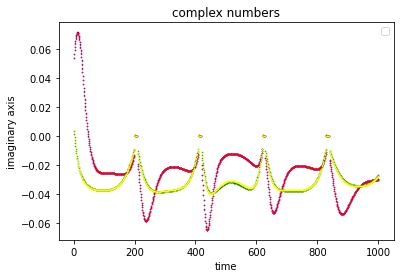

In [ ]:
#plt.scatter(data.real[:,172], data.imag[:,172], label="star", marker=".", color="green")
plt.scatter(x, data.imag[:,172], marker=".", color="blue",s=area)
plt.scatter(x, data.imag[:,171], marker=".", color="red",s=area)
plt.scatter(x, data.imag[:,0], marker=".", color="green",s=area)
plt.scatter(x, data.imag[:,1], marker=".", color="yellow",s=area)
plt.xlabel('time')
plt.ylabel('imaginary axis')
plt.title('complex numbers')
plt.legend()
plt.show()

In [ ]:
data1 = ra.read('params.ra')

In [ ]:
data1.real

array([[ 100.,  110.,  120., ..., 3980., 3990., 4000.],
       [  20.,   20.,   20., ..., 2000., 2000., 2000.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [ ]:
data1[1,:]

array([  20.,   20.,   20., ..., 2000., 2000., 2000.])

In [ ]:
label1=data1[0,:];
label2=data1[1,:];
label3=data1[2,:];

In [ ]:
print(label1)

[ 100.  110.  120. ... 3980. 3990. 4000.]


When developing, it is always a good idea to initialize the random number generator to a constant to ensure that the results of your script are reproducible each time you run it. Once the model is implemented and tested we might remove this to enable variance to be captured over multiple training runs.

In [ ]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

In [ ]:
from complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear

In [ ]:
class BaselineModel1(nn.Module):
    
    def __init__(self):
        super(BaselineModel1,self).__init__()
        self.fc1 = ComplexLinear(1000, 512)
        self.fc1 = ComplexLinear(512, 256)
        self.fc3 = ComplexLinear(256, 1)
        self.bn1 = ComplexBatchNorm2d(128)
        self.bn2 = ComplexBatchNorm2d(128)
             
    def forward(self,x):
        xr = x.real
        xi = x.imag
        xr,xi = self.fc1(xr,xi)
        xr,xi = self.bn1(xr,xi)
        xr,xi = self.fc2(xr,xi)
        xr,xi = self.bn2(xr,xi)
        xr,xi = self.conv2(xr,xi)
        xr,xi = complex_relu(xr,xi)
        xr,xi = self.fc1(xr,xi)
        xr,xi = complex_relu(xr,xi)
        xr,xi = self.fc3(xr,xi)
        # take the absolute value as output
        x = torch.sqrt(torch.pow(xr,2)+torch.pow(xi,2))
        return F.log_softmax(x, dim=1)

In [ ]:
# build the model
model = BaselineModel1()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(100):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.Tensor(labels.float()))
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

RuntimeError: ignored

In [8]:
def _batch_norm(x):
  eps_ = torch.finfo(torch.float32).eps
  y = (x - torch.mean(x)) / (torch.std(x) + eps_)
  return y


# define baseline model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)


    def forward(self, x):
        out = self.fc1(x)
        out = _batch_norm(out)
        out = torch.sigmoid(out)
        out = self.fc2(out)
        out = _batch_norm(out)
        out = torch.sigmoid(out)
        out = self.fc3(out)
        return out

In [ ]:
# build the model 
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(1000, 512, 256).to(device)

# define the loss function and the optimiser
loss_function = nn.MSELoss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(10):
    running_loss = 0.0
    i = 0
    for i in range(data.shape[1]):
        # get the inputs
        
        #inputs = torch.tensor(data.imag[:,i]) #run imag part first since real data is 0
        #result:Expected object of scalar type Double but got scalar type Float for argument #3 'mat2' in call to _th_addmm_out
        inputs = torch.tensor(data[:,i]).to(device)
        labels = torch.tensor(label1[i]).to(device)

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        #print(inputs.float())

        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.tensor(float(labels)))
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss 117511859965.79
Epoch 1, loss 92405531615.07
Epoch 2, loss 93088688022.30
Epoch 3, loss 92897486029.61
Epoch 4, loss 92851061828.14
Epoch 5, loss 92750755929.76
Epoch 6, loss 92692390157.46
Epoch 7, loss 92631273954.34
Epoch 8, loss 92559479402.21
Epoch 9, loss 92494858886.34
**** Finished Training ****


## Saving models

Being able to train a model is fine, but in practice once we've trained the model we probably want to save the result so we can reuse it at a later time. PyTorch makes saving the model easy using the torch.save(state, filepath) function. This will save the weights of the model so they can be loaded into a new instance at a later point.

Run the following code to save the weights for use in the next part of the lab.

In [ ]:
#save the trained model weights
torch.save(model.state_dict(), "./BaselineModel.weights")

If you are running on Colab, run the following to download the weights to the local machine:

In [ ]:
from google.colab import files
files.download('BaselineModel.weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

# download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(1000, 512, 256).to(device)
model.load_state_dict(torch.load('BaselineModel.weights'))

<All keys matched successfully>

In [ ]:
model.eval()
i = 0
test_data = ra.read('atomsroa.ra')
test_label = ra.read('paramsroa.ra')
for i in range(100):
  test_data1 = torch.tensor(test_data[:,i]).to(device)
  predictions = model(test_data1.float())
  test_label1 = torch.tensor(test_label[:,i])
  print("predicted parameter:", predictions)
  print("setting parameter:", test_label1)


predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([100.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([110.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([120.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([130.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([140.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([150.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([160.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting par

In [ ]:
model.eval()

# Compute the model accuracy on the test set
correct = 0
total = 0

# YOUR CODE HERE
raise NotImplementedError()

print('Test Accuracy: %2.2f %%' % ((100.0 * correct) / total))

In [ ]:
class Complexsig(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn = nn.BatchNorm2d
        self.activation = nn.LogSigmoid
    def forward(self, x):
        x = x.view(-1,1,x.shape[0])
        x = (nn.Linear(x.shape[0],512))
        x = self.bn(x)
        x = activation(x)
        x = (nn.Linear(512,256))
        x = self.bn(x)
        x = activation(x)
        x = (nn.Linear(256,1))
        return x